In [1]:
import os
import json
from PIL import Image, ImageDraw, ImageColor, ImageFont
def load_annotation(image_key):
    #  path to the annotations directory
    annotations_dir = r"C:\Users\temp3\Desktop\Mapillary project\mtsd_v2_fully_annotated\annotations"
    # Constructing the full file path
    json_file_path = os.path.join(annotations_dir, '{:s}.json'.format(image_key))
    # Open the JSON file using the full path
    with open(json_file_path, 'r') as fid:
        anno = json.load(fid)
    return anno

In [2]:
def visualize_gt(image_key, anno, color='green', alpha=125, font=None):
    try:
        font = ImageFont.truetype('arial.ttf', 15)
    except IOError:
        print('Falling back to default font...')
        font = ImageFont.load_default()

    images_dir = r"C:\Users\temp3\Desktop\mapillary dataset\images"
    image_file_path = os.path.join(images_dir, '{:s}.jpg'.format(image_key))

    with Image.open(image_file_path) as img:
        img = img.convert('RGBA')
        img_draw = ImageDraw.Draw(img)

        rects = Image.new('RGBA', img.size)
        rects_draw = ImageDraw.Draw(rects)

        for obj in anno['objects']:
            x1 = obj['bbox']['xmin']
            y1 = obj['bbox']['ymin']
            x2 = obj['bbox']['xmax']
            y2 = obj['bbox']['ymax']

            # Ensure the coordinates are within the image dimensions
            x1 = max(0, min(x1, img.width))
            y1 = max(0, min(y1, img.height))
            x2 = max(0, min(x2, img.width))
            y2 = max(0, min(y2, img.height))

            color_tuple = ImageColor.getrgb(color) + (alpha,)
            rects_draw.rectangle([x1, y1, x2, y2], outline='black', fill=color_tuple)

            class_name = obj['label']
            img_draw.text((x1 + 5, y1 + 5), class_name, font=font, fill='white')

        img = Image.alpha_composite(img, rects)

        return img

if __name__ == '__main__':
    image_key = 'Bh36Ed4HBJatMpSNnFTgTw'
    anno = load_annotation(image_key)
    vis_img = visualize_gt(image_key, anno)
    vis_img.show()


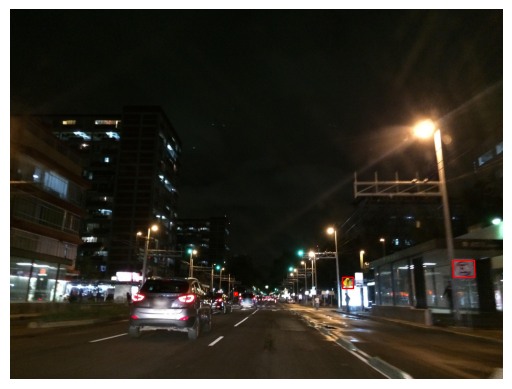

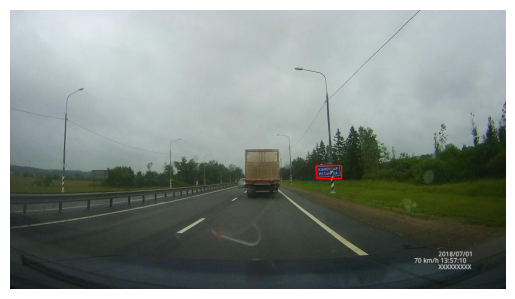

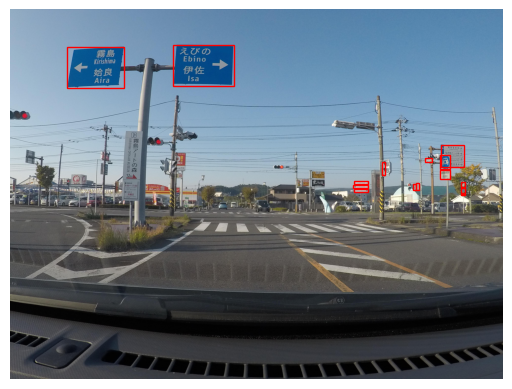

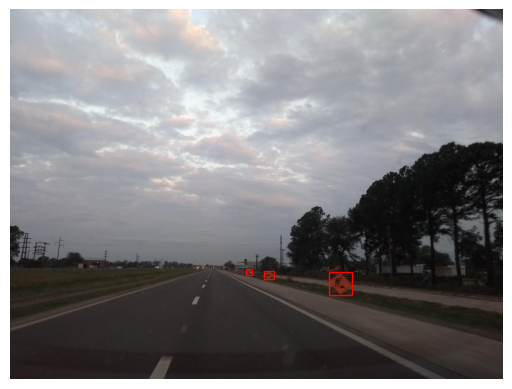

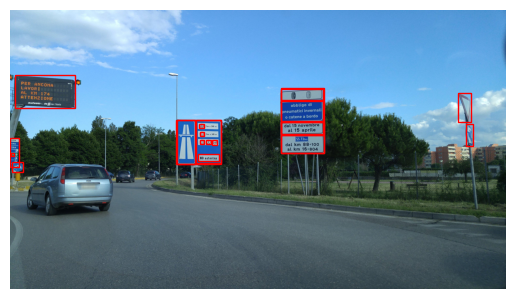

In [29]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random
import os

def visualize_random_samples(image_dir, annotation_dir, num_samples=5):
    # Get a list of annotation files
    annotation_files = [f for f in os.listdir(annotation_dir) if f.endswith('.json')]
    
    # Randomly sample annotation files
    sampled_files = random.sample(annotation_files, num_samples)
    
    for file_name in sampled_files:
        # Load JSON annotations
        with open(os.path.join(annotation_dir, file_name), 'r') as file:
            annotations = json.load(file)
        
        # Extract image key from JSON file name
        image_key = os.path.splitext(file_name)[0]
        # Determine the corresponding image path
        image_path = os.path.join(image_dir, f"{image_key}.jpg")

        # Verify if image exists
        if not os.path.exists(image_path):
            print(f"Image file not found: {image_path}")
            continue  # Skip this iteration and move to the next file

        # Load the corresponding image
        image = Image.open(image_path)
        
        # Create a matplotlib figure
        fig, ax = plt.subplots(1)
        # Display the image
        ax.imshow(image)
        
        # Draw the bounding boxes on the image
        for obj in annotations['objects']:
            bbox = obj['bbox']
            rect = patches.Rectangle((bbox['xmin'], bbox['ymin']), bbox['xmax'] - bbox['xmin'], bbox['ymax'] - bbox['ymin'], linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        
        # Remove axes for better visualization
        plt.axis('off')
        plt.show()

# Usage example:
visualize_random_samples("C:\\Users\\temp3\\Desktop\\Mapillary project\\images", "C:\\Users\\temp3\\Desktop\\Mapillary project\\mtsd_v2_fully_annotated\\annotations", num_samples=5)


In [7]:
import os

def remove_unmatched_annotations(image_dir, annotation_dir):
    # List all annotation files
    annotation_files = [f for f in os.listdir(annotation_dir) if f.endswith('.json')]

    for file_name in annotation_files:
        # Derive the corresponding image file name
        image_key = os.path.splitext(file_name)[0]
        image_path = os.path.join(image_dir, f"{image_key}.jpg")

        # Check if corresponding image file exists
        if not os.path.exists(image_path):
            # If the image file does not exist, delete the annotation file
            os.remove(os.path.join(annotation_dir, file_name))
            print(f"Removed annotation: {file_name} as its corresponding image does not exist.")

# Example usage
image_dir = "C:\\Users\\temp3\\Desktop\\Mapillary project\\images"
annotation_dir = "C:\\Users\\temp3\\Desktop\\Mapillary project\\mtsd_v2_fully_annotated\\annotations"
remove_unmatched_annotations(image_dir, annotation_dir)


Removed annotation: --7fWq6WjZM8L1eUSuvOEA.json as its corresponding image does not exist.
Removed annotation: --A4b2SOWVi4KL_ryAAtTg.json as its corresponding image does not exist.
Removed annotation: --FValmNpFJ8yo8X7uWODA.json as its corresponding image does not exist.
Removed annotation: --L1OMr84-e5nOLbNH5sBA.json as its corresponding image does not exist.
Removed annotation: --taWRWc4f2YUe5w1q9Qew.json as its corresponding image does not exist.
Removed annotation: --tczNya4_w5IhU9DeRMHw.json as its corresponding image does not exist.
Removed annotation: --USokD3k9HzZbwzNZntiQ.json as its corresponding image does not exist.
Removed annotation: --vWKSR3Rh8quTfK4AuKOQ.json as its corresponding image does not exist.
Removed annotation: --yfp7vRX6P9KIETw9QdRQ.json as its corresponding image does not exist.
Removed annotation: --zM9JXM7e2uVsRfC-c_Tg.json as its corresponding image does not exist.
Removed annotation: -045ksJVc_QDsaI8gpCrzg.json as its corresponding image does not exist.

Removed annotation: 0DpwpxVSGWbA96SsT3vfyQ.json as its corresponding image does not exist.
Removed annotation: 0DRULGCEBr7QtSIrRZtRIw.json as its corresponding image does not exist.
Removed annotation: 0dtPs01wgdbc7OZAKt7TtQ.json as its corresponding image does not exist.
Removed annotation: 0DUDcuyfqux4pc0jBcAHqA.json as its corresponding image does not exist.
Removed annotation: 0dWpvXBomGFy1Fqir8GT7A.json as its corresponding image does not exist.
Removed annotation: 0dXNDnDRmoThDomS_vwZEg.json as its corresponding image does not exist.
Removed annotation: 0dzECHEBaMt0HzX9meuDxQ.json as its corresponding image does not exist.
Removed annotation: 0DZEfsJv1JwL_WSr0J2Jlw.json as its corresponding image does not exist.
Removed annotation: 0E2VRRuX7z2-O-a0jIL1bQ.json as its corresponding image does not exist.
Removed annotation: 0e7kk3WleuBcvBaj4G5mQw.json as its corresponding image does not exist.
Removed annotation: 0ee_8tuTc141GMo4iV3W1w.json as its corresponding image does not exist.

Removed annotation: 1HByW7vs6aJTfHDQS74FqQ.json as its corresponding image does not exist.
Removed annotation: 1HBZW-VmUC-PTRVjtBBy3A.json as its corresponding image does not exist.
Removed annotation: 1hDFC9CupXJFsqMBFgEgAw.json as its corresponding image does not exist.
Removed annotation: 1HDJZC5zSwiMdTeYeoJBWw.json as its corresponding image does not exist.
Removed annotation: 1Hdx2ZFz-vjlMvdoubLY1A.json as its corresponding image does not exist.
Removed annotation: 1HGDv2FNKz8hY0M-CiRp5A.json as its corresponding image does not exist.
Removed annotation: 1HIxKNPf6dNKwJjjQVACCA.json as its corresponding image does not exist.
Removed annotation: 1hizcxWwb8E8QEVfa5-L_g.json as its corresponding image does not exist.
Removed annotation: 1HjeCSuknBTfZKB99PBbMA.json as its corresponding image does not exist.
Removed annotation: 1HjPrydG_L3c99u4Wgbpig.json as its corresponding image does not exist.
Removed annotation: 1HkefqjbEmZhCA79qrLlsQ.json as its corresponding image does not exist.

Removed annotation: 2ng4PAJ-zV1Wa6JxTm2ITA.json as its corresponding image does not exist.
Removed annotation: 2NhlTel40GSqmBLt0RHlOA.json as its corresponding image does not exist.
Removed annotation: 2nin-nE-HyFGQ1-YRJEzFA.json as its corresponding image does not exist.
Removed annotation: 2nIu400K-YHbr3oh2ZPtBQ.json as its corresponding image does not exist.
Removed annotation: 2nK_i1wHGjie-ZnI0GrktQ.json as its corresponding image does not exist.
Removed annotation: 2nl_QDx9sl6_Sy_iWll7Aw.json as its corresponding image does not exist.
Removed annotation: 2nmd3tN_gPrRpxUIfDSqAg.json as its corresponding image does not exist.
Removed annotation: 2nnlAxHinZfNYXaBvmbmcw.json as its corresponding image does not exist.
Removed annotation: 2NPdWnlKHub9OfvxTl0J1A.json as its corresponding image does not exist.
Removed annotation: 2nS6W8Zs5YZpTqsP2c73YA.json as its corresponding image does not exist.
Removed annotation: 2NVkqzIUk9OvenTLM4BN4w.json as its corresponding image does not exist.

Removed annotation: 3Mp0LHnRxdYnhtJfd0inYw.json as its corresponding image does not exist.
Removed annotation: 3mrGMK8idIVvwxw-Jl6dxA.json as its corresponding image does not exist.
Removed annotation: 3MuPJyLfRTq-0ghENJM2jQ.json as its corresponding image does not exist.
Removed annotation: 3mWBvPJu7FQgVljc4YIsRQ.json as its corresponding image does not exist.
Removed annotation: 3MyUjpFYNw3rHgtQBsoVrA.json as its corresponding image does not exist.
Removed annotation: 3myVX1BmdG5511xFmg3R3w.json as its corresponding image does not exist.
Removed annotation: 3n5MOlmyIlx4NE05oW8Q8Q.json as its corresponding image does not exist.
Removed annotation: 3NbAh3vfpDdcbB_YyPE9dA.json as its corresponding image does not exist.
Removed annotation: 3NfhwpDnbQiQGxjvVq0A1A.json as its corresponding image does not exist.
Removed annotation: 3NgUmRPI1HEYwyXgDCW6AQ.json as its corresponding image does not exist.
Removed annotation: 3NKBFZ-lTbNqzIrrj4MJGA.json as its corresponding image does not exist.

Removed annotation: 4o-GcIq77WGvfcv9gUVVZg.json as its corresponding image does not exist.
Removed annotation: 4O-Ivjhpx9_6SrHT20wzwQ.json as its corresponding image does not exist.
Removed annotation: 4o-q5HlFxc3uJm4Eo2NRmA.json as its corresponding image does not exist.
Removed annotation: 4o0BtNpkNZbz58ICgxiMvw.json as its corresponding image does not exist.
Removed annotation: 4o7vs9QSDtq7Fy6UmETpug.json as its corresponding image does not exist.
Removed annotation: 4o7wHWWOPAx0Xz5SvqXYiw.json as its corresponding image does not exist.
Removed annotation: 4oAsy_sto62eHY4wU77oWA.json as its corresponding image does not exist.
Removed annotation: 4oBP3zZBOyvWjIAawEtwRA.json as its corresponding image does not exist.
Removed annotation: 4OBQIZ2JL-JiR1IR50wT-A.json as its corresponding image does not exist.
Removed annotation: 4ocQY3Roq1py7bsyz347Bw.json as its corresponding image does not exist.
Removed annotation: 4OCvPUMKI-JxHVC3gsd4LQ.json as its corresponding image does not exist.

Removed annotation: 5nlDo9jz0gwtNL9X1kGSAQ.json as its corresponding image does not exist.
Removed annotation: 5nljOhbUeScPFp9Vb1SgYQ.json as its corresponding image does not exist.
Removed annotation: 5nL_v_lm24ENAnpATdlCTA.json as its corresponding image does not exist.
Removed annotation: 5nM8ITWJEpjgV5qIWG9lgA.json as its corresponding image does not exist.
Removed annotation: 5No0jIWk3Aq0wy35pvwF9g.json as its corresponding image does not exist.
Removed annotation: 5Nolmr3H2s0DcZbZuZy83g.json as its corresponding image does not exist.
Removed annotation: 5nPbxamjsUVSnEI4D5JwlQ.json as its corresponding image does not exist.
Removed annotation: 5nQcTz7hq29Jw-yaB0lfAQ.json as its corresponding image does not exist.
Removed annotation: 5nRA91_p7gGx9CFSWw6NBQ.json as its corresponding image does not exist.
Removed annotation: 5NSHvXNrjaUO7BfZfwyAFg.json as its corresponding image does not exist.
Removed annotation: 5nwgVmK466I0KkQ8cBDXVA.json as its corresponding image does not exist.

Removed annotation: 6IvKQGlTZ_-8Lv_bhSumjQ.json as its corresponding image does not exist.
Removed annotation: 6iwfDd7B8FdxtSQnW0t7zQ.json as its corresponding image does not exist.
Removed annotation: 6IZnCVRGyKrgXBfKfpht7A.json as its corresponding image does not exist.
Removed annotation: 6IzU7KNdu20tvgY5-7NhZQ.json as its corresponding image does not exist.
Removed annotation: 6j5kDA9tMTaDdRXuZjsrDw.json as its corresponding image does not exist.
Removed annotation: 6j83I6444YHWK2iumvtpyQ.json as its corresponding image does not exist.
Removed annotation: 6j9XAGmgmvTu-nf_Qqw6ag.json as its corresponding image does not exist.
Removed annotation: 6jB_-JVyxMdchFQj-lPQlg.json as its corresponding image does not exist.
Removed annotation: 6jC3hXTArglSbfSi7HRweA.json as its corresponding image does not exist.
Removed annotation: 6jdgGZDiYJwxiHQLMr9oYg.json as its corresponding image does not exist.
Removed annotation: 6JfGsENHbScQkhzL7bbDYw.json as its corresponding image does not exist.

Removed annotation: 7mpiZxHN6yDvjmKR-7ZDWg.json as its corresponding image does not exist.
Removed annotation: 7mrkF7rI17j6wbAT4o9Qyg.json as its corresponding image does not exist.
Removed annotation: 7MXqanPMJEMd4NKzfBPqrw.json as its corresponding image does not exist.
Removed annotation: 7N0PjB72C35e-CtVHcMzLg.json as its corresponding image does not exist.
Removed annotation: 7n5nr5jrPHfIpDyKMSHm3Q.json as its corresponding image does not exist.
Removed annotation: 7NbQQEg294ronPmamlelDQ.json as its corresponding image does not exist.
Removed annotation: 7nbwRCi4GrDA9pX_L_Ggtw.json as its corresponding image does not exist.
Removed annotation: 7NGMaqkm2KpxCnvLeDdkgw.json as its corresponding image does not exist.
Removed annotation: 7nh7TFaWNuowKIWiPGXTMA.json as its corresponding image does not exist.
Removed annotation: 7nH8AoiXxaBVfabi2CBQhg.json as its corresponding image does not exist.
Removed annotation: 7NKMkSST79s8WTwevkzCCA.json as its corresponding image does not exist.

Removed annotation: 8IjnXx8QqAInJSMkeldB5g.json as its corresponding image does not exist.
Removed annotation: 8IJtq-sQCGhDIbb6cqKCng.json as its corresponding image does not exist.
Removed annotation: 8iLaxYZxdGRTxeYYQwxcPw.json as its corresponding image does not exist.
Removed annotation: 8IO98w2G44lkibyqMJgZaw.json as its corresponding image does not exist.
Removed annotation: 8IpoPhgxLMIpQRHEE5OmOA.json as its corresponding image does not exist.
Removed annotation: 8Irl-WJ40-nWo5kcmnvdWw.json as its corresponding image does not exist.
Removed annotation: 8isuGROdlhv8ntxlgaZnqw.json as its corresponding image does not exist.
Removed annotation: 8IUGbqttYpJAAXdSNedE_Q.json as its corresponding image does not exist.
Removed annotation: 8IW5EIfrPfHF8m5a7METhA.json as its corresponding image does not exist.
Removed annotation: 8IZ-Se1L9NKl9neo1eSIhQ.json as its corresponding image does not exist.
Removed annotation: 8J2O2lw40M5CwNXxhIhjsA.json as its corresponding image does not exist.

Removed annotation: 9kgJ16u3Y78VV4iblyjVZA.json as its corresponding image does not exist.
Removed annotation: 9kgnNM9zd70Ee2Ewfy3ieg.json as its corresponding image does not exist.
Removed annotation: 9kKMLG8aijrUscfT4DuOSw.json as its corresponding image does not exist.
Removed annotation: 9KLzzLqjR1UTMqkPW2xfxQ.json as its corresponding image does not exist.
Removed annotation: 9kP6Ezk9vFsrxoa8CXlQWg.json as its corresponding image does not exist.
Removed annotation: 9kQbmnRVTBlVu3wpaBU3Mw.json as its corresponding image does not exist.
Removed annotation: 9KUQ8437QuLbjGiOPOgCpQ.json as its corresponding image does not exist.
Removed annotation: 9kVzZwvicRjDUpEhHLl62w.json as its corresponding image does not exist.
Removed annotation: 9k_RXU49yGcRaIokZNDB5A.json as its corresponding image does not exist.
Removed annotation: 9l-tKXlUPxH-eGaVW08mww.json as its corresponding image does not exist.
Removed annotation: 9l1XraF3PUC535hk1Vip7g.json as its corresponding image does not exist.

Removed annotation: aE35jawiLYcgotHpaHo05g.json as its corresponding image does not exist.
Removed annotation: aE4BBljhaPnpl_G36MtQQw.json as its corresponding image does not exist.
Removed annotation: Ae4HZ65rrhJQRWb69OoUVA.json as its corresponding image does not exist.
Removed annotation: ae4OjU9MZt-C7uGuDltMwg.json as its corresponding image does not exist.
Removed annotation: AE4REXEIoCeHFVGvcw1BEA.json as its corresponding image does not exist.
Removed annotation: ae67rTCGbwqG2PqcILdWZA.json as its corresponding image does not exist.
Removed annotation: AE6M8wtATVyN_WGmeoQkSw.json as its corresponding image does not exist.
Removed annotation: aE9Flz5e5VVXnzur3lMG8A.json as its corresponding image does not exist.
Removed annotation: aEaKlcb-FPCgVOIpQJUmqQ.json as its corresponding image does not exist.
Removed annotation: aEaZz7g_e9zULgFqNN4Vhg.json as its corresponding image does not exist.
Removed annotation: aeD4RzdUOjdGDDqGquut-A.json as its corresponding image does not exist.

Removed annotation: AVZjuukVKv95D29vS18xRQ.json as its corresponding image does not exist.
Removed annotation: av_fNquBBSzYkp26AFdE-w.json as its corresponding image does not exist.
Removed annotation: Aw0ggqFXr7GPe-C0DiTSiw.json as its corresponding image does not exist.
Removed annotation: Aw0PKrzsFZxU3HSjZYSKIg.json as its corresponding image does not exist.
Removed annotation: aw0TT-JSOAz8Pw9zkhRT_Q.json as its corresponding image does not exist.
Removed annotation: Aw1m_Q2N32DatFfVQGnTtQ.json as its corresponding image does not exist.
Removed annotation: Aw5IwsDowb0nXkXeVm8TGw.json as its corresponding image does not exist.
Removed annotation: aW6t72Ze0N87pl7rkGx5Yw.json as its corresponding image does not exist.
Removed annotation: Aw6VlqW1vy4k42lJiEeZ1A.json as its corresponding image does not exist.
Removed annotation: aw7U8KHzfZqFI0qCkrAn7g.json as its corresponding image does not exist.
Removed annotation: AW86EU79_uFUG3x8cgGCjQ.json as its corresponding image does not exist.

Removed annotation: bJTzwv8TWw6ab23txjFJ4w.json as its corresponding image does not exist.
Removed annotation: bJu0753XkIQr-tbROLb-YQ.json as its corresponding image does not exist.
Removed annotation: BjuzM_yrFwlz4YHUl0WFLw.json as its corresponding image does not exist.
Removed annotation: BJwQRXOO1q1EK4u6pXhJrw.json as its corresponding image does not exist.
Removed annotation: bjxD0dndg6_IUtEEvma0Qg.json as its corresponding image does not exist.
Removed annotation: BJXzH0PAX8DZGLEmbW-G1w.json as its corresponding image does not exist.
Removed annotation: bjyzWqz9uFcvfYEppv731A.json as its corresponding image does not exist.
Removed annotation: Bk02U7eojkL2MspPu3u1FA.json as its corresponding image does not exist.
Removed annotation: bk11qsPzgfijNMW06JkRUA.json as its corresponding image does not exist.
Removed annotation: BK69w6KFqLUs-KyVb_xVWg.json as its corresponding image does not exist.
Removed annotation: bkbKDO00bNVG-rVvWEzn3w.json as its corresponding image does not exist.

Removed annotation: C4CC2Am98L_HwZylKPee-g.json as its corresponding image does not exist.
Removed annotation: C4G7LNrBkzgzLiM0HbCWSQ.json as its corresponding image does not exist.
Removed annotation: c4GkxXHFYDU4PsheoBljBw.json as its corresponding image does not exist.
Removed annotation: C4I5koNk8vPHJJUwg_L_wA.json as its corresponding image does not exist.
Removed annotation: C4iN0jDSBNHAKiryXMrmkw.json as its corresponding image does not exist.
Removed annotation: C4JjvoDEZEMcAn1-uvOHIQ.json as its corresponding image does not exist.
Removed annotation: C4l35naZTz3tULNNT-kstw.json as its corresponding image does not exist.
Removed annotation: C4MYIwHvHbnqyID07A_uRw.json as its corresponding image does not exist.
Removed annotation: C4NPn-LH_Jg7z-6lsvLZlw.json as its corresponding image does not exist.
Removed annotation: C4NR7yXpjbU4V5LqXauyYg.json as its corresponding image does not exist.
Removed annotation: c4o7e0k-rXs084TMnsMJgQ.json as its corresponding image does not exist.

Removed annotation: cQPmxsooUVcafvOdFBKYmw.json as its corresponding image does not exist.
Removed annotation: CQs1fOadDGx7wnTOAEyncg.json as its corresponding image does not exist.
Removed annotation: CqT0hmQQv4HwvBbiW8niHQ.json as its corresponding image does not exist.
Removed annotation: cQU7x-7Kwk4BGoZmA6V6YQ.json as its corresponding image does not exist.
Removed annotation: CQUVb7mjQyW3kqY6FHCWzA.json as its corresponding image does not exist.
Removed annotation: cQVFHkVLg33q7aKlS-ud3w.json as its corresponding image does not exist.
Removed annotation: CQvnlq1Wsd1DMbdqLlQZJg.json as its corresponding image does not exist.
Removed annotation: cqwfBlJRyPyMakVcz0Es1A.json as its corresponding image does not exist.
Removed annotation: cqwsOtQfuCzEYyjASt5Xdw.json as its corresponding image does not exist.
Removed annotation: cQwWC3pdlaS6JoqeIdDadA.json as its corresponding image does not exist.
Removed annotation: CqXhzSXnB7OeAzbs4haWjQ.json as its corresponding image does not exist.

Removed annotation: DAi07iyhk001YfaHzE5Sdw.json as its corresponding image does not exist.
Removed annotation: DaiR1GqUv0zinut3G0-szA.json as its corresponding image does not exist.
Removed annotation: DairoJPdWR3F2Nv5wHzV6w.json as its corresponding image does not exist.
Removed annotation: DAJ3o4LEAIeKzwi1UJvpuQ.json as its corresponding image does not exist.
Removed annotation: DAjQz2dK-uUawHpqahkc3A.json as its corresponding image does not exist.
Removed annotation: DAL0PtZJbUEKriDWi-N2YQ.json as its corresponding image does not exist.
Removed annotation: DAmDXx4v6pc-RCY-r_q_WA.json as its corresponding image does not exist.
Removed annotation: dANlZO_c9uI3-K4nzs_a7w.json as its corresponding image does not exist.
Removed annotation: Dao-KuWf-QzaXCHe4UmphQ.json as its corresponding image does not exist.
Removed annotation: dAoBrerJfnFNU5cosLRbPw.json as its corresponding image does not exist.
Removed annotation: dAooS4EzYBMffu5R3qgwNA.json as its corresponding image does not exist.

Removed annotation: dqmbwuWhbHbJgteLpyAUow.json as its corresponding image does not exist.
Removed annotation: dQmW0aQoRTQfLhjy-CuktQ.json as its corresponding image does not exist.
Removed annotation: dQOCtyGofC1z7ibknM-GqQ.json as its corresponding image does not exist.
Removed annotation: DQodSJWOftGGxVqI0TBQVw.json as its corresponding image does not exist.
Removed annotation: DQoihTYgXLYPaC47DeKksg.json as its corresponding image does not exist.
Removed annotation: Dqou4gM3E60iYpdq_HJaag.json as its corresponding image does not exist.
Removed annotation: DqOVQ35lw2F0n_Ne3n7N3w.json as its corresponding image does not exist.
Removed annotation: dqoVxKeQ48r2RwB-II_Q4g.json as its corresponding image does not exist.
Removed annotation: DqPUoTFLnV2eIIRfnPLGQg.json as its corresponding image does not exist.
Removed annotation: dqRispfC3bbQvavxz8EHJQ.json as its corresponding image does not exist.
Removed annotation: dqRYgq7MpdPSm5e3cLDy0Q.json as its corresponding image does not exist.

Removed annotation: E7qS8jaUR2Fllj9NPRepFQ.json as its corresponding image does not exist.
Removed annotation: E7TlbyZdc_cxRZNPkMDOfw.json as its corresponding image does not exist.
Removed annotation: e7uq4CJ9UFCcf7VS_zvDpQ.json as its corresponding image does not exist.
Removed annotation: E7VfeLtzEVrFhhpVd33dLg.json as its corresponding image does not exist.
Removed annotation: e7_T-r2AyAadnW1JuGqGHQ.json as its corresponding image does not exist.
Removed annotation: E84dSUqZjo_nLmcFt8xYPQ.json as its corresponding image does not exist.
Removed annotation: E8edDdvhahx1GP-baRuJ6g.json as its corresponding image does not exist.
Removed annotation: E8fG51ffRlkbmmv3zDmX0g.json as its corresponding image does not exist.
Removed annotation: E8lhZGmJzRPaj5ml5m7q0Q.json as its corresponding image does not exist.
Removed annotation: E8Ms1miPiwcAWnNoir7AsA.json as its corresponding image does not exist.
Removed annotation: E8NeL0bPtlsBicW0L1UAHQ.json as its corresponding image does not exist.

Removed annotation: eSaX91nCjyH-M86sK51HvQ.json as its corresponding image does not exist.
Removed annotation: EScQ5KJVvGNbU9JuLqaizQ.json as its corresponding image does not exist.
Removed annotation: EScRpKyKTtqZoKWFUR17sA.json as its corresponding image does not exist.
Removed annotation: eSDLM-RXj7rex_UMkTvoYQ.json as its corresponding image does not exist.
Removed annotation: eSDm6cI1oV-jYAABh-ZwOQ.json as its corresponding image does not exist.
Removed annotation: eSEIQ15QRBkNGtuSFeL4Mg.json as its corresponding image does not exist.
Removed annotation: EsFAm3Fau3wK8lj_oVP4ig.json as its corresponding image does not exist.
Removed annotation: eSgq4b5Vj65T4ooSGdRasg.json as its corresponding image does not exist.
Removed annotation: ESGtSs_3AcmqTaJGrhKCNw.json as its corresponding image does not exist.
Removed annotation: EsHd9Mg-QASftfS5PyHDWQ.json as its corresponding image does not exist.
Removed annotation: eSHgiqNRpyXH9WrpPg66ew.json as its corresponding image does not exist.

Removed annotation: EXsjNbt542RWrdc8fz4sWg.json as its corresponding image does not exist.
Removed annotation: EXSuLGT8qs5GD_96XbWUTA.json as its corresponding image does not exist.
Removed annotation: EXT9IDLITH_kDBzHiOuriQ.json as its corresponding image does not exist.
Removed annotation: EXTUftAnIcCJCnBiw0CITQ.json as its corresponding image does not exist.
Removed annotation: ExUC3OULuWLi25mgg9sLAw.json as its corresponding image does not exist.
Removed annotation: EXuLPt9PnthSPC4rO7_EUQ.json as its corresponding image does not exist.
Removed annotation: EXWPxcEIEZ69QW0jcfrPzg.json as its corresponding image does not exist.
Removed annotation: Exx0EgaolY88YBGeoxN90g.json as its corresponding image does not exist.
Removed annotation: EXxxf_YJfzKqhU1ZMJmHzA.json as its corresponding image does not exist.
Removed annotation: Exy-KlPVTtFaxbpbrCiJug.json as its corresponding image does not exist.
Removed annotation: EXzkYLHmgut2iZi_YT-hIg.json as its corresponding image does not exist.

Removed annotation: F6D-fb9XH1hYKExoNFdVfA.json as its corresponding image does not exist.
Removed annotation: F6f0mikY9I8msm3q9coZaA.json as its corresponding image does not exist.
Removed annotation: F6Galu7cWrBGUS_O7gJFmA.json as its corresponding image does not exist.
Removed annotation: F6Rcyus-0FFuG2AFJLAOYA.json as its corresponding image does not exist.
Removed annotation: F6xcsTZL8aV__qZ0ofIKhw.json as its corresponding image does not exist.
Removed annotation: F7-ep7s5UCKwYVPmJWP-rg.json as its corresponding image does not exist.
Removed annotation: F70ALTjtx46jOWohZkIecQ.json as its corresponding image does not exist.
Removed annotation: F7f-iQaffgOjtAtr3i_nRA.json as its corresponding image does not exist.
Removed annotation: F7i5_Uazphj-8pTHwyNvNw.json as its corresponding image does not exist.
Removed annotation: F7JULjFkG-TG8tuy3oNuyw.json as its corresponding image does not exist.
Removed annotation: F7lFXA6BxguSzVKeWI6hDQ.json as its corresponding image does not exist.

Removed annotation: FhRH52IEfnKXvfJ_KK0-6Q.json as its corresponding image does not exist.
Removed annotation: FHtheEYVPs-FRjzK57Nxqg.json as its corresponding image does not exist.
Removed annotation: Fhu-qWvfgSCYKkqGkJ7scQ.json as its corresponding image does not exist.
Removed annotation: FhySsG8oGh16nzyO0Ab8zg.json as its corresponding image does not exist.
Removed annotation: Fi17jeuiCCbZBxB6_ekG1Q.json as its corresponding image does not exist.
Removed annotation: FI5pihUz-_P7o8rb4_rOqg.json as its corresponding image does not exist.
Removed annotation: FI5r-AaT99iCh039cVtiLQ.json as its corresponding image does not exist.
Removed annotation: FIb8R0-5jMSsQQhd6U1agw.json as its corresponding image does not exist.
Removed annotation: FIDiBX6TdCUurBytoCuQkw.json as its corresponding image does not exist.
Removed annotation: FIGt-WcySxxev140lDKb0w.json as its corresponding image does not exist.
Removed annotation: FitQQf2tdKmjSTYgJJmBRQ.json as its corresponding image does not exist.

Removed annotation: GDd8t-vYxK0alDR2NbvNZA.json as its corresponding image does not exist.
Removed annotation: GdDARyn8oMwPfu139JvAAA.json as its corresponding image does not exist.
Removed annotation: GDdY3ewL7iBUwD_AidyleA.json as its corresponding image does not exist.
Removed annotation: GdFM8je_bRISYWXG9IEPYw.json as its corresponding image does not exist.
Removed annotation: GdlM4sSiWlVDjq0WwiJq9A.json as its corresponding image does not exist.
Removed annotation: GDLyHC9YWbRyr3nwXcsUkA.json as its corresponding image does not exist.
Removed annotation: GDmtlUX113CyMrGOQ-hbJg.json as its corresponding image does not exist.
Removed annotation: GDN71goFxb1_KM3eY19e7w.json as its corresponding image does not exist.
Removed annotation: GdoX-CGJnOdFvyZcb7_dUA.json as its corresponding image does not exist.
Removed annotation: GDsVQ44-dIADcdy5yDEm8Q.json as its corresponding image does not exist.
Removed annotation: GdUTqJ7v4bfUbySBSp4-3w.json as its corresponding image does not exist.

Removed annotation: H96-yFe4KZHcfG37vD27pA.json as its corresponding image does not exist.
Removed annotation: H97M1XLK4opjxTp8xmFBLA.json as its corresponding image does not exist.
Removed annotation: H9b89ZfOxwXX1cb_mGsHPQ.json as its corresponding image does not exist.
Removed annotation: H9bNcQz7QoR1nTJ-tEgWbQ.json as its corresponding image does not exist.
Removed annotation: H9ciSg6PpRUYHoU5XR2E8Q.json as its corresponding image does not exist.
Removed annotation: H9CnGGfeuzg0KJOPd9gqsg.json as its corresponding image does not exist.
Removed annotation: H9gHHMPvdtPmwQVTckwV0w.json as its corresponding image does not exist.
Removed annotation: H9kkmHzhrRQsO3cQv2ExCQ.json as its corresponding image does not exist.
Removed annotation: H9kswb74CxZ5RK3uUe1Fcg.json as its corresponding image does not exist.
Removed annotation: H9LeqYASNf3RvVPC-3usFw.json as its corresponding image does not exist.
Removed annotation: H9t1Ep-tYtKSAzT9S053VQ.json as its corresponding image does not exist.

Removed annotation: HWbw-MJXUFqudfpwUQGdjg.json as its corresponding image does not exist.
Removed annotation: HWEvzVbHtDje9bkK3m1-Xw.json as its corresponding image does not exist.
Removed annotation: HWh3uxp8rQBvzTtwcH6r7w.json as its corresponding image does not exist.
Removed annotation: HWhE7v3mm7N9ujKwn7RbPg.json as its corresponding image does not exist.
Removed annotation: HWj54w2nYYQgCHfWDU-DVA.json as its corresponding image does not exist.
Removed annotation: HWk1mFM-WjHoP0t1tSfH2g.json as its corresponding image does not exist.
Removed annotation: HWmDfQK6t3_4HGeMuGf0aA.json as its corresponding image does not exist.
Removed annotation: HwPRwtHtbpXZ1RQ5Vb_R6Q.json as its corresponding image does not exist.
Removed annotation: HwsY4eEgrcQOo8XhptZGfA.json as its corresponding image does not exist.
Removed annotation: HWtpXe5cUk9eqyHIvD_Tsg.json as its corresponding image does not exist.
Removed annotation: HwUzrW4hJ7NArJvPpuejSA.json as its corresponding image does not exist.

Removed annotation: ImALGI7Zd7izIU6rIVlGsg.json as its corresponding image does not exist.
Removed annotation: ImCitwGB8cXQkw8nXppV-w.json as its corresponding image does not exist.
Removed annotation: IMGLYol31i9-1wuhqS_wNA.json as its corresponding image does not exist.
Removed annotation: IMgV5oVvYEGeJspd9FkhTg.json as its corresponding image does not exist.
Removed annotation: IMJl9_jGC8wJKL48iKOZZw.json as its corresponding image does not exist.
Removed annotation: IMm1DkCPCWHl0iuBU-6WIA.json as its corresponding image does not exist.
Removed annotation: ImnUy-O07eEXLxou5rU2mg.json as its corresponding image does not exist.
Removed annotation: Imofkg5hBWwliIITuvSsbA.json as its corresponding image does not exist.
Removed annotation: Imoo31k5uF0jUCAjl_8fzg.json as its corresponding image does not exist.
Removed annotation: ImpUuwpdN4quAZEEbgSDYQ.json as its corresponding image does not exist.
Removed annotation: IMRjS8zcV3pJ6UqGxOhTPg.json as its corresponding image does not exist.

Removed annotation: J9Hu7W0HWJ0b5AkUBobW7g.json as its corresponding image does not exist.
Removed annotation: J9KVv-igh7cgwylkOCACZQ.json as its corresponding image does not exist.
Removed annotation: J9U58uz-W7loC9Ay30wrEA.json as its corresponding image does not exist.
Removed annotation: J9X57yNhbMnXw1WgPnivOQ.json as its corresponding image does not exist.
Removed annotation: J9Zy6BhSpSKsfvmLAj-qSA.json as its corresponding image does not exist.
Removed annotation: JA0Jf4g8joW2XbY_Sd7Rog.json as its corresponding image does not exist.
Removed annotation: JA2SBgPtd2dr0y9z2uPndA.json as its corresponding image does not exist.
Removed annotation: JA7mvVzrE9I8Ja_6NvGGbg.json as its corresponding image does not exist.
Removed annotation: JAAEtxjkS2rzZqlYTPEepQ.json as its corresponding image does not exist.
Removed annotation: JAapXoQKArZAyWMCFQw7nA.json as its corresponding image does not exist.
Removed annotation: JaasrSgsjhtMlfXtz1Y_3w.json as its corresponding image does not exist.

Removed annotation: JSoNosS9I5Og2jFFhWr5AA.json as its corresponding image does not exist.
Removed annotation: JsqiZ1YxgyJ-QqXZn7Y-LA.json as its corresponding image does not exist.
Removed annotation: JsRfzW2iOsMe90p0HXwZ5Q.json as its corresponding image does not exist.
Removed annotation: JSudmHoJSsb3vIQJRF0XqQ.json as its corresponding image does not exist.
Removed annotation: JsV5ZH6pbiwpCf6_6NnUFA.json as its corresponding image does not exist.
Removed annotation: JSwk6DuhiRJtvxxF5txdxw.json as its corresponding image does not exist.
Removed annotation: Js_-BQG75KNc8dbVw_aQiQ.json as its corresponding image does not exist.
Removed annotation: JT-igmbt9u7jNMbKQYqHMA.json as its corresponding image does not exist.
Removed annotation: Jt3iPWg6NIM5vtBfRKecKg.json as its corresponding image does not exist.
Removed annotation: Jt5GOJcrW8wAGfHn4dgQGg.json as its corresponding image does not exist.
Removed annotation: Jt7H_OeCz4JiuSkIGC5nRQ.json as its corresponding image does not exist.

Removed annotation: K5CVDj_g2uJprv7FC_ixLQ.json as its corresponding image does not exist.
Removed annotation: K5LLc6myooLApZEFaeKQ0w.json as its corresponding image does not exist.
Removed annotation: K5nhg1N4FdcD0cSOeIl5sQ.json as its corresponding image does not exist.
Removed annotation: K5NPLklWlJoFdO3vY9ON5A.json as its corresponding image does not exist.
Removed annotation: K5rlEmgwjiiHG-H8F5ESwQ.json as its corresponding image does not exist.
Removed annotation: K5TYb59IeHqIp9bwtUICTw.json as its corresponding image does not exist.
Removed annotation: K5V9ifUoSMe4BSq4Ngho2A.json as its corresponding image does not exist.
Removed annotation: K663Pf21UA2M-SoBP4Mu8A.json as its corresponding image does not exist.
Removed annotation: K6Jgf01G1Tk9hULexw4iWw.json as its corresponding image does not exist.
Removed annotation: K6tUmSBzbiM6xGHzfS3Cdg.json as its corresponding image does not exist.
Removed annotation: K71GsMisQHmSjsItQQPPoA.json as its corresponding image does not exist.

Removed annotation: KVu_DRMTIPGMpxF1_TFVYQ.json as its corresponding image does not exist.
Removed annotation: KVW4otPLfkhRPPZg20-qMw.json as its corresponding image does not exist.
Removed annotation: KvwYIaDqH1t4Jv7XT0LxJg.json as its corresponding image does not exist.
Removed annotation: KvYEm6nw6z98QzWqyk-Mzg.json as its corresponding image does not exist.
Removed annotation: Kw5zeRBwRwf1Ghj0g5KMmw.json as its corresponding image does not exist.
Removed annotation: Kw6SvRX30nkLzMHAMTk06Q.json as its corresponding image does not exist.
Removed annotation: Kw7lqiEuaeUUl0PE69oiGg.json as its corresponding image does not exist.
Removed annotation: KwCeeZc6sMTvIeWg35lndw.json as its corresponding image does not exist.
Removed annotation: Kwdq2KYYkpTGxJk4YFcM4w.json as its corresponding image does not exist.
Removed annotation: KwElVG7s4aO6ufeYLjTFxA.json as its corresponding image does not exist.
Removed annotation: KwGONw-HdjN1RGSd8dkt1Q.json as its corresponding image does not exist.

Removed annotation: LoT4sxqn1Z08xkoZ5BcJrg.json as its corresponding image does not exist.
Removed annotation: LOw42a1uBb2ArhxZh1UTzQ.json as its corresponding image does not exist.
Removed annotation: LoxudAlTuoRTtbCOp4y8eg.json as its corresponding image does not exist.
Removed annotation: LozTYYzxGNPY8Nc_ulAKoA.json as its corresponding image does not exist.
Removed annotation: LP1lQ9nexxjCLqqmVeY3og.json as its corresponding image does not exist.
Removed annotation: LP1nGoQot_7jimQipT800A.json as its corresponding image does not exist.
Removed annotation: LP2brl0KvHtnvagIp4jQyg.json as its corresponding image does not exist.
Removed annotation: Lp2x5aNdOeH4auFPLUYeMQ.json as its corresponding image does not exist.
Removed annotation: LPdhoz7OXwpDotUw_kVRQw.json as its corresponding image does not exist.
Removed annotation: LpfGf5S_lrM76_4_YFuLoA.json as its corresponding image does not exist.
Removed annotation: LPfxFXzbRXc0qIzUW08Dbg.json as its corresponding image does not exist.

Removed annotation: MejkkRSq7WzIyGS93BQyig.json as its corresponding image does not exist.
Removed annotation: MEk7MUWSNx5FQpu4HUyNmg.json as its corresponding image does not exist.
Removed annotation: MEkVV6Cxn1LFY_c21dhA0A.json as its corresponding image does not exist.
Removed annotation: MeKzPpyGl1mdyNAeHw1WwQ.json as its corresponding image does not exist.
Removed annotation: MeLao-hVSOVcIOMcnStrIw.json as its corresponding image does not exist.
Removed annotation: MElJO6kM2bigtPWto16g0g.json as its corresponding image does not exist.
Removed annotation: MENgyOJPBTjn4dxH4_7pmw.json as its corresponding image does not exist.
Removed annotation: MeROTOEG-eHxzSySuiCVMA.json as its corresponding image does not exist.
Removed annotation: Merpbx8fwD_Ldfv1C9GYrA.json as its corresponding image does not exist.
Removed annotation: Met7EOlFjw4hxqOIqRxDRg.json as its corresponding image does not exist.
Removed annotation: MEvnhXJgmuLcJxh-oqjyPQ.json as its corresponding image does not exist.

Removed annotation: N7njEy56kbElxCP1jx47Tw.json as its corresponding image does not exist.
Removed annotation: N7pd_muZiuM5WkJ39FhRJw.json as its corresponding image does not exist.
Removed annotation: N7rbfCik7JNqgfxrS47XEQ.json as its corresponding image does not exist.
Removed annotation: N7RBkbo_9ubMQ7SRvJ3vgw.json as its corresponding image does not exist.
Removed annotation: N81w-6N8lRJo6Cebgyejdg.json as its corresponding image does not exist.
Removed annotation: N82-8Rhi5u50kkiy3vwKmQ.json as its corresponding image does not exist.
Removed annotation: N8gghUS08G5AFK9brXdbkQ.json as its corresponding image does not exist.
Removed annotation: N8ItXZvAYDypS7Qx89KkzQ.json as its corresponding image does not exist.
Removed annotation: N8LGitH3wJmfBXa6k4R3Ew.json as its corresponding image does not exist.
Removed annotation: N8MnfjvcZOeYpf6Q5flXeQ.json as its corresponding image does not exist.
Removed annotation: N8T4RJt_dSjiOeiFRxGPxg.json as its corresponding image does not exist.

Removed annotation: NuNhUf50kc32RiiEHwEx6A.json as its corresponding image does not exist.
Removed annotation: NUNt6rHnrHRJSWAQ-6mo0g.json as its corresponding image does not exist.
Removed annotation: NUnuTKCBAEfah7rZYg76RA.json as its corresponding image does not exist.
Removed annotation: NuP08YhkDiDlySFiR6qNsQ.json as its corresponding image does not exist.
Removed annotation: Nupj3a-NWn9oRQ_-WLDYYw.json as its corresponding image does not exist.
Removed annotation: NuppRBYxFtIbPbnIBWxf4A.json as its corresponding image does not exist.
Removed annotation: NurJpXHY5-h0SU6ETjvk8A.json as its corresponding image does not exist.
Removed annotation: NuTVfxu7IyPGz5awhtDb3g.json as its corresponding image does not exist.
Removed annotation: NuUz2-An1JBCO-fo-_yKUg.json as its corresponding image does not exist.
Removed annotation: Nuw2XkLKGTb-VsOmhrPcuQ.json as its corresponding image does not exist.
Removed annotation: NUXnSRYdrnxOvFyc1_nbeA.json as its corresponding image does not exist.

Removed annotation: OOVD_HhawKOAmauiLXPWdA.json as its corresponding image does not exist.
Removed annotation: OowYsNGzlMm7yPsDeLM0bg.json as its corresponding image does not exist.
Removed annotation: OOX8un9h3QY-Y9c6yJl3UA.json as its corresponding image does not exist.
Removed annotation: OozlJYbG-4wxjj0b46ZFVw.json as its corresponding image does not exist.
Removed annotation: Op2jF9-Az2BI_wrbQiPYqw.json as its corresponding image does not exist.
Removed annotation: OP6C7BeujL44z5kUXAkWDA.json as its corresponding image does not exist.
Removed annotation: OpBKxDT7eI4Ejua4iAy5Mw.json as its corresponding image does not exist.
Removed annotation: OPBQAhbz-MGznkK0RC3o6w.json as its corresponding image does not exist.
Removed annotation: OpBrw7pDxJVdDqbkQwwWSg.json as its corresponding image does not exist.
Removed annotation: OPE9PtLYIJhEPf_ZOSiMZQ.json as its corresponding image does not exist.
Removed annotation: OPF0f1bOsVNrvHRFDrqBmQ.json as its corresponding image does not exist.

Removed annotation: PnQ3xUxtxKhpAHizCUt13w.json as its corresponding image does not exist.
Removed annotation: PNrx4rtNsI8ZttVA3Llmwg.json as its corresponding image does not exist.
Removed annotation: PNshuNSVR2qwQ4TOvwA5YQ.json as its corresponding image does not exist.
Removed annotation: PnuE--cqL7wdEajeSVtUSg.json as its corresponding image does not exist.
Removed annotation: Pnv7UV1DdQUpotWEobJcCw.json as its corresponding image does not exist.
Removed annotation: PnYC1aAf8fusjbEHu20WQA.json as its corresponding image does not exist.
Removed annotation: PnzYs3zeH2Z7O3waRACrxw.json as its corresponding image does not exist.
Removed annotation: Po0oRpDhF4HLuoheDtNo0w.json as its corresponding image does not exist.
Removed annotation: Po2NAWWKSJXlQdTI6zShqw.json as its corresponding image does not exist.
Removed annotation: Po5xC5-tWn0nu5XjdoaQBg.json as its corresponding image does not exist.
Removed annotation: Po8ge1XjCN9ObZ54yBRdJg.json as its corresponding image does not exist.

Removed annotation: Qnd7bih9_rUu7OVYF4L2UQ.json as its corresponding image does not exist.
Removed annotation: QnEX2zjHzSK4ihBJrtVSZQ.json as its corresponding image does not exist.
Removed annotation: QnEZtgd0ubN6TH_nmyoa3w.json as its corresponding image does not exist.
Removed annotation: QnfI-3QbTTviuf1i9hePVg.json as its corresponding image does not exist.
Removed annotation: QNfKtLstB84sl_2P5q9QHw.json as its corresponding image does not exist.
Removed annotation: QngrhZQxTtm4A5bQpVXpVQ.json as its corresponding image does not exist.
Removed annotation: QNmk6WL99QWEybPY6ZR_ag.json as its corresponding image does not exist.
Removed annotation: QnoGhYCWw6VwxpIi2QiGAw.json as its corresponding image does not exist.
Removed annotation: Qns7rgWaKFU0agIXv-UDZg.json as its corresponding image does not exist.
Removed annotation: QNSaWARTj98ykuL5PZAY6w.json as its corresponding image does not exist.
Removed annotation: QnVTnrITFs793w_dTQylIg.json as its corresponding image does not exist.

Removed annotation: RMPLAt1mG98qMcPQtyWLlg.json as its corresponding image does not exist.
Removed annotation: Rmpsdhzyn6KyoBPZUkkBYg.json as its corresponding image does not exist.
Removed annotation: RMPYMbdDTiHYN5Hvno9tXA.json as its corresponding image does not exist.
Removed annotation: RmSOuXOnmjUZcjnOG9Yplw.json as its corresponding image does not exist.
Removed annotation: RmTkrCqipmSGgnam_GnDnA.json as its corresponding image does not exist.
Removed annotation: RmtOBCK0YazoZeCAir1ylQ.json as its corresponding image does not exist.
Removed annotation: RmtyJnPNSqubPCHv5bpSsg.json as its corresponding image does not exist.
Removed annotation: RmuSc7kNBME3xngbmwgVPQ.json as its corresponding image does not exist.
Removed annotation: RMUTML30oa9pkEXMTnI1ow.json as its corresponding image does not exist.
Removed annotation: RMvtEhn7prbv9gCoZZ8vJg.json as its corresponding image does not exist.
Removed annotation: RMyBZHrlVVsPge13SKqF-g.json as its corresponding image does not exist.

Removed annotation: SRCoyzazfAMiDCEVdS_lBg.json as its corresponding image does not exist.
Removed annotation: Sre1MzLfKlhDouX3QS9ijQ.json as its corresponding image does not exist.
Removed annotation: SRewEjAW7KzY0t-hgGD26g.json as its corresponding image does not exist.
Removed annotation: SRGHmy5hdxYksmtIJGK4fQ.json as its corresponding image does not exist.
Removed annotation: SRgn4cvC2uA3qEy2V4Squg.json as its corresponding image does not exist.
Removed annotation: SRgZrN8vu-xNQbVhR9mmIg.json as its corresponding image does not exist.
Removed annotation: Srh6aJOnXIDzsMzEe1QlQg.json as its corresponding image does not exist.
Removed annotation: SrhzEFpHi_-35dHeOtQPpA.json as its corresponding image does not exist.
Removed annotation: SRk-L067aJHIkhny6DVxAQ.json as its corresponding image does not exist.
Removed annotation: SRlsxcbDXXQAIcmrfF4uGA.json as its corresponding image does not exist.
Removed annotation: Srme_--34CrJMibpcIEzAA.json as its corresponding image does not exist.

Removed annotation: TtH4hYk8DSfmgb0omrdUWA.json as its corresponding image does not exist.
Removed annotation: TTiy4B6ydroZdDEkxHYpig.json as its corresponding image does not exist.
Removed annotation: TTLXcpocY6jPSOQcf2QHoQ.json as its corresponding image does not exist.
Removed annotation: TTobKfGrWfEsB4e6AJIGzA.json as its corresponding image does not exist.
Removed annotation: TTt8C__Fo0_i16fFcvEXjA.json as its corresponding image does not exist.
Removed annotation: TtUHiJ1-qhHrFLvesDQI8w.json as its corresponding image does not exist.
Removed annotation: TtvkiedsWlvs38PpJ8_GKA.json as its corresponding image does not exist.
Removed annotation: TT_pX2A7facWG_LJLkd9SA.json as its corresponding image does not exist.
Removed annotation: Tu0WQ4dcAocOCVQFQ0PFoQ.json as its corresponding image does not exist.
Removed annotation: Tu1AZP6fG-Eyptmq0R15vA.json as its corresponding image does not exist.
Removed annotation: TU96J_UJGvefQfMtjnPnMQ.json as its corresponding image does not exist.

Removed annotation: UW8rkn1s2FucbMsIhKqFIw.json as its corresponding image does not exist.
Removed annotation: UWBxI8oS4T_-lWCi5mra2A.json as its corresponding image does not exist.
Removed annotation: UweG1WgFqz7XxxRer_L2LA.json as its corresponding image does not exist.
Removed annotation: UWGp4o5b7AGTiGhJ3vZYeA.json as its corresponding image does not exist.
Removed annotation: UWGp_BsIOEttu5XyQfltyA.json as its corresponding image does not exist.
Removed annotation: UwJHZz09FBBEPJzzFjyGAw.json as its corresponding image does not exist.
Removed annotation: UwkFD05Zl1SNg-VjYFCxYA.json as its corresponding image does not exist.
Removed annotation: UWKsDSTmQ0qavaQLeouRzg.json as its corresponding image does not exist.
Removed annotation: UwLErTf8Rmx4SacK2L0EHA.json as its corresponding image does not exist.
Removed annotation: UWnThAsVi7uMzu3HezYGUw.json as its corresponding image does not exist.
Removed annotation: UWoPV0hG8eRfu0ORu3YT9A.json as its corresponding image does not exist.

Removed annotation: VUZKFlLiMa9vVZNfc60OAA.json as its corresponding image does not exist.
Removed annotation: VUZwsn7ZBPPuJn3Qvf5QTQ.json as its corresponding image does not exist.
Removed annotation: Vv-dR7Npx35R5FqZURA9ww.json as its corresponding image does not exist.
Removed annotation: Vv1jB3OLmANFQx6vLA8upw.json as its corresponding image does not exist.
Removed annotation: Vv4mCx4wLVF2W2C6WcJmVg.json as its corresponding image does not exist.
Removed annotation: VV685vZBboKvAzIXpHfIew.json as its corresponding image does not exist.
Removed annotation: VVBC2GHAXuTqmBwPLBKn1w.json as its corresponding image does not exist.
Removed annotation: VvC5gNxjreXI7t1Jm5_-nA.json as its corresponding image does not exist.
Removed annotation: VvCJKO91SYJ37vz2mPp2Cw.json as its corresponding image does not exist.
Removed annotation: VveJlmbri3QE14dQhPGvKQ.json as its corresponding image does not exist.
Removed annotation: VVgkRVdfBoF39EuHv0GX6Q.json as its corresponding image does not exist.

Removed annotation: WuHhsc-cespzDp-RPnz2bw.json as its corresponding image does not exist.
Removed annotation: WUkdV6UShW2ds3VJ_JMZ5g.json as its corresponding image does not exist.
Removed annotation: WUMtz8_qgAQxWthsQ5fQLw.json as its corresponding image does not exist.
Removed annotation: WUNKMHmlbOpquxNeKeIv8A.json as its corresponding image does not exist.
Removed annotation: WuOyvK-wMBTkbyqf09vfTg.json as its corresponding image does not exist.
Removed annotation: WUpYjKWBBp_7eDRIfJafpw.json as its corresponding image does not exist.
Removed annotation: WuqR2XrVo9vYaz-wD27AAw.json as its corresponding image does not exist.
Removed annotation: WuruoS6Ueipez7DBu4G1lw.json as its corresponding image does not exist.
Removed annotation: Wutcqa3UpusD0WwkkYf6Zw.json as its corresponding image does not exist.
Removed annotation: WUVDsB_Py24k2-D9K17GMA.json as its corresponding image does not exist.
Removed annotation: Wv-iJ08aKmYbAJOvKenWqQ.json as its corresponding image does not exist.

Removed annotation: X2xcfTbPMPwH-sPks46ROg.json as its corresponding image does not exist.
Removed annotation: X2XnU0Rt80SoRqCDJnPBNA.json as its corresponding image does not exist.
Removed annotation: X34bEu2cCUqrJ9NdGLFsgA.json as its corresponding image does not exist.
Removed annotation: X3aRS76eYWasesaDTxRx7Q.json as its corresponding image does not exist.
Removed annotation: X3EPh_Bate4EPYqVkXnp3w.json as its corresponding image does not exist.
Removed annotation: X3hWH3byrPPUZodrhBGl7Q.json as its corresponding image does not exist.
Removed annotation: X3lylLI2T-GqskcfxJAOVw.json as its corresponding image does not exist.
Removed annotation: X3RRqYazE0vjWfA0gpA-nw.json as its corresponding image does not exist.
Removed annotation: X3s-rHKgvWS4vrZLs4l6BA.json as its corresponding image does not exist.
Removed annotation: X3uYjRnGA-bVEigVeGGe4A.json as its corresponding image does not exist.
Removed annotation: X4B8Nw4f0dYdsgSQgCd4pA.json as its corresponding image does not exist.

Removed annotation: XXVZPBvQRVsPlzu2DYZ7SA.json as its corresponding image does not exist.
Removed annotation: XxWvERQIB-bH5caQqRcvnA.json as its corresponding image does not exist.
Removed annotation: XY2fLABvHwDQrQRI6yIV8g.json as its corresponding image does not exist.
Removed annotation: Xy4_eBNtvkhitB_CAHsRRg.json as its corresponding image does not exist.
Removed annotation: Xyb0kuKhRhoIP7Z44MiDrg.json as its corresponding image does not exist.
Removed annotation: XyBBig3Zk4diLPggD037tA.json as its corresponding image does not exist.
Removed annotation: XYDyZOMqVFO_2aq-nTjM3w.json as its corresponding image does not exist.
Removed annotation: XYf4e3-b3cOfk_Ic8-fiKw.json as its corresponding image does not exist.
Removed annotation: XYGil8kZ2R6Z2OHYyJfdGw.json as its corresponding image does not exist.
Removed annotation: Xyhj_XfBMIvVeygwlT3NYA.json as its corresponding image does not exist.
Removed annotation: XyjCssVcwTG5OoiVyUBmhQ.json as its corresponding image does not exist.

Removed annotation: Yq3mxmiRFvlyo9EuvbQS8w.json as its corresponding image does not exist.
Removed annotation: YQ3siAJ10mwhxRtHULhvBw.json as its corresponding image does not exist.
Removed annotation: YQAtajRsegccmJatMJafzg.json as its corresponding image does not exist.
Removed annotation: YQatULglO2SPP2PBU3gEbQ.json as its corresponding image does not exist.
Removed annotation: YQEaUDsNUjFU26cQZmeVLw.json as its corresponding image does not exist.
Removed annotation: YQlZxWGC4UvKLWZSECbbKA.json as its corresponding image does not exist.
Removed annotation: YqMFrRar9OMsae25NIjnGg.json as its corresponding image does not exist.
Removed annotation: YqNvDg7Zqtq_2bEeHVtF7g.json as its corresponding image does not exist.
Removed annotation: YqnyIBFPg0n947_E5aAYig.json as its corresponding image does not exist.
Removed annotation: Yqpc23kl4ogCSgQH89XOUA.json as its corresponding image does not exist.
Removed annotation: YqQoJ7CE_2LroVLHHxXE8A.json as its corresponding image does not exist.

Removed annotation: ZPo8ZWQT_Jsc3WupTEoPeg.json as its corresponding image does not exist.
Removed annotation: ZpqAd2tBojs3GjJwCNa_mA.json as its corresponding image does not exist.
Removed annotation: ZPQUhwIHiMzP-elyvozlaA.json as its corresponding image does not exist.
Removed annotation: Zq-YW2F8VzTCVo3bW8JEgw.json as its corresponding image does not exist.
Removed annotation: Zq68VMQoRhQV8ScU5EVNFQ.json as its corresponding image does not exist.
Removed annotation: Zq6KKgZP45ay4VmNbr7R4g.json as its corresponding image does not exist.
Removed annotation: ZqbZZiMr3SfFbIglKtjJUw.json as its corresponding image does not exist.
Removed annotation: ZQccKdAOZSAcc9bK1IDpzw.json as its corresponding image does not exist.
Removed annotation: ZQD1yPut5dJsD_0zEOECZA.json as its corresponding image does not exist.
Removed annotation: ZQdyzIyIVyzy35nJ62qFbg.json as its corresponding image does not exist.
Removed annotation: ZQeJ_dQ9GPqWiGQ9z98qnQ.json as its corresponding image does not exist.

Removed annotation: _kg8A2TqX3NoPxaaGhDtWA.json as its corresponding image does not exist.
Removed annotation: _KhAEw0vo8hohpcyudYIvA.json as its corresponding image does not exist.
Removed annotation: _KLNIoKtw4no_KPTbLySJQ.json as its corresponding image does not exist.
Removed annotation: _kn_5iiq9SbM_kKvqy0HYQ.json as its corresponding image does not exist.
Removed annotation: _kPeIdcLu1Dhvi6lcL-lXw.json as its corresponding image does not exist.
Removed annotation: _KT-j_gSE7gJqay_4qTuvA.json as its corresponding image does not exist.
Removed annotation: _KTaMrX7nVmWxPrxPvnsNQ.json as its corresponding image does not exist.
Removed annotation: _kvyeCkcLK8G7CAR7DJQ9w.json as its corresponding image does not exist.
Removed annotation: _kvZyv1eH-nFzAWwcCekyg.json as its corresponding image does not exist.
Removed annotation: _kW3AQOEKlcWgUOlv9KIIA.json as its corresponding image does not exist.
Removed annotation: _KWGXHTqPT-2Tw1OY_L_Gg.json as its corresponding image does not exist.

In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random
import os

def visualize_random_samples(image_dir, annotation_dir, num_samples=5):
    # Get a list of annotation files
    annotation_files = [f for f in os.listdir(annotation_dir) if f.endswith('.json')]
    
    # Randomly sample annotation files
    sampled_files = random.sample(annotation_files, num_samples)
    
    for file_name in sampled_files:
        # Load JSON annotations
        with open(os.path.join(annotation_dir, file_name), 'r') as file:
            annotations = json.load(file)
        
        # Extract image key from JSON file name
        image_key = os.path.splitext(file_name)[0]
        # Determine the corresponding image path
        image_path = os.path.join(image_dir, f"{image_key}.jpg")

        # Verify if image exists
        if not os.path.exists(image_path):
            print(f"Image file not found: {image_path}")
            continue  # Skip this iteration and move to the next file

        # Load the corresponding image
        image = Image.open(image_path)
        
        # Create a matplotlib figure
        fig, ax = plt.subplots(1)
        # Display the image
        ax.imshow(image)
        
        # Draw the bounding boxes on the image
        for obj in annotations['objects']:
            bbox = obj['bbox']
            rect = patches.Rectangle((bbox['xmin'], bbox['ymin']), bbox['xmax'] - bbox['xmin'], bbox['ymax'] - bbox['ymin'], linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        
        # Remove axes for better visualization
        plt.axis('off')
        plt.show()

# Usage example:
visualize_random_samples("C:\\Users\\temp3\\Desktop\\Mapillary project\\images", "C:\\Users\\temp3\\Desktop\\Mapillary project\\mtsd_v2_fully_annotated\\annotations", num_samples=5)


In [10]:
import os

def remove_unmatched_annotations(image_dir, annotation_dir):
    # List all annotation files
    annotation_files = [f for f in os.listdir(annotation_dir) if f.endswith('.json')]

    for file_name in annotation_files:
        # Derive the corresponding image file name
        image_key = os.path.splitext(file_name)[0]
        image_path = os.path.join(image_dir, f"{image_key}.jpg")

        # Check if corresponding image file exists
        if not os.path.exists(image_path):
            # If the image file does not exist, delete the annotation file
            os.remove(os.path.join(annotation_dir, file_name))
            print(f"Removed annotation: {file_name} as its corresponding image does not exist.")

# Example usage
image_dir = "C:\\Users\\temp3\\Desktop\\Mapillary project\\images"
annotation_dir = "C:\\Users\\temp3\\Desktop\\Mapillary project\\mtsd_v2_fully_annotated\\annotations"
remove_unmatched_annotations(image_dir, annotation_dir)


In [13]:
import json
import os

def load_and_inspect_annotations(annotation_dir, num_files=5):
    annotation_files = [f for f in os.listdir(annotation_dir) if f.endswith('.json')]
    for i, file_name in enumerate(annotation_files[:num_files]):
        with open(os.path.join(annotation_dir, file_name), 'r') as file:
            annotation = json.load(file)
        print(f"Annotation {i+1} ({file_name}):")
        print(json.dumps(annotation, indent=2))  # Pretty print the JSON

# Usage example:
annotation_dir = r"C:\Users\temp3\Desktop\mapillary dataset\mtsd_v2_fully_annotated\annotations"
load_and_inspect_annotations(annotation_dir)


Annotation 1 (--48MAqc82-bZdgGpaiexA.json):
{
  "width": 4160,
  "height": 3120,
  "ispano": false,
  "objects": [
    {
      "key": "489lm30wc63tjtupe1e2q1",
      "label": "other-sign",
      "bbox": {
        "xmin": 2657.890625,
        "ymin": 1013.0859375,
        "xmax": 2695.46875,
        "ymax": 1051.171875
      },
      "properties": {
        "barrier": false,
        "occluded": true,
        "out-of-frame": false,
        "exterior": false,
        "ambiguous": true,
        "included": false,
        "direction-or-information": false,
        "highway": false,
        "dummy": false
      }
    },
    {
      "key": "jwoggy96u43g4ad6o09ee2",
      "label": "other-sign",
      "bbox": {
        "xmin": 2641.640625,
        "ymin": 1028.3203125,
        "xmax": 2683.28125,
        "ymax": 1064.12109375
      },
      "properties": {
        "barrier": false,
        "occluded": false,
        "out-of-frame": false,
        "exterior": false,
        "ambiguous": true,
  

In [16]:
import os
import json

def check_missing_values(annotation_dir):
    # List all annotation files
    annotation_files = [f for f in os.listdir(annotation_dir) if f.endswith('.json')]

    for file_name in annotation_files:
        with open(os.path.join(annotation_dir, file_name), 'r') as file:
            annotation = json.load(file)

        missing_values = False
        for obj in annotation.get('objects', []):
            if 'bbox' not in obj or 'label' not in obj:
                missing_values = True
                print(f"Missing values in {file_name}, object {obj.get('key')}")

        if not missing_values:
            print(f"No missing values in {file_name}")

# Usage example
annotation_dir = r"C:\Users\temp3\Desktop\mapillary dataset\mtsd_v2_fully_annotated\annotations"
check_missing_values(annotation_dir)


No missing values in --48MAqc82-bZdgGpaiexA.json
No missing values in --7fWq6WjZM8L1eUSuvOEA.json
No missing values in --A4b2SOWVi4KL_ryAAtTg.json
No missing values in --FValmNpFJ8yo8X7uWODA.json
No missing values in --L1OMr84-e5nOLbNH5sBA.json
No missing values in --taWRWc4f2YUe5w1q9Qew.json
No missing values in --tczNya4_w5IhU9DeRMHw.json
No missing values in --USokD3k9HzZbwzNZntiQ.json
No missing values in --vWKSR3Rh8quTfK4AuKOQ.json
No missing values in --yfp7vRX6P9KIETw9QdRQ.json
No missing values in --zM9JXM7e2uVsRfC-c_Tg.json
No missing values in -045ksJVc_QDsaI8gpCrzg.json
No missing values in -0BXQnPOeVpklWx23Caxaw.json
No missing values in -0C1J9CvgFP4BTVLXNeNZA.json
No missing values in -0c_X2o4E_Q38fWHFWAvqg.json
No missing values in -0DCdoveCiKUkxBe-xZDmg.json
No missing values in -0G6gt8ksR0hO5jMKrTDMw.json
No missing values in -0GQmYRienNVqEKiQ0Mkyw.json
No missing values in -0hwJDQZgLXvIw_VwI1VDQ.json
No missing values in -0iIhj9Oc7tOo-ydUgveRA.json
No missing values in

No missing values in -D7PwwMuQ0K0dH01QKD__g.json
No missing values in -d8-b7dDHKul_Z2X9fla7Q.json
No missing values in -d96ZbYd7_KVjb22_nHpkQ.json
No missing values in -d9yyVJS1LeMPZs0giY2rg.json
No missing values in -dBtqhsBO346niG5o1CXBQ.json
No missing values in -dbyNa028cINUYOe38L9tw.json
No missing values in -DeKckw21jiQYydlp_1FhQ.json
No missing values in -dEnca_R0jBIVxuwwKXWHA.json
No missing values in -dHC2MM-tUWgqDx_7i5Reg.json
No missing values in -DKcxCLAzqQ5yCdj-HkkPw.json
No missing values in -DkDObKcNzsTVJxqfFH-3w.json
No missing values in -dNcWJxAJNh1XpKoAaKopw.json
No missing values in -dNqLLA8kJ-uOIevAxD1tA.json
No missing values in -DwASFX0geY4YtJaMlK1nw.json
No missing values in -dxXjzBb0p9C8cVtP0o7qQ.json
No missing values in -dzzf720lNVa_aU5MZnqaQ.json
No missing values in -d_1nm_Kq-VtagqMBniAEg.json
No missing values in -E0pRusIqLhaIkjlZQGXNg.json
No missing values in -e37GNHnSI_MPacS5Tz5UQ.json
No missing values in -e6jzPl3AE0Yk-Ra1iXg7A.json
No missing values in

No missing values in -LQAjPpM4ZlWbR_GiEo-5Q.json
No missing values in -LqxrUMrnqvpRpiyYFMT6g.json
No missing values in -LQXWLyVw_nMfog6Sya92w.json
No missing values in -lsv9582Wjc5TfvD1HO0PQ.json
No missing values in -LTe_F4UXqhzk5yJ4okT6g.json
No missing values in -LtOhSguWQXyerbzUN6HpA.json
No missing values in -LtQo5edm0gYE_NGNMPdPw.json
No missing values in -lUgoo0Qqzg7hr1qDM2lwA.json
No missing values in -lVsuYE2oiBdrmiiNEcX4A.json
No missing values in -lw3mUDZ56348AA7xtiZ6Q.json
No missing values in -ly7qhzXVhRPRhBpEN_q4A.json
No missing values in -L_MxrOq7gnQl3v6WjDdwg.json
No missing values in -m1Lbzj88VSOlc1r9lKL6w.json
No missing values in -M4PLgorfyo9MlhgRC-MaA.json
No missing values in -m6xPufevyfYt5C_rE9Ksw.json
No missing values in -m7utN2JF_X7By1OFCDnyg.json
No missing values in -M8xsQw2o3hRE_LMu_O0rA.json
No missing values in -MBhan9aOnvBYV6DJvU6Dg.json
No missing values in -MDovh87v6WPQs_350FD3g.json
No missing values in -mDtL9PqWQ3-4-h4lBnHsA.json
No missing values in

No missing values in -UpC0UCSsrawKLPXan32yw.json
No missing values in -UPOiSbZxKsOFuBkGrjxtA.json
No missing values in -uQw7-vXJivlSZjFQAF2_w.json
No missing values in -UREQne4pnoJHZlTuW7Brw.json
No missing values in -UrryarQA1DQNbe6seQXfA.json
No missing values in -urzxeTmVrMPhO8qZjmZ7Q.json
No missing values in -USJxUPQMMgHpITpzK0Ptg.json
No missing values in -Uu9SyEFABUp3SjRoUAVrQ.json
No missing values in -UvwIycEctkww1bGC80ezA.json
No missing values in -UWs6gMDdr11IYS4h4pikQ.json
No missing values in -uy7fxqZa_l1SIaMr-TJCA.json
No missing values in -v0JB7xtQIEKkgICNMZXyg.json
No missing values in -v1ewFyhIlVvV1OZlmtCbA.json
No missing values in -v3WD-KMPPltbz1W4GeddA.json
No missing values in -v7b_dUz4S1Kjo85hUAdUw.json
No missing values in -VCeONiRF2tN_A36MQETXQ.json
No missing values in -VhEfEcfULGANbna04M3BA.json
No missing values in -vI1n_jYsCKX_lC9YQ4oyg.json
No missing values in -VK7KFiPhWtLyh6rrIRJrQ.json
No missing values in -VmfwD5K3SnrnAwUtgqpqg.json
No missing values in

No missing values in 03mKqdJT02HQU1LVQiAbLQ.json
No missing values in 03mZDbnZ05B3ihS13stnJQ.json
No missing values in 03PYx6SDV4KgoQHMN8rX0A.json
No missing values in 03t4t-qavUxmwjWieV5E0w.json
No missing values in 03tQKoVX65M5CjzFX-9wDQ.json
No missing values in 03UNAWKy3_9stC992aT-zg.json
No missing values in 03xO9SftTM9TrAi28Hqfvw.json
No missing values in 03yzErX7ZjjVkxTC0EgezQ.json
No missing values in 040UVxS1elSVKdAXYAgDaQ.json
No missing values in 045p6zvYQZE78lWY0ciaWg.json
No missing values in 047KbUAJgVg0VwSO3G-Dqg.json
No missing values in 04GNmQEvdrSqvMi7OSwzrQ.json
No missing values in 04QwehzaLPW4Nn0Kco-4rA.json
No missing values in 04rMGIXW5G4Js-cfMwOzRA.json
No missing values in 04VRWPc5Wxm-DeMuF78JkA.json
No missing values in 051FjMb9qqDSg-fXJqKg_Q.json
No missing values in 053zJJvBH_qBDJQ1hvIKzw.json
No missing values in 059jUoL06WjGlo4TSkF3TA.json
No missing values in 05bV-y1qKJVHUiHUbNYqng.json
No missing values in 05f-wUcsambdZEBXZEWH6Q.json
No missing values in

No missing values in 0gulr2lTt7K0s__cFBWtZQ.json
No missing values in 0GwqI2ZMhGchQO3iS8d7Lw.json
No missing values in 0Gxn074Ahnt5NWYxwtP3tQ.json
No missing values in 0gYAPTPgXjWnXac4d6hTXA.json
No missing values in 0g_UEWapyhjPLn6vr1tcHA.json
No missing values in 0H0WS3zptoqTukK6GxAdhg.json
No missing values in 0H1SCKpYzNZFlHRNNqSL9Q.json
No missing values in 0H2goMLxGtDDfCDb1TF0aw.json
No missing values in 0H3AeIq28VJbc4hrcp6u5g.json
No missing values in 0h4xymedlyjkvJFJFeJJQA.json
No missing values in 0H5cZS-CmZexBkmHgRyc0w.json
No missing values in 0hbGVY5_5674fDF4UReeVQ.json
No missing values in 0HdC9ffsB2ji_qEUEmY2cA.json
No missing values in 0Hdxcclb07xpUIdoszvWTA.json
No missing values in 0hE5XJ0bGYhS_LfHnaokYA.json
No missing values in 0HIgzXYCVZbSpHCBQ-fCXQ.json
No missing values in 0HkmkxZOzmQ4IM1KPDT2Mw.json
No missing values in 0Hmwpj7wNdFHlaAs97CZ3w.json
No missing values in 0HpGBxPaHHV9uaFBID5rgg.json
No missing values in 0hR6iznFg-NpJaW33TJthg.json
No missing values in

No missing values in 0pM6Q4PJGq7BQSTyFeI8gw.json
No missing values in 0pmSw3W7bqJbR01NgGfZsA.json
No missing values in 0pnLDYL9IGuwZ5aHRrul3Q.json
No missing values in 0PO10zkZWM7areTxaNo5Cw.json
No missing values in 0pPgh-biWoPK2SMapwMybw.json
No missing values in 0PsDdvM0Sv0vkkWCfHsvYg.json
No missing values in 0PsZnA81utwRHFNttaPv9A.json
No missing values in 0PyqVO5nUk0hJ7RpQwhPGQ.json
No missing values in 0p_vNcT_0LvsTKNoNajUSA.json
No missing values in 0Q0QgS3HRoyStZV5cTj-XA.json
No missing values in 0QB69I0VCcNYCY9hPhuimw.json
No missing values in 0qBy7R2vDFLyiqcZCopZNQ.json
No missing values in 0qDXzSeMPnKQDrSlSsRZKA.json
No missing values in 0QIGiGrt_2b6NGpPtGgaUQ.json
No missing values in 0qnCW71WM5Kb2Wbt9SX_Iw.json
No missing values in 0QPkhi7SWVkJh8tuaPmNUg.json
No missing values in 0QR-CWQYfzbJeAdAXigf_w.json
No missing values in 0qRBekaA_IXmWURySCoOzQ.json
No missing values in 0QrG9g-WS2zIVsSH2a4XEg.json
No missing values in 0Qrp3Nggizimtz3PQS1kSg.json
No missing values in

No missing values in 0Yd46d41Hceh2xaEZ4QXLA.json
No missing values in 0yDB6rTAnwpsLKO-Lu4UQg.json
No missing values in 0YDzoQ9nHP-AhcH0QfbCZA.json
No missing values in 0yFDvXGkSdgrouAanKQhkQ.json
No missing values in 0YHbQSvZNEFUZ3lkqKg3Ow.json
No missing values in 0YHwpM2CyoEQv6Qxyj2Nxg.json
No missing values in 0YIG85dl71pDX-kyQPkhAw.json
No missing values in 0yioDGlY6ilyhul-HymEsQ.json
No missing values in 0Yjexery92aWZ0h2exzjRA.json
No missing values in 0YjM3Hb5VAvUaF3s6zqG3w.json
No missing values in 0YKPA2gZPwy-NGieGbo1Ng.json
No missing values in 0Ymj16z0kMUrQsChWpB3yA.json
No missing values in 0YNU9HxEXdaEf5T-TogA2Q.json
No missing values in 0yRPZy1eib90pMZqMcLU8A.json
No missing values in 0YsFdHG3V-QRmAaDz6qjtg.json
No missing values in 0YSjhpjCpz_LT2Wp-K3trQ.json
No missing values in 0YtUWPDlys-Q4K3zgnhJTg.json
No missing values in 0YTxjxjlqJVJapM3IQNQUA.json
No missing values in 0yw44QjgoVIpN1OLJXsfbQ.json
No missing values in 0YwK7HHHs_qy2BSrQEblFA.json
No missing values in

No missing values in 1A7QdPmmlXiILFomp2cIrw.json
No missing values in 1Aa2BZstJDJDaVqpql0zAg.json
No missing values in 1AB3uXLURVo3PrGjJxQ17w.json
No missing values in 1aBBaowOkaVLjmEj44we8w.json
No missing values in 1ACI6lcUp74Myg7TQzrdFQ.json
No missing values in 1ACmQtcaRLbcFa8IQ4Lj_A.json
No missing values in 1AExfkgy6j6hQwjYLHg0zw.json
No missing values in 1aGqlg_bGMEHdb7oTGMPDA.json
No missing values in 1aipSG_VlujT-7j6AX599Q.json
No missing values in 1aJksDTefUsagxXIXu_Tpw.json
No missing values in 1AJxMl2fz3OIzolz3A0nww.json
No missing values in 1Alfy_9grIje69NpJn_FBQ.json
No missing values in 1AlsXgsxaR8DMMQv1KM7uQ.json
No missing values in 1AmdQK8HUOlLKnCRemZYMQ.json
No missing values in 1aMi-XhGr_K99Sx3OfEpqg.json
No missing values in 1aNI1nsPujUzBHSSBuWRzA.json
No missing values in 1apjvqdxsuN7GEPJinVFag.json
No missing values in 1aPu6wh7S5ZcRP371iTXZA.json
No missing values in 1aVRsdungm0UEHfeq9QB9g.json
No missing values in 1B2NHbbDUBX-LXcq1myTeQ.json
No missing values in

No missing values in 1j6SdzCliF_nRftcWEeyXA.json
No missing values in 1J6Wp_4H1DO-VKAFA35ynQ.json
No missing values in 1jAEsRcuv3RC3VSYhwXLSg.json
No missing values in 1JburwA45zeaPB-o-dm4Bg.json
No missing values in 1jCurdcmjyPG1rffWppWAQ.json
No missing values in 1JCwQkz4qvsliGmQj-whgg.json
No missing values in 1JdcokqHEVWTUv300_D1rw.json
No missing values in 1jflDK9EAZazXYCJiRInFA.json
No missing values in 1JgoFqJ4t0xudYRRv7YM-w.json
No missing values in 1JIwHXC0Bgod-dgLMJPVWA.json
No missing values in 1jKghVNNvcWM9Nxz-m1g_w.json
No missing values in 1JmhijORfHDWq4lQ9uM3hg.json
No missing values in 1jmxMDEW8foKl1jthILDIw.json
No missing values in 1jpAduavqkSWQRcnDDmnbg.json
No missing values in 1jq-7lnhwv0pLgSOOQU8qw.json
No missing values in 1jq463a8hnjT2XeZY0DzyA.json
No missing values in 1jVrpDoicAY5FIgsSj7jnw.json
No missing values in 1JwZQWpNlcQBnyolqXh6mg.json
No missing values in 1JyoS1NadsKvRF1taRbeOg.json
No missing values in 1JYydUIXEERHdY7uLGziEw.json
No missing values in

No missing values in 1skwvgCoCsPYI612YdXzHA.json
No missing values in 1SLRE6qkB8uW0UvjPhorKQ.json
No missing values in 1SnP8zHG6p8H_feQMfLN0Q.json
No missing values in 1sowKtYSZ3aHUeeETwL6gQ.json
No missing values in 1SpHl1fzzs7UJ8CH8-U3sA.json
No missing values in 1SQ3Af8vh-nyELH_mLi_vw.json
No missing values in 1SUiXVG4aOHSTqZ6pCjueQ.json
No missing values in 1SwuZyfc3wvlZFoubzUXQw.json
No missing values in 1SYhdhjY4eja4AqhxsXrAw.json
No missing values in 1SzcosFr3-q-YtG66UdmEA.json
No missing values in 1sZoMC2wwF6Zw-pZSuXLww.json
No missing values in 1szp4qrUDVk8XYZZjjseFQ.json
No missing values in 1t3X6qsI1WwLGRmCqIXwBg.json
No missing values in 1t4BrMURI2T8NaFamrJnww.json
No missing values in 1T6rPtWq6XNpVZvT1GUhDQ.json
No missing values in 1T7atfo4GW14NXRIJYpWrQ.json
No missing values in 1tBYiS0hdTQDeP6s-BdPIw.json
No missing values in 1TcRMxDZJV5dNSdkGQY_Nw.json
No missing values in 1tDC1Paw0ve1eK8ae2SKOg.json
No missing values in 1tEVL6ocUoTIB0ezew-lBg.json
No missing values in

No missing values in 221mk7Bq92fkozpY9aKcxg.json
No missing values in 225MsH0xclli4cdftMhDvg.json
No missing values in 228aRNnCNX7G6CzyiBWhbw.json
No missing values in 229nzEFTA1IG85HCRwfpnQ.json
No missing values in 22FBGs-pYZcb72PA9h-8uw.json
No missing values in 22o9IasaiFLbIPhVSBLxEQ.json
No missing values in 22Wk58HYgfJz1X1MioOP9w.json
No missing values in 23ddCkGNsF-a3YgnRI5Exw.json
No missing values in 23l3-gz2ZI2pYwxfdAvP9A.json
No missing values in 23LVvX8G5f9LhDzFdk41fg.json
No missing values in 23oLXhOgtTT5A7DfnsLI7g.json
No missing values in 23v_CWKgbezZu9WxecymKw.json
No missing values in 23WS_RhwZBl6JFUM4wiVow.json
No missing values in 23ZyRFulGOSh7Avr3BCocA.json
No missing values in 2435HcVSqceC2RS3J3uGqw.json
No missing values in 24aM8Pw70D9UfcweTkoKpg.json
No missing values in 24cmAhf_Hb5xITbuQZyq4w.json
No missing values in 24dso8lIzMguCayQuqJGLA.json
No missing values in 24FuuQsw_82YwwCecRqGwQ.json
No missing values in 24HgKd22JfAGDDg-AD19mQ.json
No missing values in

No missing values in 2EfRHI4yKxGzITfoWwgCoQ.json
No missing values in 2EJNrCz5UIw-ZaWE48Xekw.json
No missing values in 2ELdGHsj7plRZEdkTH-dtQ.json
No missing values in 2emJ6GL7IhFhpKay-46MXw.json
No missing values in 2EML5iGfMKfgKtjFNZFx7w.json
No missing values in 2er4cv4AKd_4VJstz4Bt6Q.json
No missing values in 2erlzsSFpUjHwpWJH9_ibQ.json
No missing values in 2EskFQ0q4egOG8q8kyzh7w.json
No missing values in 2eTHtNjtXCHkVr5xncaMSg.json
No missing values in 2eugWzI_E418zjQtktXZZg.json
No missing values in 2euube7pCiG8jFaGsXeEyQ.json
No missing values in 2evE6GPHAcOsTU26wstg8g.json
No missing values in 2EyDq8hITPRg8nhXss1BnQ.json
No missing values in 2EYujzBGFoLV0Ux7QHSC4A.json
No missing values in 2F347mUCp7cpMquLeeszGw.json
No missing values in 2f8rzNOnlfjbrAB0IUu5hQ.json
No missing values in 2fApMUJ12FWx3ZNQyBmpBA.json
No missing values in 2Fc3xUD4Gmw6ymdxOU_E6g.json
No missing values in 2Fcdo9pR7WbzOzCjr2Y5tg.json
No missing values in 2FDMcWvd2aQDCz4kAkTing.json
No missing values in

No missing values in 2NGXBYwMB-LwMQzBw7Qbjw.json
No missing values in 2NhlTel40GSqmBLt0RHlOA.json
No missing values in 2nin-nE-HyFGQ1-YRJEzFA.json
No missing values in 2nIu400K-YHbr3oh2ZPtBQ.json
No missing values in 2nK_i1wHGjie-ZnI0GrktQ.json
No missing values in 2nl_QDx9sl6_Sy_iWll7Aw.json
No missing values in 2nmd3tN_gPrRpxUIfDSqAg.json
No missing values in 2nnlAxHinZfNYXaBvmbmcw.json
No missing values in 2NPdWnlKHub9OfvxTl0J1A.json
No missing values in 2nS6W8Zs5YZpTqsP2c73YA.json
No missing values in 2NVkqzIUk9OvenTLM4BN4w.json
No missing values in 2NwJly11VYAYStins-7wCQ.json
No missing values in 2NXQo6N8_ANvfEt6dRuHEA.json
No missing values in 2NyW-cwoUtM7PsVO1jTa2g.json
No missing values in 2O-UX73vobBD7ORKlTbexw.json
No missing values in 2O6VdCoUedrVNeUkUcaOCw.json
No missing values in 2o6zJBpUQl-p5-rMOEHzDQ.json
No missing values in 2O7luOdNRio8Uyg1eCW2Mw.json
No missing values in 2OBnSGjiOoMBQmbGiVhe-Q.json
No missing values in 2ogDdjwUkS_bSzsTJI9PjA.json
No missing values in

No missing values in 2XBmnhyZfXXSKHUBPU9s_w.json
No missing values in 2XdmqVh0Pc_gCIWMaPLMrQ.json
No missing values in 2XfLa8AHbW8OW6MevrOx_g.json
No missing values in 2XfoxJ4HEyVZrOdMMk1Tng.json
No missing values in 2XFQEujoT65m-0ni7Ks7Kw.json
No missing values in 2xFRcMsx2grj07ATXUqs3Q.json
No missing values in 2xG-nAWDmL6hJjnnBjl3XQ.json
No missing values in 2XH8bYdmijajWA4TeKLkhg.json
No missing values in 2xIhMEC2yboCrTqGlI0rZA.json
No missing values in 2XiTnudcI6UyedUs4dwEDQ.json
No missing values in 2xk_-_NVqp69qpFu6evPUw.json
No missing values in 2xM1XIppErsw5GfJAvsKZw.json
No missing values in 2xmpjzkJuDMg59CVIqRPGg.json
No missing values in 2XMRr-7EoaJNUgRY94iuEg.json
No missing values in 2XouDSLgEnXSvJE7HtJfFw.json
No missing values in 2xp9nkti7emZ6zzwxukBeQ.json
No missing values in 2Xpvcuc58b_zhbnq3lt1iA.json
No missing values in 2xQLeY8d1fPc38gS1AMuSA.json
No missing values in 2XrAh578Ewr9kUZNA2rNQw.json
No missing values in 2XsGtoo9bOdjFtHb1YaTOA.json
No missing values in

No missing values in 3aDbf9I0jBgfzZOVVG_tjg.json
No missing values in 3adfQd73sV9FuSJ7KeDKgA.json
No missing values in 3agipTLldLEBe7JIvhnv9g.json
No missing values in 3AJsaghajMAvKfnVSGGrZw.json
No missing values in 3aL-yjMi49JPabDcXn5HVQ.json
No missing values in 3aoAes209trFFgu-ZCChpA.json
No missing values in 3AOGN5YJJkSToiSvCNrcyw.json
No missing values in 3ATJQlFfCD-2wZOhdFIEIQ.json
No missing values in 3AuIt3aQpwFAI5Iioh9AHA.json
No missing values in 3Av8HvJprhqfpMJNxwNkrw.json
No missing values in 3aXdeL6zkbprvwNy0nv48w.json
No missing values in 3AXqkzAmlzWmyoU4JczZzQ.json
No missing values in 3AyyBJ1FEelt5D8O0gk1mw.json
No missing values in 3AzBNTPQd1NHH3GblH570w.json
No missing values in 3A_pZNO5IQpQfJnAEAAB5w.json
No missing values in 3b-ffjqgejNBtDij-8ocDg.json
No missing values in 3B2awVtUM7TW2IE4na_SNw.json
No missing values in 3B38wX-lygB5ZppHcjbcsA.json
No missing values in 3B7fYN4VL1Wq13OssIBvlw.json
No missing values in 3BaI4DmtoLu0Bm1Ck_kn2Q.json
No missing values in

No missing values in 3IgDxpZltEd-WKPPZgmspA.json
No missing values in 3IH2Cz4QJ6u3pEdjYFandQ.json
No missing values in 3iHihM0d-RlgaJh7Y0E7dA.json
No missing values in 3Ii9Bm5mNtfkBznQfprrKg.json
No missing values in 3iJuXXY5IIv6ReNW-07xCg.json
No missing values in 3iplK4LI6Appsputb5ygWg.json
No missing values in 3iRJAHKxZ4-OyYsO_WEkAA.json
No missing values in 3IU4tu6y64z_EbTwhyQg0Q.json
No missing values in 3IusDP4lCkI6BcaM8WvD7g.json
No missing values in 3IvJaGDGgFlNkxlH27mEzg.json
No missing values in 3Iwlx5iqPOjp9mEEl5FdTw.json
No missing values in 3I_jxYLKl71Z709_XkMMsA.json
No missing values in 3J-kESc7rhnKtorMj_IXxA.json
No missing values in 3J2gcsbhABM7cRvL-FEdwA.json
No missing values in 3J6mmrwgA0PgLGCEESPrtA.json
No missing values in 3J7ymKNfKVveeAJuSzVnyA.json
No missing values in 3jGTwCQ_1dvBqH64klt-BQ.json
No missing values in 3JH9KIqbb79iHKHd8Isqqw.json
No missing values in 3jhxA0nMV_6GzchiVbfvqQ.json
No missing values in 3jIqXbrfawWxXWeiWfR-xg.json
No missing values in

No missing values in 3rObeP9Vq7IGQ0bLlafpng.json
No missing values in 3rQ1m944jV_4RaoFdpK-aw.json
No missing values in 3Rrc_eneyjOEPbuAswTkSA.json
No missing values in 3ru16vN99KC9irg-OwSqvQ.json
No missing values in 3RVbEnTK-dwTICfJwvcxwg.json
No missing values in 3RX_fcBs3QyQS2M7CykHCw.json
No missing values in 3ry_tivm-tdvb_xqceUGFw.json
No missing values in 3rZoK7hmJv3qWo3qjJSXxQ.json
No missing values in 3s0kNqtig8pbJ0G98E2mVw.json
No missing values in 3s7AX-5AWkka0nSzeu2gRQ.json
No missing values in 3s7qaglTn43joKeom72gVA.json
No missing values in 3S8QnM3pK3ssNTKPvR5Wdg.json
No missing values in 3S94_cl_uC6a0lS3aUHTMg.json
No missing values in 3SAEYCKhCWRt9LdHt9NmtA.json
No missing values in 3sckuaRDgZe0mpHWfd-y2w.json
No missing values in 3SeRgQzsefXQMA3BRCOr8Q.json
No missing values in 3sF9DakPVpn3KSb4YOd6lQ.json
No missing values in 3SFHs5dGitAR2_MGPF-p5A.json
No missing values in 3sfw2EtEmsKdcfPeXog6yw.json
No missing values in 3sfwZhc_DPOn3Ms0Lave-w.json
No missing values in

No missing values in 4-tb0Z6mpbH-0ATh5n0URg.json
No missing values in 4-vHaE-RtLPoci7ozT2szg.json
No missing values in 4-yo4K-y8f32xcecPk7bDQ.json
No missing values in 401DpLVxF2c3wf_v4jmuwg.json
No missing values in 402e3jDjpLQb8Vh1MPX93w.json
No missing values in 40EdqdP8fG6YsXTHg0Bt3A.json
No missing values in 40ET42OFiQawg-ebqJo3eA.json
No missing values in 40hLsNEUvd0Tx1n0gMmDxg.json
No missing values in 40lS7Cf7WxlvMhOjFcWegA.json
No missing values in 40t6Um7akgt4ChtMSNBp8g.json
No missing values in 40Vb6Vp9QgLtBHRAE5EyVg.json
No missing values in 41-skho5JIvvLObgqVcOdQ.json
No missing values in 413hvD8xJnSCKNunBP6VMw.json
No missing values in 41mo9CuqhQf8olRCTget4w.json
No missing values in 41oz03GxpDCCxX7JhrcK0A.json
No missing values in 41qHhgxFBktUjhnk8dRgyg.json
No missing values in 41WM51aksQDAAACfhqURbQ.json
No missing values in 4207-tZjx_6XNR3mdDwNZQ.json
No missing values in 421tSCdwT9utwIZkX8vWKg.json
No missing values in 42bwZjC-9IMQZavHSthXSA.json
No missing values in

No missing values in 4DVvhzyLaYTNVE6tiNdH5w.json
No missing values in 4dW1oaw9mqzMDjfxulyaGw.json
No missing values in 4dxDTFputZkri_oIcGnq7g.json
No missing values in 4DxrldmeVANxmN28sQ1VwA.json
No missing values in 4dytKiB02is5P8O-wg1zJw.json
No missing values in 4e2_-0aUCatSVYfeNiOS2w.json
No missing values in 4E5pBwKX7fJw9GigBPkRmg.json
No missing values in 4EANo2oioClWlZqwXm6i3A.json
No missing values in 4ebnMQ1_WtQUmsDLtfXy1w.json
No missing values in 4EbTwakGrOUvBshrRVHx5Q.json
No missing values in 4eBz4z6YAV4rBMr1owju3A.json
No missing values in 4eDTdPzGEVn0gDtyrQaDsA.json
No missing values in 4eebWKqRdvKR2wpqU2L3Ag.json
No missing values in 4EEdbyLqky250RlUBh2X_Q.json
No missing values in 4EEK5k0m1XLxitSO2OoRxw.json
No missing values in 4eiDRTWcoLkShsAbMYf_4g.json
No missing values in 4EIdzNxMFuiTt0BNh4bgPA.json
No missing values in 4Ekp4ih76yn0VvfkglvOUw.json
No missing values in 4EPqebECGdicZSYlSC3PDw.json
No missing values in 4EQQkFcs0vn16rGSYYca9w.json
No missing values in

No missing values in 4MqfMgznX8g44iiaXBFflg.json
No missing values in 4mwC4A6uY-4MG25L4LKhCA.json
No missing values in 4MY1Dw2Xj3u93huYbeHkJA.json
No missing values in 4MYcz8Ki5ObTgwrUIgRMew.json
No missing values in 4MykXeP5phiYMvO_cXEQzg.json
No missing values in 4mZjZYWDQ4qkwvGbgQh5zQ.json
No missing values in 4N1J-xVEtabhY19rgAaxHQ.json
No missing values in 4N3oz58luqeN85SIfR0CdQ.json
No missing values in 4N6dE2N28FAFAx42Ewf75w.json
No missing values in 4N8kZioX1TLNqRMLFlyHBw.json
No missing values in 4NcHFi9qBp6BZIEUFAm-HQ.json
No missing values in 4nCsjGR2ynCXHSIgBX2zUg.json
No missing values in 4NhOwHLuL67y2MWUcUec0g.json
No missing values in 4NQtWCS6rl37i-q5UrCdhQ.json
No missing values in 4nuM1LE_A1Z6BymXEsnZNA.json
No missing values in 4NVvpAcVUkKyj9SSz9C-Tg.json
No missing values in 4nXiyr3c_4zTS-b6dgRGQA.json
No missing values in 4NXMwIZ8ekP4PCT-5cBiiA.json
No missing values in 4N_Inv5JMJ3B4xgF0fSEmA.json
No missing values in 4o-GcIq77WGvfcv9gUVVZg.json
No missing values in

No missing values in 4wLX04FlfUzNsmvlObKUIg.json
No missing values in 4wMVKkgU9TeCv_26qdRwiQ.json
No missing values in 4WoiFQKG_cfFe1cjDcXNHA.json
No missing values in 4wotUccXlYtEQis2QMYheQ.json
No missing values in 4WPDRRqCOniejQPC9MXJyg.json
No missing values in 4wQ-HTvkfSztNi58ubQ7Jg.json
No missing values in 4WrRyTJiESCcXjdrXWmJlg.json
No missing values in 4WSwScHwyqdA2ITsjhbvpg.json
No missing values in 4wUL1sl3zjHLpDPBIdtShw.json
No missing values in 4Wwzo8VQ-_-Lmgkcyx5K7A.json
No missing values in 4wxifOLW2fmaWD81w4iH1Q.json
No missing values in 4wzRVZIO8BqNp9Gt8WTNoA.json
No missing values in 4x-cM4_6y6kMP2_KLCxXGA.json
No missing values in 4x0u-vY-5_A2zlMfR2nD1w.json
No missing values in 4x39Q6cZTpsX9Gr5WtKfLQ.json
No missing values in 4X9BO_1FL2F3ADezxiIxWQ.json
No missing values in 4X9YJ3DN4wXoynoAlWTGNw.json
No missing values in 4xAwCsxuuFeUNnhZwHvxCw.json
No missing values in 4XBvYtD-aLkc2VTgh9ru7Q.json
No missing values in 4XeQ1y9376ioc_H74IZsJw.json
No missing values in

No missing values in 59-5LWsN8M_ldUPzXT7vdg.json
No missing values in 590cxE0HMIuKbGeg0mCXpA.json
No missing values in 59L8IhImnmsTLA_Jyj0OcQ.json
No missing values in 59mJrR3PWlcsGpHDp9cBLg.json
No missing values in 59Sm3ZWCLgMqbkC73UErcA.json
No missing values in 59tFEClSzhAm90oHoWxrdQ.json
No missing values in 59tZvw0v2QNG2Bc71R-SoQ.json
No missing values in 5a1v0vBB7tCSWrmmQMPYSQ.json
No missing values in 5a1XdkWR-voCLuI5OM2DkQ.json
No missing values in 5a936dBa7Fm2x_CZY0UFSw.json
No missing values in 5aEeTZFadsM2CeMRyPJxMQ.json
No missing values in 5aFEykrDGmECyleO4Huq_Q.json
No missing values in 5afJfObEmJSeQAzalQ0EeQ.json
No missing values in 5aHeqtMSnA4kTYoBkFDA9w.json
No missing values in 5AhfHmAMHWcy7jBm7Piu_Q.json
No missing values in 5aHw7ZHTswq9Amspignhug.json
No missing values in 5aItyLZ2aOCFlCObD7poig.json
No missing values in 5AIWxkfAB-ONuskthOgA1A.json
No missing values in 5alm6nb6VgxzY0OVTAwykQ.json
No missing values in 5AMdviMJmZFDsZbpORT3zw.json
No missing values in

No missing values in 5HxH3G3GIPr6fpG3PNHuGA.json
No missing values in 5hZwnYr1AtkGVdzF-O0bGA.json
No missing values in 5H_wnAyyftUV_yfu_PogHQ.json
No missing values in 5i-urzqFPxnmZ4YireMMUQ.json
No missing values in 5I35YuVMIP6iG7pp46E5Gg.json
No missing values in 5I3LClb8oWmlL02c9EG01w.json
No missing values in 5i3mFOt92fEkvrsgCUFp5A.json
No missing values in 5i6DqSpF7UgqVWncwQmuEw.json
No missing values in 5I6S0y1EEdChyNYVcEnZSQ.json
No missing values in 5i87vDp1JzPsUEg9FiXRvg.json
No missing values in 5IAIiExNA4pCR-IxCtwbDg.json
No missing values in 5IECUcJUr7wSU_yBc6QGGA.json
No missing values in 5IeSYF6a8dDlTe75qqOMHg.json
No missing values in 5iHF5PaQKGaQBK_ogrsHTw.json
No missing values in 5IhYhJ_vNenuEUsHIx-2TA.json
No missing values in 5IijK3C9_lyubds_TYb_XQ.json
No missing values in 5IiWP1quHYtLl3a9lyN6_Q.json
No missing values in 5IJKmZj3BvWLVkIyUf78rQ.json
No missing values in 5IqOgK5nwVdsDcUJ0zlbTw.json
No missing values in 5iRxqQA83H_W1qZYYCulEA.json
No missing values in

No missing values in 5r7wvwhj1VlcXLMjWk7SyA.json
No missing values in 5rcxiXqeI7wlfEla2bun5w.json
No missing values in 5RdzVe2MhmAsoq-ybFkiJw.json
No missing values in 5rfPnZ7xJyaJgXD2e8YVag.json
No missing values in 5rGIljVgv1jKdShLRyuZlw.json
No missing values in 5RGMXTRIOkinO-6-cySvIg.json
No missing values in 5rhWVbALRcmQVF1XI37DRw.json
No missing values in 5rMeQNVsev9VbSwy0MuXvA.json
No missing values in 5RmocnO-pKSPv1OqJ3tHNA.json
No missing values in 5RntItlLhu5nCBbP14S2Cw.json
No missing values in 5rQ_NCZNMjrb4Y4mLSnqZg.json
No missing values in 5RTdGf7raA3C7ZzyoZkSmg.json
No missing values in 5RW_9WBpMM1JwkxX1nzCVw.json
No missing values in 5RXRJlJiEJhWIUMPhTa2ng.json
No missing values in 5ryZpKYvrV-GvIDI9BAh_g.json
No missing values in 5S-95-evfY-yAEL9XUeZWA.json
No missing values in 5s2XixWByMXvQyIqh25Oag.json
No missing values in 5SAAi_OKphs6imsNe8f2hw.json
No missing values in 5sE-V45dY1uy4bYAoYgJVg.json
No missing values in 5sejwdx7iOUv91r47gV_JQ.json
No missing values in

No missing values in 5ZtYfLC_s9EaP_1X_rmlUg.json
No missing values in 5ZWPSMBZLeWhZK6ugNc0Sg.json
No missing values in 5ZXPNAny7R2ExyPFE9M_5g.json
No missing values in 5zzA6CgNFsy4uEtJV7Pd9A.json
No missing values in 5_87qVrv5lJayUTclZSogQ.json
No missing values in 5_9PFGlcmSTa0KyGWLJcUQ.json
No missing values in 5_au9AulbozAHCmMIcZaBw.json
No missing values in 5_avY8Ayv_8rpHDZmvQuCw.json
No missing values in 5_l7uQJMW3B7Bry3PUnNyg.json
No missing values in 5_n62UYKs2jtdQmQS5eD5A.json
No missing values in 5_SACmCCmnDKx4XBvaS1Yg.json
No missing values in 5_zp0BJW36oHwmoqw43hkQ.json
No missing values in 6-17EQFccAm7NANVO4RNgA.json
No missing values in 6-aiFxIT-7tQHrmCWcvUDA.json
No missing values in 6-oxCYrw4AeEmIiz9jlg-g.json
No missing values in 6-PxG3D0swK84JbCzKZl0w.json
No missing values in 6-VGKRcFVjlytt3Nwcr0ag.json
No missing values in 6-x3QxlSrAvdGspE9ShCEw.json
No missing values in 6-YeHaAw9bepiWX6-wRAvg.json
No missing values in 6-ZUsQCT9LpfluFw1Sqz6w.json
No missing values in

No missing values in 6cOIdski1wTOc-k6Tz6bZQ.json
No missing values in 6CorX7qpBOGAyZmSS0J-UA.json
No missing values in 6cP-FoQjetNaf5degBy-QA.json
No missing values in 6cPNSL_RVHBFWvkLZOyqhA.json
No missing values in 6CRwPBIv327vJ0ZSt1N_Xg.json
No missing values in 6CtT8m27BfQnPyYocIm6JA.json
No missing values in 6Cxk9VRTkXpb8vQz_CJcjw.json
No missing values in 6CyZHW4ipQEnNDMjSQEjuw.json
No missing values in 6CyZvKoRurwCUd0Jy_hCMA.json
No missing values in 6D7aq4U_dMGnVre0Za91Ig.json
No missing values in 6d7kxeMFuUNmEn4yoG1rsg.json
No missing values in 6D932yt4P9j4Vb_WI6j90A.json
No missing values in 6DcjuZXp1mZB0DZtrrNHpw.json
No missing values in 6dcYlN583ZFliYetETEGEg.json
No missing values in 6dDOBZw5Ejt-zcjV5aLddA.json
No missing values in 6deeaAwX1jMdyL3Xver9fg.json
No missing values in 6DGGYdrmh4xMgAD5rkzxdA.json
No missing values in 6dGKnw_TEdB5tZDDTLpUOw.json
No missing values in 6DhFYwySYTF_n-CNR_xesw.json
No missing values in 6diWgm6Y1s4Q9aZ4EN9_7Q.json
No missing values in

No missing values in 6kBOKSHfSzCQnFiRjcJXJA.json
No missing values in 6kcFZkKiHWLviaT0F-6xqg.json
No missing values in 6KF9KGgkuMThoAv4sEzvxA.json
No missing values in 6kFilpzycBA-gRKGbecg_g.json
No missing values in 6KHHndPNctAix1-5yAsyxg.json
No missing values in 6KII6tEcstZ11bHlzg8ovg.json
No missing values in 6KLL5k8Ftz49sMWZDUG05w.json
No missing values in 6KLT09gKz4-d8jqEMoVkYQ.json
No missing values in 6KmMX-kQtzrX_QszgzK0qQ.json
No missing values in 6kSr4DMHtd9bN1CI7NjVLA.json
No missing values in 6ksySefm73jpOTPcX0YpzQ.json
No missing values in 6KUZUNv-pqlgxlNy8QYRqg.json
No missing values in 6kxf1OUK2MPcmjAC33opvA.json
No missing values in 6kXHfOlY3yLxLcvVT0BZRg.json
No missing values in 6ky-5JKEVsC0ZaMnenxxFA.json
No missing values in 6kYZD6JJcBAHO2iFQHqccw.json
No missing values in 6kz5JV044UNIyjzwIBB4mQ.json
No missing values in 6KzCSv5JRAkecbaovsvt1g.json
No missing values in 6l-MZ5DpN9KdKRkpvHTCdQ.json
No missing values in 6L1GAt6k-bSvf-oUnGZBQQ.json
No missing values in

No missing values in 6UBtqMJa7KwJIluXY-LCfw.json
No missing values in 6udG2QsgfZicEvik1e2NWA.json
No missing values in 6Ueza5Cla7A6Arrvdtjzew.json
No missing values in 6uhJ7UtoGCRxLT06SqhqiA.json
No missing values in 6uHwuEvBCOSGZtVT5ssTyA.json
No missing values in 6UigchogSBNgkrpDcVWJfA.json
No missing values in 6UJywDAdHirbjxmEvHR83w.json
No missing values in 6uKXSCFn6SG1olDxN_F8mQ.json
No missing values in 6UlbF1llaZtvx8518VFIgA.json
No missing values in 6um8Upa5joRmkAPYBtVAPA.json
No missing values in 6UmBivubFkSQxbsFHROaQA.json
No missing values in 6UqIr8zdgFUm9Ab7dnLABA.json
No missing values in 6UrHzP42l5Mou0Us6W8SWg.json
No missing values in 6uROmSv_XFR0FQhnxDcCqw.json
No missing values in 6utbf3iMc3qAV07131NgGg.json
No missing values in 6UTcPNsurl1-u8zUUUkCmA.json
No missing values in 6uVhXqegWH8pDmtvqj7nug.json
No missing values in 6uxtqkl2jrLjJpFmEG08Iw.json
No missing values in 6Uy4l_Q5f0H3rTeSUa2NjA.json
No missing values in 6v-IPUCdrmfe-p_-V8AMtw.json
No missing values in

No missing values in 735cA9Vk7UWYzPkJCgAtyg.json
No missing values in 736OCIMEJ4T7wDSz3dntqg.json
No missing values in 73DvlGX9GYNqzdJ8bu757A.json
No missing values in 73EvTEIJZOLNLG_gWeZE5Q.json
No missing values in 73hxWm708_9I4-2wqIuL-A.json
No missing values in 73mJbsTCBBBt8qQ8S9t_vA.json
No missing values in 73Od7Kz1oKzxgibTi7zIBg.json
No missing values in 73V9fW1-G3jLvleESaPq8Q.json
No missing values in 73XShJ83l10kMsQwiBMrlw.json
No missing values in 73_jWjWWcKb4MYBwXYK-jg.json
No missing values in 7417wCCCkz3x-Sfvf_orwQ.json
No missing values in 7427VQw19QeuE8JO_tHLBA.json
No missing values in 746GGCgN6e2D9Fi9jNw71A.json
No missing values in 74BTFKgpqm7OhrgU9ZbRzw.json
No missing values in 74GPla4PSbHjYgDfKmDhxA.json
No missing values in 74hTuyhrfgcW6Qt1Y0fW0g.json
No missing values in 74HYQPJNuSqMQXxWyMl96w.json
No missing values in 74IWLqtjmooCGSdHRpYOSQ.json
No missing values in 74kjOX72kRXCPl4fLY79xw.json
No missing values in 74kPaWY_vqGzn6WLy1848A.json
No missing values in

No missing values in 7eHyBbEvru6K1hvRKKwD7Q.json
No missing values in 7EiBpD0BkSL6TAPlJDcVPg.json
No missing values in 7eJNPL76ExG5fjW3lhv6Xw.json
No missing values in 7EJr7j2j8ZHT-RrGCZdhrg.json
No missing values in 7EoVEcqJL1BxFzBJCDTqTg.json
No missing values in 7EpCz1v3_EtoZu68aLuCLw.json
No missing values in 7ETFgktVEntvKPYVMyoJFA.json
No missing values in 7EtTuBhjaBGGLvJwhmXb3g.json
No missing values in 7EUbP-kxdmHhRHkyyLEcHA.json
No missing values in 7EvebvSrB-XDdv64ryWY4g.json
No missing values in 7eVt5IkCxGZm-K6RaANjvA.json
No missing values in 7EZ-MU7CExOzSqAmBCXhAA.json
No missing values in 7e_Q1p0iZ2SfaFNYk1w71w.json
No missing values in 7F-1jJmjR7r5wyYe24CVuA.json
No missing values in 7F-jmD0uWiTztskDaAZOdA.json
No missing values in 7F14g2ILhx7Zk4BxFcCiJw.json
No missing values in 7F6zsr9kFgDK74MYB_RpWQ.json
No missing values in 7f72gKVHvXt-G_VbWTLvQw.json
No missing values in 7facyyT90nBxom-l_MERQQ.json
No missing values in 7fawlkwN3qUzjv5u01TNdQ.json
No missing values in

No missing values in 7n5nr5jrPHfIpDyKMSHm3Q.json
No missing values in 7NbQQEg294ronPmamlelDQ.json
No missing values in 7nbwRCi4GrDA9pX_L_Ggtw.json
No missing values in 7NGMaqkm2KpxCnvLeDdkgw.json
No missing values in 7nh7TFaWNuowKIWiPGXTMA.json
No missing values in 7nH8AoiXxaBVfabi2CBQhg.json
No missing values in 7NKMkSST79s8WTwevkzCCA.json
No missing values in 7NlxUDmAGcsc3Z2XX1l76Q.json
No missing values in 7NMmN6NHa9kEiILf288yWg.json
No missing values in 7NoqVUXpH74RddHOsURFzg.json
No missing values in 7NWuZb-ToYwazKpipGVM3w.json
No missing values in 7nxE8twcgNOsLCgQc0sHtQ.json
No missing values in 7NXRmW3dfmj1Ek5WyNh1Hw.json
No missing values in 7NyTVZYfj3y4HV-rKHF3gw.json
No missing values in 7nZLVDCOZEUV02SpDAEcQw.json
No missing values in 7O-a6qQ7V_IRy7ZJ0uGYDw.json
No missing values in 7o8eJ1h-tpOG3AFM9U7Ufw.json
No missing values in 7ObguMj9UXZjfpdDRk94Ew.json
No missing values in 7OClo3Vgj93uxsyLDXWPXw.json
No missing values in 7OCQKlIZXhsd7zy54fiEtQ.json
No missing values in

No missing values in 7vsGNW_MY5Uh3KDFV6hilw.json
No missing values in 7VSkCt0KAlCmINo2-H97Vw.json
No missing values in 7vsOoBTUGidNHMPQYPmlug.json
No missing values in 7vtBHKRcDHDMcdz4cPdnVQ.json
No missing values in 7VvU6RChT-_65W4SoubjGQ.json
No missing values in 7vW-oJmbqqk76ylFfqd0vQ.json
No missing values in 7Vx3st25heaztqIJu_Bidg.json
No missing values in 7VxeEEggUJkAzBl_vZ8hnQ.json
No missing values in 7VxOKPLPaEsoPNYC16odyg.json
No missing values in 7Vz37t7x6BzzwJp6_xoOLg.json
No missing values in 7w1ITgCIo7CC8g9bwQG-vw.json
No missing values in 7w1qc32bASzJNOdlctYLdQ.json
No missing values in 7W2IVzKLIFG-vPQXdXUVTg.json
No missing values in 7waRzpTlOnHhANOYaUoDKg.json
No missing values in 7WAtQk5zqO6kbDVcxSBPLg.json
No missing values in 7WbPrmWXHANfqZ122PGRMA.json
No missing values in 7wCBL6QoxJZtgvArBbrOow.json
No missing values in 7Wdfa9E9_1DchDhpOBdFEA.json
No missing values in 7WdKt5CwMp29LwKfufdMug.json
No missing values in 7WFQJXg6RDwZElvnYutx9w.json
No missing values in

No missing values in 85sKW6Ev0LEaSx-Os-x0Kw.json
No missing values in 85vI3_44lxSucromgf9K6Q.json
No missing values in 85WrTe2T19VMVKMMTpC1LQ.json
No missing values in 85X9J5j0Zrl417n6jdhBPg.json
No missing values in 85xlhm-hpBL6W8YsPj9pNA.json
No missing values in 85ZOwzCzaGJSe7q2pz0BQQ.json
No missing values in 85_A192x3HkntGi235KC_Q.json
No missing values in 85_wKnCUd-yDklpJb3ovhQ.json
No missing values in 869G5UrnvaoTNxKt4GxZOA.json
No missing values in 86cnSjsdAgYU0gxL3Ih0AQ.json
No missing values in 86eRAFQ-ZZoit1H303ilBA.json
No missing values in 86jQM27zfAgvuYnihw0F8Q.json
No missing values in 86LDgJVRnANGbrO7luopWA.json
No missing values in 86MommX8THdbNl_ALf0uMA.json
No missing values in 86t-9XB7su_g0BzyOxGIBw.json
No missing values in 86vP1okBgPf-pWyiYVD9iA.json
No missing values in 870GEHnOHBTUd0HEF4KCUg.json
No missing values in 872qT6CEEHGOzB5u_LAAqw.json
No missing values in 874qSVD-s9ZW2zkDnt5rVQ.json
No missing values in 876g4bVS1oQhko3f4hL20g.json
No missing values in

No missing values in 8eXNtRT6CNp_w3LeHS3XIA.json
No missing values in 8eY5gzt5a01EPCoiomlIhg.json
No missing values in 8eZORj_4anrYnXzgAWt6dQ.json
No missing values in 8f0_aeDLeBjCbR0lF0p2ug.json
No missing values in 8FdIlr3JNmTu631lIAhx2g.json
No missing values in 8fdq5QVzuWB4-GyhWu0jBw.json
No missing values in 8fDTA7nGf76o4ROwYxghew.json
No missing values in 8ffmekowljJuKoFBI4u6yw.json
No missing values in 8fiu4MFQAcAuxinzbCEJuA.json
No missing values in 8Fk753yGLBfe_78sU_yIDg.json
No missing values in 8fNXN5mVm1YC7m9ouwe2nQ.json
No missing values in 8FPw_4Db1RoRTcKstR9fjw.json
No missing values in 8FQgOB2uoCBnI1deoQxL_Q.json
No missing values in 8frjLi6B4H8LQ25Ddhbkjw.json
No missing values in 8FsksfDJgaL_6F0GawaAQQ.json
No missing values in 8FSNlSG5-PDUHKpyox2UCA.json
No missing values in 8FTaBg6DHnGAQZm9twv0Eg.json
No missing values in 8ftrvl-bt79l_fwxKJ-Mkw.json
No missing values in 8FvWQpPUp6Mm3qLrCqjP2A.json
No missing values in 8fwguOLTiGT7i707y_kqRA.json
No missing values in

No missing values in 8Nn8RdIWQGcIPrFXaiU43A.json
No missing values in 8nQ4X4F9ab_tcbMkDDcTtg.json
No missing values in 8NS2H_Gx8s4m8xAe3cyl-A.json
No missing values in 8nUqjW0NCI7kK-R0Btoosw.json
No missing values in 8NVYED-0LVuJtgLjTT34cg.json
No missing values in 8NXN21n9ClVZnRQ25L0u4A.json
No missing values in 8O0evcz26Y3Ky79FOTlg_g.json
No missing values in 8o6ln7zrwtmUjL3IlWkI-w.json
No missing values in 8o7Hh1ID4VV6tBsTfjB0zg.json
No missing values in 8O8auuFzN-Le5qGxJvgakw.json
No missing values in 8OEVDNJ5R4XlTgEGFCSPXw.json
No missing values in 8ogJ0mIKfRlHnb_4qBO9lQ.json
No missing values in 8OgL2Hptnem1VY_wIgQdmg.json
No missing values in 8OKeuK1l2XjzFxsBu2Wa4Q.json
No missing values in 8oKwl9QXrDZFV84TvkMk2g.json
No missing values in 8onrzvp1_HN3NGIqT0DLvw.json
No missing values in 8ONxhYHMQ6kyW6Zsi9vjiQ.json
No missing values in 8OsX_70Pi121_WhwdCuC2g.json
No missing values in 8OTgx2hiZE2uG6oDGgSdKQ.json
No missing values in 8OuqM-NKI-bzimFN4V3V8w.json
No missing values in

No missing values in 8W9nupPbX51OffpTWb9upg.json
No missing values in 8wBKTFlyxxzqhVamwCkQ0Q.json
No missing values in 8wCGEsBkHPs0bqELYY4Zqw.json
No missing values in 8WFE3720p_5ALOgwFEVWeQ.json
No missing values in 8wg8TMfq63Bn8g5hU-V8Mw.json
No missing values in 8WHjLKUNR35tqERQkHSnHw.json
No missing values in 8WhsmSzDaLgxBQzoza6cyg.json
No missing values in 8whxHIQcCqNk6Rs8kCUtoA.json
No missing values in 8wibavTWhauVE3dMoshl1Q.json
No missing values in 8wkuTAaz3jTA3nx5UJ5OEA.json
No missing values in 8wL8UdQmHuKpA0PDtBKJ5g.json
No missing values in 8WMhREBI-9_OvQAcC-QYZg.json
No missing values in 8wODe0nzPoslUAhwfgKBKg.json
No missing values in 8wPLkn_KPLWlxkSX2kt8SA.json
No missing values in 8wpUI_s-N0AbjZJ0gSx0Tw.json
No missing values in 8wPUNbiz6_k9cd9Tll-thw.json
No missing values in 8wPYrWkfzuwlSoLwHsjOVg.json
No missing values in 8wRpkXmOizAW3iWKrik5eQ.json
No missing values in 8Wvj1epTdev4J04BDILz8A.json
No missing values in 8x0LMpv6mm689Nbohan-5A.json
No missing values in

No missing values in 97GMKu5ms-w_vQsM6Ovcog.json
No missing values in 97HoX-fXMeCfp3cti3obmg.json
No missing values in 97jL4F1Ktad6a26_geR7iA.json
No missing values in 97kvtTsTFt4_6jjGHQFdNw.json
No missing values in 97l1Je5yqGUA4f6CW6sisg.json
No missing values in 97Mm28dJFzP0IBAimZu3fQ.json
No missing values in 97QCiTl-RJMf1JhNrI2tSQ.json
No missing values in 97tXXptwQ76itpGwvJRB3A.json
No missing values in 980p1djSU8TYBb6IbTZNxg.json
No missing values in 98269fWi0QJ5Mdir0qUvMg.json
No missing values in 985auhSO5089n66XkOWDcg.json
No missing values in 986LUMEDZ5PRudToGnEBww.json
No missing values in 986ybZY_nlRhvNcSydahVA.json
No missing values in 98DCLwh01AxEu3Fv1Bi6qw.json
No missing values in 98ds4lpUF74BrHBNQlI-_w.json
No missing values in 98G_ONtIw5aQJsvzH_Lg_g.json
No missing values in 98mvEgFKKllvTNEKVAfFDw.json
No missing values in 98oN3U0KSOt20vXDrcwWYg.json
No missing values in 98rm9314X1-Oc3WeaLG9pQ.json
No missing values in 98Wg6FVUX5HctRtk1HC4Qw.json
No missing values in

No missing values in 9HJ46ib-1iJE-VGwMpQizQ.json
No missing values in 9HjphtTv8f1vKMJ0lUFDsQ.json
No missing values in 9hLVPyovZQJdQu0JfbxWGg.json
No missing values in 9hmxnZH2hNQxl5vvyzkYYw.json
No missing values in 9HPE5RJ_IRiPJ7yaGROTQw.json
No missing values in 9HSlU2hEz9mtBmOgsSHZ3A.json
No missing values in 9hTa0ItG0CbHSrj6kiz6zA.json
No missing values in 9HtAs-6onFre5Ci8cZyj_w.json
No missing values in 9HU8G2jZFkBr3m8WuacfLA.json
No missing values in 9hUp2lHVH6zrLFSMTQtLrQ.json
No missing values in 9hvnNJBNiH8uKUrRx7wk8w.json
No missing values in 9Hvu1FIC6V2uhDYoExBz3g.json
No missing values in 9hwE5Jm5qgFJfCf1wpfjZw.json
No missing values in 9HXifyJ5GfQAv8xcWTxjuw.json
No missing values in 9hy3b276kEJ3kB3tSDCGxw.json
No missing values in 9hyjxZVkKtB8blRKebF4aw.json
No missing values in 9HztoydVfS6m6iS9laS6tw.json
No missing values in 9h_NC9ZSSYFA5v-lbbrrzQ.json
No missing values in 9I-wrQaQZS-qm2xrnEkxKg.json
No missing values in 9I2OKCMQWqHDI8rKg-zU8g.json
No missing values in

No missing values in 9pylBwcJfrjh27xWNVm3gA.json
No missing values in 9pYmhlBld1_e44XZS2Q6Mg.json
No missing values in 9pzZ_3y92W-ZqWiaEecyWQ.json
No missing values in 9p_cqW_HPeF0T-jfxvN57g.json
No missing values in 9q53KUQjOpPb_bwtpsk0Lg.json
No missing values in 9q6WpkoVcEcJghiMFV_Oxg.json
No missing values in 9qA5dRuGUU5Vrg6vIK-0BQ.json
No missing values in 9qEd3rfu70gxg99QeivTVA.json
No missing values in 9qij7f4ZFT-EBr_iCts3bg.json
No missing values in 9qkgmOUwr9ceZLFMhFZS-w.json
No missing values in 9qlU8rFIeZT3At5fScp0HA.json
No missing values in 9qNJk8mkeJQoV7kfwmIryQ.json
No missing values in 9qOgCRihFYn3BAtqhRe7wg.json
No missing values in 9QPbdKNM1fSJFaYuu6-qDg.json
No missing values in 9qQCkw8AZTUXG-7PR1B4rg.json
No missing values in 9QS1xQKr8Vvx55tQ5dVs8w.json
No missing values in 9Qt-mU9lEbAfH_BxKzefhA.json
No missing values in 9qT_QvK2eekE2ty1VoBOng.json
No missing values in 9qWc5UCSoijiAOghDNDWcQ.json
No missing values in 9R3Gm79lPEqrAyL1YJP4Lg.json
No missing values in

No missing values in 9ysufAJWfi1KXvnyrgOrTA.json
No missing values in 9YT3uYk_DQZOsCOV9blA9g.json
No missing values in 9yTMNSuZkrqhEesQM928Hg.json
No missing values in 9yVV2J9kJR6l_cNBW55jHw.json
No missing values in 9yyCwdALNVSGaeyj6nUMrA.json
No missing values in 9yzFbn-EaQV_LNRrD9PlWw.json
No missing values in 9Y_leRSoTJuaS_tEJal5sA.json
No missing values in 9z-i1zSXX2IORbK-hkHNSw.json
No missing values in 9z-oR4cs-a3dR7_7Zaow0g.json
No missing values in 9Z3I61BVYPplgNgfNeUglw.json
No missing values in 9Z5GYBVvlZNZlvJ1bqZHdg.json
No missing values in 9Z5SIbdxdcvIpeQ7L0P0BA.json
No missing values in 9zblsWFWCB-veoZ-W5H0BQ.json
No missing values in 9Zc0RqXghCGs18b0l5qF_w.json
No missing values in 9zctOqwRcXO6sLFrWJc5qQ.json
No missing values in 9zH6SEPaByvz3iFWlbZ9pg.json
No missing values in 9ZiQTxMCQvp6gpxzLVPFmg.json
No missing values in 9ZiVFKn_1zZbwoycewczvQ.json
No missing values in 9zjB0FqThJ4i6ZttKNbobg.json
No missing values in 9zlDANLedl6taWWQ8RN9kg.json
No missing values in

No missing values in a51eNLs2jeRgbYkfAB6thA.json
No missing values in a55vWfIWLBCfZo2n5Ww3NA.json
No missing values in a5eGlwaATFtSuOj5VZMBEg.json
No missing values in a5gzLg8PP7OkTErC9lzLpQ.json
No missing values in a5H8J3nsPU6F8Oh-9x8gPQ.json
No missing values in a5maJvZ2SgJO6JXAnYhI6g.json
No missing values in a5n6NjP3EDKKP1Y4OW3Exw.json
No missing values in a5nbtE6y70MyjZ5EjPr8IQ.json
No missing values in a5oanNj2D65bi-eTxbZR3A.json
No missing values in A5pJAOMqhCovcayx84-4hQ.json
No missing values in a5PW-Lb_GdVVA6Ohv0SFFQ.json
No missing values in a5qFo_byQraHkIW01OUTfw.json
No missing values in A5S7YWag4pD1X2-dWyXx-g.json
No missing values in a5syvHOkcT143EK1EDYuvw.json
No missing values in a5TVlv4Y0Y_DYOAgQnqEUA.json
No missing values in a5VGcapRcnzWTQip_gdpwA.json
No missing values in A5VS-pLgtqDVZMhc4_D29g.json
No missing values in a5wRXdSQ6FsVKCS-uBHArA.json
No missing values in A5ZL1niIe5nHqH1LNR_QWA.json
No missing values in a60zC0swBRRM9kKpu4MdNg.json
No missing values in

No missing values in abOntFVwtpnWLXbbRGdwYA.json
No missing values in aBp4gJSZEpQQ_bi9qPs9dw.json
No missing values in AbPggLYAe-O8X5fOX4egCg.json
No missing values in ABpQEzzXnEioHdGVINbX8A.json
No missing values in ABPRcN3zcIb1NgYW3Xg4eQ.json
No missing values in aBS2cgW0oqih8tPUbkRT5g.json
No missing values in AbSAjrHEGJ6SA784p16GMA.json
No missing values in abSpOy1nWYJyGXkPU7zRyw.json
No missing values in ABsxNRpw4X8Jx7GmcTHn_A.json
No missing values in AbT-UxINNBnw9APELLVe6g.json
No missing values in ABwAZ5xUtep-Raxi8hKDlw.json
No missing values in ABwS7Er6xJGsO8NqCnPILA.json
No missing values in ABxBXZOcHwCBUgYYIIYoBw.json
No missing values in ABxXkNi8ZWM4d7rnVQ7yMQ.json
No missing values in ABxY636F7nCmS2AARMj0iA.json
No missing values in aBy2wWNx3u_frPfdRGGLTQ.json
No missing values in abYckLyle_lE36fkpiysTQ.json
No missing values in AbyeGiUSbtBAS7rqbcQsiQ.json
No missing values in abZMtAnYMh3ldm39zn_xNg.json
No missing values in AC0OBGb73R-J4FOMoNJQ9Q.json
No missing values in

No missing values in afSnY4BV507Xbd6eNPOvHA.json
No missing values in aFTJ13iyOakE2PHPVdVliQ.json
No missing values in AfTqXQSGoE3nv8eyMPpeAA.json
No missing values in afW5Ta7hLB6cj11cEIUy0Q.json
No missing values in AfWwLOH4VMI5OYxAyzucKA.json
No missing values in afy9a2WwQSBfi0ghUcNfUw.json
No missing values in AFYVZqfaUb0yfQG-m1ubtA.json
No missing values in aG4jcLyrR3pdrN9oH0wddw.json
No missing values in Ag4kE1FM7K-ptCgg9yRMjg.json
No missing values in ag6JbV8ji4ri1ZBQEsiEDQ.json
No missing values in Agaad0DbrqtK9SXF_PaiOg.json
No missing values in aGbH3jT2938vlmmmSa2_rg.json
No missing values in aGCLa4xDNAAD9He9stkbDA.json
No missing values in agcMoODRSq_BHvqHm5tvzg.json
No missing values in aGCr8_sID5qVkQ391V2Fuw.json
No missing values in AgDA0E0HYxfC9cChi3y4nw.json
No missing values in aGE1FDiSshfHIf0Rrkqv0A.json
No missing values in Age4c2qEgHrp5MhUEigcpA.json
No missing values in aGEBDn692r_0kYBnzVc9ZA.json
No missing values in AGeUj-wmFsWcN_f3CzG_eA.json
No missing values in

No missing values in ajS5C0Lz7wYEG1kf9XFSZA.json
No missing values in aJSvTficzmViis1ftrp5gg.json
No missing values in AjT1Nlc_t5g8wsqpl36i4Q.json
No missing values in AJt8VQsNsJLH6tyf_dMb0A.json
No missing values in aJtABP34SokEWWRb0Qr2aA.json
No missing values in aJtwC8vYbzk3LPy9FTGbiA.json
No missing values in Ajtzyqi2pJ3W9O8H0dFuZg.json
No missing values in AjUaMV4VH7AC6XJkLzNiwg.json
No missing values in AjUgpaZ40gFFllnK0TaGCQ.json
No missing values in aJvXi6oS1_utS2Yvg_CJPw.json
No missing values in AjWvCKOeUzflpdQXDBMjqQ.json
No missing values in aJyj7DxbP3UCord-NUpnGw.json
No missing values in AjznLC39suqGJxiqjq2WFg.json
No missing values in AJzWYvGE3veCfvvGj1jt1g.json
No missing values in Ak-6ViR_SGWGyyLAkjr6BQ.json
No missing values in AK4-G2i--FaAc6CkjTKusw.json
No missing values in AkdI0xWtt8JgIjqcwgkcLw.json
No missing values in aKfZRzlRg-Vpc4t7-B_wqQ.json
No missing values in AKGAoXNoRV73FUbGRFXBSA.json
No missing values in AKGeAVSMrGt6e_QuvLBO6Q.json
No missing values in

No missing values in AOJMGGMQpM9nfxPm-SU48g.json
No missing values in aOKGUuvwWpKyQPtqEjFFCQ.json
No missing values in aokX9BT8JuobslL9W8WKvw.json
No missing values in AoLHAKaRdneWxcpUjwSqLg.json
No missing values in aOmLT_XTOw75gAfJk0Vh1Q.json
No missing values in AoMvN74lD9fnWuuzffrwSg.json
No missing values in aonbAKu54I5uIMsODXvHbA.json
No missing values in AoNSiU5y5IjUaUelZdcyRg.json
No missing values in AOnX-KFyg4wZ_21p8E6ljw.json
No missing values in AoO6lTcoajuYVE28tDVZww.json
No missing values in Aoqiz3-sa5RsxUK3khwjAw.json
No missing values in Aorhr60UQR2B-RrlZWNvSg.json
No missing values in aoRq6hlUfJtLJ5V8rkz9iQ.json
No missing values in AOSGKMfNuxJ5P4yJabqIiw.json
No missing values in aOt9_jjfXdKYVafp0uOdrA.json
No missing values in AOTqE8NYBzg6bgZNbYZYgw.json
No missing values in aounE0Uwj-3R4y5Otm_A0w.json
No missing values in AOus9KYKBKVcFwtcWnDQEA.json
No missing values in aOvM0IH1xh-gtqrgU_IHUw.json
No missing values in AOVsUVX8z8FuRWfcrMviBA.json
No missing values in

No missing values in AsUcfYYLJPtQEC2-VQABbA.json
No missing values in AsvNvGxoGFRSKqfdWSl_vQ.json
No missing values in ASyIrdg-jf5FH-UUAKCkhg.json
No missing values in aSz-W7Ig8Ox7khOiKEuSzw.json
No missing values in AszcoL6IJmDbqLmWJjQ4gA.json
No missing values in as_6ButEt8DEcNuMk5DCqQ.json
No missing values in as_hLm9Xhv-Ih3Iu11oJrA.json
No missing values in at-wd6DHDKrSAfx14bQRjg.json
No missing values in at23r_l9g4kCXUJKB5hvzg.json
No missing values in AT2VD_d4u5FLTQvxGZSfXQ.json
No missing values in at3Y3w7ZVeQf9j6EMpH9dw.json
No missing values in AT4r0zzyr-_5EncqolwMpw.json
No missing values in AT539XDTo7P9Jwidz9vzMg.json
No missing values in at5o5SoWJxOva5zvg5KVLw.json
No missing values in at6b06pL9bG9uv11AQQBqg.json
No missing values in at7RjvrQUzJMjdeGkxsSaw.json
No missing values in ataPUcSkyIrGb_tbxf0VfQ.json
No missing values in aTc-z9sCcfUW5ik2xiYi_A.json
No missing values in ATC3hxFaAlccJIos6AyrIQ.json
No missing values in ATDOEq3DZb4V4ZvI9W9F7A.json
No missing values in

No missing values in aXC0vuLRs95VMVcMr0jBjg.json
No missing values in AxdwyTg5ToCL_ogI8oCsyA.json
No missing values in axeoTxqjcfBsdUYWR406Jw.json
No missing values in AXFPQeF7mmqbux7S95Kw0Q.json
No missing values in AXFSN3d-YYFky0idVZ3gag.json
No missing values in AxGY36d-w7aafJ4n49oNMg.json
No missing values in AXHGxpXdhvbJJdFjNMHbvg.json
No missing values in axhxxgxBFnZhjddac2LsKQ.json
No missing values in aXiUE-VYejUwChYlDI5seA.json
No missing values in AXj-08-TAdLAmdMRuhEHKA.json
No missing values in AXKEldrpsJoeWlC6rAxsWQ.json
No missing values in aXKHDS1QF5qxK2ES3kkrLQ.json
No missing values in axlA5Ej_h-3TR7p1igk0IA.json
No missing values in AXlC-io8-rH-yW1w4FJ_KQ.json
No missing values in axlQJVL6n5kgHmWJHkS4lA.json
No missing values in AXMlgvtcOUvq--pFRZRSUQ.json
No missing values in AxmngKk9lpz6QgkeHu2APA.json
No missing values in axoXpMRR2yfaJD7EG9J2Bg.json
No missing values in AxoXxA1yM52OkjwZUpNCsQ.json
No missing values in aXp6CFT0RjaDMEf2OpDSIA.json
No missing values in

No missing values in b0Z3mx2hLWzjk-ZK02Ri_w.json
No missing values in B0ZaDY9Bo6x69HLxshWEDg.json
No missing values in B1-yHDxg5Nell_5qIHyAzw.json
No missing values in b1aB_r3hq4PVtbjQeBVvKA.json
No missing values in b1ATEidlUCFmpnmhvyG9CQ.json
No missing values in B1B9z1We5hYErbRhoGgSyA.json
No missing values in b1cIsN7WfY-UVd_oJAsexQ.json
No missing values in b1dPTet2OpaILHOZAU1LbA.json
No missing values in B1gEhWVV6HL8Z1ShcO8Q0A.json
No missing values in b1H1GOw_UFtV1PAbSJ4pFQ.json
No missing values in b1jjsFazCYBQnZyP6-oBVg.json
No missing values in b1k2705BMpOiLGwaC5Mkiw.json
No missing values in b1khT7tqc1eVrYXn3RTPyg.json
No missing values in B1KNbVfaMuWkr-Ch7GNu9Q.json
No missing values in B1kNGLqw3J7Qrsy8HurOtQ.json
No missing values in B1m1t7OgPqTRdUDBsAND8Q.json
No missing values in b1pphmWJT2ECljPz7mA2LQ.json
No missing values in B1qcLagSyolhuXL7UBr1VQ.json
No missing values in B1sVjDW29zJKvdSWhStALw.json
No missing values in b1tTgH3QDfroajRRMVUbnQ.json
No missing values in

No missing values in ba-liyOz6uM19N7ctMOoQw.json
No missing values in bA-LUrLmK1VTII3DCO2CQA.json
No missing values in BA0nUrr8or19g5xwWC-nAQ.json
No missing values in BA2b_4qyCYWz2wKHy3DuYA.json
No missing values in BA2cEz_PK-WHmrLsTmuBKQ.json
No missing values in Ba3M4Yv1GQAlIPg8ZiLrzw.json
No missing values in Ba6KztitACD-cbCH-u_GXQ.json
No missing values in ba7Q0VVFNCN0ivWH5uVd8w.json
No missing values in BaBd9h7-RPZVVho0FPq9iw.json
No missing values in BabPtPKb6cCZMwqtme-2Zg.json
No missing values in BAc3Ww8oyKXf583U1BY9zw.json
No missing values in BADuBUZf6DzZRU41c90iXw.json
No missing values in bADwXPhPLSKWHeJoAts0_g.json
No missing values in BAEFx_bHuLvQZwPm6ZML3g.json
No missing values in BAf0otBDuFqy5_eQZcCZSw.json
No missing values in bAgFFUVP0igZzlSaLtM8Ww.json
No missing values in bAgi6N1dX2F-SdOhyxbouw.json
No missing values in BaG_WCRbPsupyFAlS8CIBA.json
No missing values in bAHtxgdAIj90LjJDZbyozA.json
No missing values in bAK94soZi8kzfLEZPG-PUw.json
No missing values in

No missing values in bEg3Cyy2RO-jLAl5K2mQLg.json
No missing values in BegN94qLaY1Kig-XqwaklA.json
No missing values in bEhcQPyvY2PXkofPw6LIFQ.json
No missing values in bEHkv9gRf8vTVzIw2s6zjA.json
No missing values in beI8cJjAnuu4GlURs5yJew.json
No missing values in beivZE9hVWh-2EgglCbSwQ.json
No missing values in BekqV2PW83EOvyi_r3JTYQ.json
No missing values in bELQcMJXKiGH5ZYavo8kxg.json
No missing values in BELu8guCntZVRQHqhHsT3Q.json
No missing values in BElxOPX9g978tTu_hvawyg.json
No missing values in bEoj2khb7Ps39nju5ul7MA.json
No missing values in BEPRt_RaeZmzC5ba0qJx_A.json
No missing values in beqtUfQaUceUC84RluoKXg.json
No missing values in bER7pHbx1b8Uv7XUM_iOEQ.json
No missing values in BEre-U46ThjBCGSnJ6iyXA.json
No missing values in BeT-08NF-xypF4jSNrZaEw.json
No missing values in BETkXiOrixEt3OG-CB9ERA.json
No missing values in BEUEivaE5a07CMqXmeoNjQ.json
No missing values in BEuQCBFCmd_SC4lxaOuCOA.json
No missing values in beUxLI-h9iyE5h2KYKdE1Q.json
No missing values in

No missing values in BJ9Qvjrf42KNXSKS8HxcVQ.json
No missing values in bJAlqdDpwyKZzEdfcgGIug.json
No missing values in bJAolqQMb-5XCOJ8RXocBw.json
No missing values in bJbJsLmriIUgLAQNvRuE0A.json
No missing values in bjcfcJ2djVYCoq0cj8MEBw.json
No missing values in BjDe4WlbmX9-B4F0aaEvnQ.json
No missing values in bJDfdbVdZ7F1XBFleSLURg.json
No missing values in bJGlPsvZhxD5GZYdbHJyBg.json
No missing values in BJhHpqgNFSz-jZRwKobJ5A.json
No missing values in BJIj1tLeVe7c6YE6J3DHOg.json
No missing values in bjJ9RHwga60S6FCWhEyJLw.json
No missing values in BJjY5kAMAQA_NM5vyOmFSg.json
No missing values in BJLagOj-JtodHNm6N9ypxg.json
No missing values in bJn4DvJZaFQ25kJTZgp2ug.json
No missing values in bJn9j4SeqetAELWTuyGU3w.json
No missing values in BJN9rlF6xqJ2BMv5Rosq8Q.json
No missing values in bjoEHQOw_3vYrd837eXfrg.json
No missing values in BjokcQ2PJcQ1c1h9N0icmg.json
No missing values in bJo_Lme2VL589o6oHm1PGA.json
No missing values in bJpCXBEjkln_2CHtejZbbw.json
No missing values in

No missing values in bnj0uk-ic78Uq3lfY8dyRg.json
No missing values in BNJ42nXAK3hAPfo1K2pC8g.json
No missing values in bNjhXdUlPa9nhd3IOU6xrA.json
No missing values in BNjKNdVuKN0EBaDUbk48dw.json
No missing values in bNkKH90-Zx7d6wc9l92jYw.json
No missing values in BNlgB2uLE71VDYEiihLVQA.json
No missing values in bNni-g_Yu3HK9dIsm_uQbg.json
No missing values in bnnLUMr39MBmRkJyX7fp1A.json
No missing values in bnNnyDS3rBNoLlVB2I7Y0A.json
No missing values in bNpNBDRcKs4eaRxsqGmhRQ.json
No missing values in bNPNGX8XlkH1ucP3zx8_Jg.json
No missing values in bnptHkmZzaz0eCwsIXjcNA.json
No missing values in BNPWIjYOPrL6jPSpq5pO2A.json
No missing values in bnR3DiOjAqnzNO_PkfreWw.json
No missing values in bNrBB0dzKOUNGlVK4NAsBA.json
No missing values in BNS1azuv43Uqe3BmuuzCKw.json
No missing values in bnSCl0zo4lVTuEnmFs-3Eg.json
No missing values in bnSdI9XGhw2ZNH36KgUQcQ.json
No missing values in bnsuNgpyK0oMXUrCqRXQFw.json
No missing values in BNtpsSLRBjb8APxpQfCGRQ.json
No missing values in

No missing values in BrLZ9rrBc1BNgnG9yipScQ.json
No missing values in bRN5Sr79o1F5_WimmtyUrg.json
No missing values in bRN7VHXSnuCkwET1MT4_5w.json
No missing values in brnwCVsPtbTIpDN1ChuU_Q.json
No missing values in bRoJvJ9aBXB1sIfxitUaRQ.json
No missing values in bRov56Xbo5MiLgZ9wUZgcw.json
No missing values in brpJAawsJ6DK_KkSZLu5SQ.json
No missing values in brqxkp_0FVGR9qusVtIC8g.json
No missing values in brr0DID0WRW9RKb6SwHlBg.json
No missing values in BrTyla19wket--qgFTMeIw.json
No missing values in brVbf-x55YF-Cp0j74E07g.json
No missing values in BrxKMNAGgv80zW4PSd3Ztw.json
No missing values in BRXqA1llznfGH3JVDU0brw.json
No missing values in BRZyKDgcIVn6Dq4mketAhg.json
No missing values in BR_RjdnEZ6N3BfMzzx9jXg.json
No missing values in bs-kYKHiPn24jLQoRNUxOQ.json
No missing values in Bs12TOao0BpP8AiWrsAtdg.json
No missing values in bs35f1sOJEY1Dr6-lFNvoQ.json
No missing values in BS38gIs54P-WCbbvtVMoXA.json
No missing values in bs3VFYyVwUrd-cVeLCwiJw.json
No missing values in

No missing values in bvyUbpRLBDOS4yU3szpY4w.json
No missing values in BVzf17r7aFyIT1myhwHHig.json
No missing values in BVZjL3mQxdBpWFhUwNOHJA.json
No missing values in Bv_nQHo3Dpb5iUZShSWddQ.json
No missing values in BW0WbX2WNs7_RFrV1l1mkQ.json
No missing values in bW13C4g429nJ00_4k3rvpg.json
No missing values in bw1SA5fqTJPdg9lIruNljQ.json
No missing values in Bw4pouk3MTMqJ5FpUdgc-g.json
No missing values in bW6467lqY6HnT7a7S0_45A.json
No missing values in BW6K7wu-SLFjemWpX-ToFA.json
No missing values in bW7MAgr8Bf8pVVYmY3kOtw.json
No missing values in Bw924xjR0Zx0AdlE9qhMQw.json
No missing values in Bwa6fUJLQ7hGFbXFK4NdiA.json
No missing values in BWaqK4b4C4tAhbu3krv7WQ.json
No missing values in bWAqLnOHYhEPKMdJTGmsJA.json
No missing values in BwcVktWo3nz3cqh8elmWMQ.json
No missing values in bwd0rsw9xRlG65wGLaOqQA.json
No missing values in bwD49RmLEX39omHHEdpbqQ.json
No missing values in BWDCnTdo5LZGYHOLzVm-JA.json
No missing values in bwDX2khcARSfHxvbd95oxA.json
No missing values in

No missing values in Bz_bbok70R59ulSqjWPgdw.json
No missing values in B_09H0Rbcp_MfDC831FodA.json
No missing values in B_2a2ne1J5AI8PlcQHrumA.json
No missing values in B_4B7KtFFOVFpwYriOj6lQ.json
No missing values in b_57tq9pkHY-h1mfsEQ0jw.json
No missing values in B_8_6QwQXCHtR5fuOyVyFA.json
No missing values in b_A4hjoxnNUNsYJpNLUxBw.json
No missing values in b_AHgFqShgB6B_chnFEDUw.json
No missing values in b_AkfrdMH_-m_XDTJ1WeEA.json
No missing values in B_EIU0vh8gN4FgNGn2K9Ow.json
No missing values in b_fueCA_2DAUKpoYTn9Pbw.json
No missing values in b_GT0-OmaeD1VVgS7zF5eQ.json
No missing values in B_i-QoSKlPfXqmIX34IKkw.json
No missing values in b_NqcMxp1fTPoCEn2iA_mw.json
No missing values in B_nzJhCTuC9HWZv357CVjw.json
No missing values in b_O5Pkc4l0bTqGx2H5_tyw.json
No missing values in b_o8GrUTnfe2cqXMCT0C6A.json
No missing values in B_PDPaDM4XyNmAqidVcGFg.json
No missing values in B_RR_WHF2YXSCIuIfHIl1Q.json
No missing values in B_s8IMh4JgDHQJiIwTJP7A.json
No missing values in

No missing values in c7vluWPBMS6AYAK72J1ezQ.json
No missing values in c7_q7SUlamxPCyt2d4P7Wg.json
No missing values in c7_wLYwd1XeHHrAxoa2FZg.json
No missing values in C827rdfvY_GZNJJqsomK1g.json
No missing values in C82y1cUIzRywjYrjat6slQ.json
No missing values in C84mG_IQy_zHuuTz-Yw7OA.json
No missing values in c861VdImjW8uM-uHAY_jWw.json
No missing values in c867v-M1_8K9l2JgaxRI6g.json
No missing values in C8cqPylN9aYDTcZS2MOpXQ.json
No missing values in C8g5pyuyG-ZvqikLsaz43g.json
No missing values in C8gApaHoD1KnEF2dPqfHxg.json
No missing values in c8H6bt2wyyEDM-rPPN8zLw.json
No missing values in c8K-9ryspEsCPYvTRAXq0Q.json
No missing values in C8M01sn1wKObf75wwzAoug.json
No missing values in c8Nq39iWBO7hzWe9RMcoJg.json
No missing values in C8PJIhDhOYtB9BQyYz4rWw.json
No missing values in C8PuR_8QKPgw5to9NHDM-A.json
No missing values in c8QqwyUuHU0Nc6YWW4sYsg.json
No missing values in C8RQwBo6dAWbdTfnWRo1RQ.json
No missing values in c8sJMdNnWxJUbmdzUssWrw.json
No missing values in

No missing values in cCrvQdl1AP7O5ELUd7njCw.json
No missing values in ccskgaPxOb9ATGk_Pb4jUQ.json
No missing values in ccSsXSdw-p0hHOAYPUCNBg.json
No missing values in cctDqePR08AABfjvJAeIAA.json
No missing values in cCUadWd1xtBkc2f62DFBUA.json
No missing values in CCumRlBM5ksdsxvHnZjffw.json
No missing values in ccVK6GdDbfBQ7CYOhr1Wiw.json
No missing values in Ccw91pzr5KOYRJYMeQ12LA.json
No missing values in CCXee7slrxdX6IeJ_WgsMA.json
No missing values in CcXfaIfoq8LJE280K-WqeA.json
No missing values in CczJCpmmBlZmp9Cm_Li3sA.json
No missing values in CcZq-VsufSRKQjD8RbG4cw.json
No missing values in CD1JJnEWD7SSxiqIBiIlpQ.json
No missing values in Cd1oh_lOPO8dbIIcpfsUEg.json
No missing values in CD298jSyDMuIc6k-CvtcnA.json
No missing values in cD4IOa2gmFwBg8RYYAWPyQ.json
No missing values in cd7-OpBJJf-AuyzNmPwGDQ.json
No missing values in cD7A_QEMCDlGf50bxNjjOA.json
No missing values in CD90bADVA4xxCbR_W3V6LQ.json
No missing values in cDA95o1CjAFT-hvy7sAf2Q.json
No missing values in

No missing values in cHIYMDp1TlFB734WnwJ-_Q.json
No missing values in ChJQvMJha8hUtrufKu7_mw.json
No missing values in cHmBKCCsW7fHgK87p0qq_A.json
No missing values in chmPBnE4aLSjUbf2LgaUqQ.json
No missing values in CHPKj3W3Jg1K_GGYAHfpuA.json
No missing values in chQ3H8ngecbXb1hj-Dcaxw.json
No missing values in chqfMQCIOravzjZPoWa3WA.json
No missing values in CHRp4GiMPBOsWF4G-QSw4Q.json
No missing values in cHRv0dGwBctV2HHXnX3K8A.json
No missing values in Chs2FW99Zmo6Q9wiyg2x-w.json
No missing values in cHtrBW8RvBj2mwwSJn0soA.json
No missing values in cHtV9lXFvwXA-YGsPPVOvg.json
No missing values in ChuFfdcCaEa2wQ4ODr_b0g.json
No missing values in chWH4Fj_k-QtpQnuhC6FvA.json
No missing values in cHy6B9sAMP09-Vx-2YEvIg.json
No missing values in chYZXXfYoborWquyZN-CAA.json
No missing values in ChzKV_kPO7Dqq_xNlQcKbQ.json
No missing values in ChzwgwRYl0l8DgRYom8dhw.json
No missing values in cH_DDZ0R0Ipp9eHZdkKdYA.json
No missing values in CI0mJQkbDS8kWV9KL-SLaw.json
No missing values in

No missing values in cLvE7fZbZSKHYPboHgdbiw.json
No missing values in ClwRfPOKr52unE_hp_VQpQ.json
No missing values in ClxbJtF9jfWrFWkAf0Yrxg.json
No missing values in clxldf0ZAjON4qBqs5UMsA.json
No missing values in ClxY4DY4NKMAnkV7cdcJnA.json
No missing values in clY1FO22ouzWRBAT9Nxwag.json
No missing values in clYQTD6nHi_qqOqnH8en2A.json
No missing values in cLyuLBm_zl1SLd1H-P6QCA.json
No missing values in ClyWlLzHzsgHuIBhxU5_1Q.json
No missing values in cL_-F4Bbkv5OdcVW-Q_E6w.json
No missing values in CL_1gKhJEviUWd2c35ILUA.json
No missing values in Cm0tpNGebZTkBC7On3JeRQ.json
No missing values in Cm2WyMzy4fxoINxs4TG_SQ.json
No missing values in cm3wuny6g9UNPuWfbqZ93g.json
No missing values in CmAD0aAbTNO1XjuQqAcMSA.json
No missing values in Cmaeoyh8R8vf35VIPN0olQ.json
No missing values in cmagjjvyLTT-dolMPiYwWA.json
No missing values in cmbA04iwUfFMSfd8vz3lTg.json
No missing values in CMbnOGIrrdAlF5do5YARzw.json
No missing values in cMBntYTeK_nWNHtKuTcqFQ.json
No missing values in

No missing values in cQO3aqCNeXVPw4O3QWjT2g.json
No missing values in cQoZsoXGmeyq9v9l_q2zGw.json
No missing values in cqPHe0eMC5Z5KHO5GZwFIA.json
No missing values in cQPmxsooUVcafvOdFBKYmw.json
No missing values in CQrv9idw40w3zniW8qfrJA.json
No missing values in CQs1fOadDGx7wnTOAEyncg.json
No missing values in CqT0hmQQv4HwvBbiW8niHQ.json
No missing values in cQU7x-7Kwk4BGoZmA6V6YQ.json
No missing values in CQUVb7mjQyW3kqY6FHCWzA.json
No missing values in cQVFHkVLg33q7aKlS-ud3w.json
No missing values in CQvnlq1Wsd1DMbdqLlQZJg.json
No missing values in cqwfBlJRyPyMakVcz0Es1A.json
No missing values in cqwsOtQfuCzEYyjASt5Xdw.json
No missing values in cQwWC3pdlaS6JoqeIdDadA.json
No missing values in CqXhzSXnB7OeAzbs4haWjQ.json
No missing values in cqy0AeQgSgrGi0jjSCz_Pw.json
No missing values in cQyBLtU0bIHYHwYgZ3BJbQ.json
No missing values in CQYvA_0BRdBz4x2vW408Gg.json
No missing values in CQzD7WDk53s2oqsCq7urjg.json
No missing values in Cq_3xOzzp0Pfm-LvAdriMg.json
No missing values in

No missing values in CuQvlRcsnVADHf91vZkN9g.json
No missing values in cuSeVZBFCQdO8AbrIbP-yg.json
No missing values in cUTDLpLCLQkdia6Apizexg.json
No missing values in CUtgf3Nwu7gf6cmLGXWkCg.json
No missing values in CutQy1-FIBnxczCNYwjQBg.json
No missing values in cuu5TptyBIAN3cTrN2QBnQ.json
No missing values in cUUeIBze4EapDg7rBOzeGA.json
No missing values in cUUHJgqNPZ26S1zdSB-JYQ.json
No missing values in cuuJePbeFpY5KyEXq7UTQA.json
No missing values in cuUoW2EuB2l66xPKjRunJA.json
No missing values in CUv0c-grr7Fb4vr8Lt2PwQ.json
No missing values in cUyvl0UfGQFHGcVvSh3Yvw.json
No missing values in CUz6DoqMk8zV09hmrpuP5w.json
No missing values in cuzHLDgJ8gaxMQzgfMVbbA.json
No missing values in cV28VqkLNM0LeK09aKpeXQ.json
No missing values in cV3S5WymOISc3YBlqGCdZg.json
No missing values in CV4d1RNzWbWJYMKiwqjClw.json
No missing values in cv5qXlgF3ej11rc2V5sxLA.json
No missing values in CV5vCiCPgsRKbfHeIKnUQg.json
No missing values in cv5Zs0CTQ_WjqqEeNdrIlg.json
No missing values in

No missing values in czAsprRHg-kNfa0_E7MOEQ.json
No missing values in cZbLo4raoZB0hKg9gRYvRQ.json
No missing values in CZd-pDN3UnGKOHhJNefRmw.json
No missing values in cZd3q7tjP9xdOTsC3IGB5g.json
No missing values in cZgUbLjz7elAZoCrjisTOA.json
No missing values in czI-5Sw5xLe_paErtiKOMg.json
No missing values in CZiUqDU3f_937ffegvVGeA.json
No missing values in CzIye6tUNIV4Cwtum6ae2A.json
No missing values in czJ0s93Ul-I1OiZVYxCNsg.json
No missing values in CzJgAI0Lf_SJ_5cVZyEPOg.json
No missing values in cZlLWL4gCepgxHaPhD0feg.json
No missing values in CZlri0yCDcjyA53wnSGOpw.json
No missing values in cZMHMHPa4uzLB6NModB_wA.json
No missing values in CzO3B6S3pupsZfCRZR737w.json
No missing values in cZpwd46UDB3ELpg_kwdKzQ.json
No missing values in CZQOrbtEyvD2JAIy9qMkDg.json
No missing values in CzrBKIjORF09826wNCfPDQ.json
No missing values in cZsZ5hA4BFqF2qsJnTESdg.json
No missing values in CztG8FaqWE3vOwaR3QCVmQ.json
No missing values in cZtSTxC90uzSkCt8O8gpRw.json
No missing values in

No missing values in D4Yk3xZgWfugZagLTUj9dA.json
No missing values in d50G1NnN6PI71ubTG698sw.json
No missing values in d51khJNmqr4WAFGg5G32WA.json
No missing values in d52H6RqfxKsgVif2P-AEjQ.json
No missing values in d52IaGWXIV05GMF60JwXjQ.json
No missing values in D52lpk0j1b64ETLYwUgN0w.json
No missing values in D52OcsxnR-0SDLToJwpAqw.json
No missing values in d54GUs40HoKkWWE1l41LQw.json
No missing values in D57wbPcqvUZnpsCLyf5sgg.json
No missing values in d5bvmSVO9FVHSvVOycm74A.json
No missing values in D5El2CqaClMO1ugDr5oJqA.json
No missing values in D5iLFE16xXalR2CzEOXwbA.json
No missing values in D5jaxmGeJp4YvMtHYxvdBg.json
No missing values in d5jfUD_Zib9W1LioKDhIsg.json
No missing values in d5kBwS6rlJQAj_zVWwXmoA.json
No missing values in D5l5y-JZKauQShP-OGYDlA.json
No missing values in d5lmvqFato9_EMtpKTX_eA.json
No missing values in d5lWdhfa2k3vIfpS2mKQjA.json
No missing values in d5RxCTHxDmyxu4Tgq2qhFA.json
No missing values in D5sHo5wZKQwcE7eaMwx_hw.json
No missing values in

No missing values in DbqnMNn04dKqRmqFpH2h6w.json
No missing values in dBqUkgUEDDuXMqKA9mEJig.json
No missing values in dbrSYHuuskUAP8I00XxPdA.json
No missing values in DbTEWCAmWlvCdMYRMtjz6w.json
No missing values in DBuEmXx-hsjtHmr3Qe7weQ.json
No missing values in dbUT9qTiImG4dCskHatExw.json
No missing values in Dbv3awEZyVdLJgokgJpY9Q.json
No missing values in DBwdFFWik5KoPjwJhzZsLw.json
No missing values in DbyDZoKwBswOeOLnxyboEA.json
No missing values in dBz0qkWO-fipjzKfQafwUg.json
No missing values in dBZCEIfXl162ZdaTw2ToIQ.json
No missing values in dbZiAgLbvV36Qk_ceXMbdg.json
No missing values in Db_dH6-mYDwSqzgcoq29ag.json
No missing values in dC-HwAzW4qWJijNC4SO1nw.json
No missing values in DC-pQUMsDBH0RVkwoso1xQ.json
No missing values in Dc3c3nVtQrNpka2IAO85Nw.json
No missing values in DC3UzujS_8_0cLIEfQ6sEg.json
No missing values in dc558CoFp41o-Co6CHRcug.json
No missing values in dc812WWxJBftwPWUnrkvgw.json
No missing values in dca1pKCDPZLsv51xCK13gg.json
No missing values in

No missing values in DfYjFVA23mfGVRGwQbtPDw.json
No missing values in DFyKQakCyfR0EfwusowMhQ.json
No missing values in dFyqy4rWH2_0cpRunbRqUA.json
No missing values in DfZDzjasD21bI7gKaHhxBQ.json
No missing values in DFZqzL208MBtA-oxX7Z9kg.json
No missing values in dG02W3blr2buh3wCNDrIlw.json
No missing values in Dg1Gp-ihgnh01BlW_o2jKQ.json
No missing values in Dg2fvxAO1Iiur06mikDUew.json
No missing values in DG2RycEy1nQji_7A8rSRqQ.json
No missing values in dg5b2BLtEI3y3LgeqqLnaw.json
No missing values in Dg5F_BkaBHbi0khH1OYBEw.json
No missing values in Dg9gPxbg5UhaE0OqFFadNg.json
No missing values in DG9XaDuw4RFlZ5GZHSxSVQ.json
No missing values in DGapqLI88e4S3PhabAITcw.json
No missing values in dgbl0TXEVyBIHV5IVb5Y0w.json
No missing values in dGCyC1d1bRE2rIuQZdH8-A.json
No missing values in dGdJlOsOlMV52nSFilmSRw.json
No missing values in dGe2tuIGOsLN9nBxoQrWKA.json
No missing values in dGGLBNdtvjpCWDbxv7RoXA.json
No missing values in dGgMLQLYcjbp-gIV7fSTMg.json
No missing values in

No missing values in dKGtjFuEbdJyMWdGg5ljLQ.json
No missing values in dkkJDwRESBsqxr1Y9voWQw.json
No missing values in DKls6YKZOnoY1sBdvPSM_g.json
No missing values in dKMbbhg1SVNCejcvEohLGQ.json
No missing values in DknC2DhwoI11PKjBl3mJUg.json
No missing values in DKNglbWK9kN5eE8laRa1vA.json
No missing values in dkPK1m5Y5FcQsjD6ZKFqlA.json
No missing values in dkpQ99yJELkd8xsq-Y0f2g.json
No missing values in dKRR3dUd_KLu8GudVDEPsg.json
No missing values in dKSCYGlLCiZgw_G07yNpuQ.json
No missing values in DktCSf0jxSZQ4VmaA8kXUQ.json
No missing values in dKU-D3rNQFkTkUxqhPpgpA.json
No missing values in Dku8UmKulK0-3bspyp5qoA.json
No missing values in dkURC1L9FwRMNR3Rk2O79A.json
No missing values in dKVDekFnds2EDdg8YgghyQ.json
No missing values in DKxCMRsEZzK14OYZZwcRfg.json
No missing values in DKxPFN3SV06CUJCGQrl70w.json
No missing values in dKXwcrYvhsLrWmXmTt9tTw.json
No missing values in DKy10j740Dr-BZn_nyMBlw.json
No missing values in dkyL2V3nwkSOhcZF7GCcdw.json
No missing values in

No missing values in DoS1iSWOVW6xI45ZzVC66A.json
No missing values in doSj8nFYTt3oNPEE9r0QyA.json
No missing values in Dot8mK8KIDWo-m6pTs0R8Q.json
No missing values in DOTXJYmetvR5yfntDS_gGQ.json
No missing values in doUHumYj17cUZSJhGcih8Q.json
No missing values in dowh665hqfOGHkPgqW51Tg.json
No missing values in dOxbWM2jS5hBARUGII5lIw.json
No missing values in DoxO4Ktfriun2t6URB4_-A.json
No missing values in dOxTed_mkEcDJe5segun7A.json
No missing values in dozf8IE5AgIUe4NXrmJ7PQ.json
No missing values in DOzZSYgrkxRWJD9ad-_C1w.json
No missing values in Do_Wetct3CHMJUlCoN5_iA.json
No missing values in Dp04ASGp5yx6CliO-FA_VA.json
No missing values in dp0Uxp4mippTURbasq99Vw.json
No missing values in Dp2vA8HsNh2pv6uSj6ITsg.json
No missing values in DP4r-TZkMWfEWnX-IfwCkA.json
No missing values in Dp4RoEoMKdOI9DqKPCarsQ.json
No missing values in dp76GrWMkJ7IJjEKFwFbJw.json
No missing values in DP90ajugYxcMZbB0Q9JSkg.json
No missing values in dPA0O-flWzb4OXtY0CNwhw.json
No missing values in

No missing values in dT25HbwxM9OH9DDkPWHLSg.json
No missing values in DT3nPla3UDEoMSvnVJLAjg.json
No missing values in Dt6JaDHCBaTC88z6O0LO0Q.json
No missing values in DT6SMuKP0ic7SHPD96-muA.json
No missing values in dTA96l9tIO2H7KwWMIyxnQ.json
No missing values in DTaJM8k34Q7NCXsJG918dw.json
No missing values in dtb0BvBY3V07mw_HxCdOKA.json
No missing values in dtB_J68zkLWOkwp6t98MMg.json
No missing values in dTD4OIPs-jEXaNWHtdOVQg.json
No missing values in dTEwBv0vgQWD-yrxhgvySw.json
No missing values in DTfH_ak_tnVmE0NXE1Bqrg.json
No missing values in dTfk5ndS0YceRTuJ7f5-ZA.json
No missing values in dTG6SlMHS8OHUaodRTuU2Q.json
No missing values in dtGJg_hFK_2G-IyqjxAutA.json
No missing values in dtHh4IEcwAqu-_d2ADbg0A.json
No missing values in DthLceRJiSTr2WikYqBP6w.json
No missing values in dthYuzYcocOr-d9h5td5Ww.json
No missing values in DTI35VrFAQ_YaBTeu5t1hA.json
No missing values in dtIcBtU9N3gVdOvlxN1w7A.json
No missing values in dtIhnaGv8Z_CF0QoRzq34w.json
No missing values in

No missing values in DWzFQIptnRQzKzrf9tOfEA.json
No missing values in DWZGHSyWVng45zRaZq1M_Q.json
No missing values in dw_DipZg7Bp6nJ0a-2AY2g.json
No missing values in dw_KZg8F2gdVz3AqZPu4iQ.json
No missing values in dX1bWD6t9gPYIa99EGphkg.json
No missing values in Dx3l4HJ72FPt3r7Km6BlWA.json
No missing values in Dx3LrYg3tb9dbx-muX1GFA.json
No missing values in dX5dOvWkFmC8P23acHk0Jw.json
No missing values in Dx5eW8YY_V0s64V8nyLRIg.json
No missing values in Dx8OaK27-cVumMIOZTmxEQ.json
No missing values in dx9ffICsrbStI7qIMcFEig.json
No missing values in dxA4Kyp2QXq9G4ZyjI5s2A.json
No missing values in DXAq3-qI9p1SPTJN3S5xiA.json
No missing values in Dxc1d_Op-OErHj_woR8-jg.json
No missing values in DxcFRodR8B-_kUEaC22KEQ.json
No missing values in DXdDeNW3X9-K_bsYrH9MBQ.json
No missing values in DXdkIP-GYoHNXyEUTa-LPg.json
No missing values in dXFbHfQDs1YaExoGNzsxVQ.json
No missing values in dXg33BQ_CH4Inr4YDKU9Gg.json
No missing values in DXgxiCtvdJ3FDa1mqGUmDw.json
No missing values in

No missing values in e0osqu_R600eWtN-sSj5Ww.json
No missing values in e0oTg5Mpa-zlklhAA_brPA.json
No missing values in e0pP0B5VY8N5q8r-Lmj3Xw.json
No missing values in e0Q0NaLY-r-7RY2dBIVioQ.json
No missing values in E0ry27XZv3EQDg2fRYtVnw.json
No missing values in E0sc-08Og4HeXcGik9hyxQ.json
No missing values in E0uAVPntKLRGmkB-mLw1KQ.json
No missing values in E0uMiZwrDmzFy0BH_nh_tA.json
No missing values in E0vLPi_Rf6aFjQwpF46A2g.json
No missing values in e0x2FN8uRXXY1zah2g5COQ.json
No missing values in E0X6G5CPvJQEtBmo1qouxw.json
No missing values in E0zax0Rogw5uncRsUfsBlg.json
No missing values in E0zfx97oAjeEb6iqj1KuCg.json
No missing values in e0zNCgzfL83WYvlTHeOYIg.json
No missing values in e0_rMjtgbwjwxy0yQ9Za6Q.json
No missing values in E11G83BmgnJsPXARHTa6yg.json
No missing values in E11OrkTcuW1HXLqBGpwZ0w.json
No missing values in e12_GGvlIUwt02t4J7oKrA.json
No missing values in e16BPIATkyKyMRR3-V3dEg.json
No missing values in E16DOLix23igo24P4SdGZw.json
No missing values in

No missing values in E7TlbyZdc_cxRZNPkMDOfw.json
No missing values in e7uq4CJ9UFCcf7VS_zvDpQ.json
No missing values in E7VfeLtzEVrFhhpVd33dLg.json
No missing values in e7_T-r2AyAadnW1JuGqGHQ.json
No missing values in E84dSUqZjo_nLmcFt8xYPQ.json
No missing values in E8edDdvhahx1GP-baRuJ6g.json
No missing values in E8fG51ffRlkbmmv3zDmX0g.json
No missing values in e8imjsBYuMcHQprabR0mrg.json
No missing values in E8lhZGmJzRPaj5ml5m7q0Q.json
No missing values in E8Ms1miPiwcAWnNoir7AsA.json
No missing values in E8NeL0bPtlsBicW0L1UAHQ.json
No missing values in e8NSAWiv8tta6Gk7pvJ7GQ.json
No missing values in E8o6jxEYCdJ3wFu_HCKCug.json
No missing values in e8oKla7eGzpwPA2UOapXLQ.json
No missing values in e8q4JYr2nDReDmR6Y1zuUQ.json
No missing values in e8qHFJpj2zi1kejO9OBPzQ.json
No missing values in E8uFJO9BZ3SLgLiqIBjhng.json
No missing values in E8XhnlWqgHmm_fbAQj5X5Q.json
No missing values in e8Z4N4j26cwrc3QncmrQkA.json
No missing values in E98TUdn-PNKQsCKyLllO1w.json
No missing values in

No missing values in eDRJyBHBnGaXKcVn81bl1w.json
No missing values in eDShq6-sgI3kgdXU0CK_0g.json
No missing values in Edtil8ZIFNDAJSlPYDaB7w.json
No missing values in eDUugxZsdSL97LEWNmxw9w.json
No missing values in EDVlUjCc6VXBckFb1jN1zA.json
No missing values in EDVy1pDDvTWi1rmfbIrYEA.json
No missing values in eDwRo5plo7dlm6wJPeCDxw.json
No missing values in edXFLXopm_8VYTja45KaqQ.json
No missing values in EdXF_SI6QuD2FhydMGL3wg.json
No missing values in EDxtbKjClM_9SMA5ySfO7Q.json
No missing values in ee5q_QKv778A0zfcdDuENg.json
No missing values in Ee7crGz3cQFySEEUvS3pgQ.json
No missing values in ee8sl5v38YoQtaOLRqw5Dw.json
No missing values in eEbbWlsWLmVhqU9zPxEsPg.json
No missing values in eeDHU63eGHjxdMXe84WlOg.json
No missing values in EedUFrTi84EKwBS_AxQOaQ.json
No missing values in EeEc2sFDNcsDAT1RnsIgAg.json
No missing values in EeFYNVq6qe6R8nl_e0qS2A.json
No missing values in EegDdPo8_udy4R5ji17lQg.json
No missing values in eeGUDvJ6A21IgChpDu_JEQ.json
No missing values in

No missing values in EiDwuU1tWHaGNg1U2eN7mQ.json
No missing values in EIEQ54fu5Oo60jZBuv3JFg.json
No missing values in EIFYssjZPNf8h8UBIqNGEg.json
No missing values in EIg2E6vlkKmOdbsJ_Auezg.json
No missing values in eiHi9Vz8HlSu9-TxuRafnQ.json
No missing values in EIHNqq5mJ3ojFtR9AMbm1g.json
No missing values in EiIZc_RuNzKYsTger2o0_A.json
No missing values in eIiZd5kUsOYHtv23FgRMCg.json
No missing values in eij9bSqNrSUyuKr99-52ew.json
No missing values in eiJCphmThaVFSM1oMPwmBw.json
No missing values in EIjos2CzUphUHYN9481q7g.json
No missing values in eIkQwVQkG-r_ShrDVUGwmw.json
No missing values in eiLtQiQu906D75VxefWTrg.json
No missing values in eIOBWcjI45EyV8xHN-yTKQ.json
No missing values in EIof0ZPoH3h7GO8ZWZMbDg.json
No missing values in eIOwREw5SXohHctskeSH6Q.json
No missing values in EISFUjkRjxyQJdLy5hpZpg.json
No missing values in eIsjoFJ5G3iTE2N7nFEYaA.json
No missing values in eiUih6VmhWb74Drz9JQ6Pw.json
No missing values in eiuOeHuSCEL0Dqg3EVtsfg.json
No missing values in

No missing values in EMVi9-OjkBwt6BTvg29k0g.json
No missing values in EmW-upLuj2_m-Xzh7tUVTQ.json
No missing values in EmWzXrGkW5QnVfiEPI-6EA.json
No missing values in EmyKsOx5HgJ6PKofS6V1-g.json
No missing values in EMzMs_ZqEmZVRtLYk2qMaQ.json
No missing values in eMZzE4owkOuaPaMbRxat7Q.json
No missing values in EN-rWn7GIGqVcoyQxUxQCQ.json
No missing values in eN03U53ZdnZSZGACMCKxsA.json
No missing values in en2WilBUUoGAzeJPiQzVJQ.json
No missing values in En3IO5WcLT7gb_v6rApo0A.json
No missing values in En3RY3YA9pbjo_-nBzCCjg.json
No missing values in En4PrSIpwfbO_aejpwINcg.json
No missing values in eN5zV6srj_h9BaJphSnXuw.json
No missing values in EN7sScP69SEM81Thkxowrg.json
No missing values in EN7w2W-NzD200MHQ0wH5zA.json
No missing values in eN8h7cKbSRsckfB4P36SFg.json
No missing values in EN8lG3FK4bbSdUOg614b1g.json
No missing values in EN8zPV853cu1idsUCVHaMQ.json
No missing values in en9861O4V6o9hF1mpN7Hfg.json
No missing values in enA10gEJz7A4Vy98UmRZ_g.json
No missing values in

No missing values in ERBwlI6Ksv4kJi5BKV6dxA.json
No missing values in ErCo9SY2klApe17Zvrj6sQ.json
No missing values in ercrBOIcXHYtQDVa6HmJEg.json
No missing values in ErDVZw5IpPQGJ9srtT3ATg.json
No missing values in ERD_H_c59rpUhVIDwv5whA.json
No missing values in eReBDtfnQhPUokTaRB1mLw.json
No missing values in eReqPD8THvSbAqQ1dGPTyw.json
No missing values in Erf5m-YgyyCKrZVoigJpjw.json
No missing values in eRffyeAvPnyiyh4RSukF5w.json
No missing values in eRGvIQbD4AoMNLWDS8bGFA.json
No missing values in erjJKGRO8xa8C_NCcwtXHQ.json
No missing values in ERk808E2E_Ts8XlEYzMNvw.json
No missing values in ErlDBb_nlsKWeJAVp2JxOg.json
No missing values in erLudwQavHXrVEOvmS7VkA.json
No missing values in erlxLEARRqs99Ca65mYlfA.json
No missing values in eRmh8is-oKOcChaxVP25Wg.json
No missing values in ErMMK_vG74CZmst4Pk22Jg.json
No missing values in ErMnL3HCoYSkyy02iHRVlQ.json
No missing values in erN-Joo3dLPG6Nj64uKTxQ.json
No missing values in eRnaDZZcTibsXFd07tvpIQ.json
No missing values in

No missing values in eV6nm9Icq2_9SdBwtu83Ew.json
No missing values in eV88zMoE0iPeoNxv8enIcQ.json
No missing values in Ev8dD0lZL4T_nLM4zzAEuQ.json
No missing values in ev9QKHSwQSq6VfN9BHGFfQ.json
No missing values in EVBmIqopoZoXirqV18nCvw.json
No missing values in EvbvvJyBFigyehFa9UACVQ.json
No missing values in EvcmxgCzbgDeLyDwFJ1yGA.json
No missing values in EVcwQM2zo2LVWuv4ALZAWg.json
No missing values in EVfEt_LYo1olsmhjsMaYmA.json
No missing values in evFKTQmS-clQmQZQEHU3lA.json
No missing values in EVgR_T_f79B6_ofPiQKuBA.json
No missing values in evH6k1RCyn2VA6MoutFhZQ.json
No missing values in EVhj7HfwXqftKROv11Flig.json
No missing values in evi-fy7YVXnjuWmAzRZ3ZA.json
No missing values in eVIatt6za6ofaDrbgWZjyA.json
No missing values in eVIBnrXkQdwO20vWAPR_NQ.json
No missing values in eviTFZj_rMjvvZXXIPIKng.json
No missing values in EVIuKTON8rkKuYrKknkBfQ.json
No missing values in EvJ-8YKhKXJ5n_XexQ_n-w.json
No missing values in eVjpUM-g2ODsX639it7elQ.json
No missing values in

No missing values in EyxlyBGs_QRF4hx2124-xw.json
No missing values in EYxYtO0woQPOohf1RWBAdg.json
No missing values in EYYv4A_GVLCRzxhy6gd_KA.json
No missing values in eZ-M1cYNEkVVzJag7PF95g.json
No missing values in eZ0dPhVhQMWx3sHMap7ulQ.json
No missing values in EZ0U9Z-cgDrh1E2gvF_3Yg.json
No missing values in Ez11qO-ExT0xxVKqXkrPog.json
No missing values in Ez1vdUOhSTwvOCfz2jRqig.json
No missing values in ez4cXwsfodvi5BIDvo7uzA.json
No missing values in ez8tObLc1jEAQlz5pkXgQw.json
No missing values in EZA42w2RzbGSTBlBZBkdUw.json
No missing values in Eze0245jtS_qtlKZDAOjbw.json
No missing values in EzfihO2vJkLAe-DeluL0kQ.json
No missing values in ezgpbGcYo9_BNGWDbMyEPw.json
No missing values in eZGz-o7y4OoUKaWQB1G_SQ.json
No missing values in EzHoO8jYCWSFaT2verik3w.json
No missing values in ezHURooH-NRhzfBtV67xhw.json
No missing values in eZiIsOHPsDswmj4-5T0X3g.json
No missing values in ezK-ezOhAl5cXa0269oWMg.json
No missing values in ezkDE6oyUSoOAACrrQkKQA.json
No missing values in

No missing values in f53Umfl71Yt1hpYMqN43kw.json
No missing values in F5Ew51GIKFYLuFLFeqv7Ow.json
No missing values in F5hNh8dZ51mrEITahmOh-g.json
No missing values in f5jk3VaHa9wObtyHKMgP5w.json
No missing values in F5l8nqWJxq6CE0GapKqQqA.json
No missing values in F5mYbkl0YnwoKLaiM0qB2w.json
No missing values in F5NktqAb2aB-YEWdiyV2FA.json
No missing values in f5OsNlYCLOmGlNe4gtIgEQ.json
No missing values in F5R3ylXJeP7VbLjRQLZA6A.json
No missing values in F5Rh4FP554ttXwDUiLXsxw.json
No missing values in f5SX-g9cTl6EO_n3CzDASA.json
No missing values in f5u9BxUnIzSfl9J_oUYhwA.json
No missing values in F5YxDZHuDJxxbZVFRlPlWQ.json
No missing values in F5yYKgoXJfL9aTmtyPLZQA.json
No missing values in F65prrdQt3U9mTHGWeLFGg.json
No missing values in f6aLSHfoVLE9iP3BclyeRA.json
No missing values in f6B34XL6jFDpxU4r2uKuow.json
No missing values in f6Cd1P_iqaj8GCn4_YlVOA.json
No missing values in F6D-fb9XH1hYKExoNFdVfA.json
No missing values in f6eOUW7lZ3hoT8lncp9gag.json
No missing values in

No missing values in FbtO3CdtzAXhaGnNC6K7aA.json
No missing values in FbvhpkgsFOxKrcHW7OqTAQ.json
No missing values in fBWnsi2W2S0vSVdvwLEUsg.json
No missing values in FBwSNCEcD2YfshWF1UiLEA.json
No missing values in fbzH7B5GOnSerrxpyY27EA.json
No missing values in FbZSZa8rkqKCFW2S7cSvwQ.json
No missing values in FBZTbo1kSY0JIjH_8B3JfQ.json
No missing values in fbzwTmDTDac-AdzqYv8FsQ.json
No missing values in Fb_feOegzAwlNQpnyhKSYQ.json
No missing values in FB_LJt1MvEvpRDSK2oFrFA.json
No missing values in Fc-HiVK-NaE6KavlUDxIqg.json
No missing values in Fc0_DtAb--TZwvZxLlL6dA.json
No missing values in Fc2Nbpt4Dw3WDj1gwmNPTA.json
No missing values in FC6eLEuh6g9C2zOYmUTkUA.json
No missing values in fc6fxCGAnrTbkcNMJ7KHbA.json
No missing values in FC9WDZHxi6UEV5UZv_sosA.json
No missing values in FCcd32OeYRyEC0EajL8R4Q.json
No missing values in fCgjx54UcoSuGHzk6JclBA.json
No missing values in fcHhyWuPbR2MSdFq8OPx3A.json
No missing values in Fck-OK_bBDIcGzfSeqYu3w.json
No missing values in

No missing values in FgS8QIe4Tk2NQZPKC0TFYQ.json
No missing values in fGsYKHMMtENTK9gKS_VXbA.json
No missing values in FGUaWyVCzueHINXXXwkVTg.json
No missing values in fGUtaIBjHSXh3wDBVAFF3w.json
No missing values in fGVI4ef8Vq2N9OZsmB96dw.json
No missing values in FgvS2EPJZNCeQSgQ2VpuJw.json
No missing values in fgVuPQLkLmt2i0k_1MtInw.json
No missing values in FGWt59dc1HHdPCf5xrfLIA.json
No missing values in fgzjrVA-9bYvj_lr5lOY_Q.json
No missing values in fgZlhdnehFDrj6rqX6OwRQ.json
No missing values in fGZlRN1-dOLq0gcG6L-tIg.json
No missing values in fg_fWYTrdNMOq_W8nzUETA.json
No missing values in FG_pP890vC3d9rAsfbsuKA.json
No missing values in Fh6N_yPd9eEVpix_zazm8w.json
No missing values in fh7hmZthavX1jyehyDAjzQ.json
No missing values in FHaWbMnXp9FeYhENhTfhfA.json
No missing values in Fhb4oGsPn_CGowMkKAfGMg.json
No missing values in FhbAepzlJmfpAePom0DR_w.json
No missing values in FHBor_po6Ipqp7Mu5YuRFw.json
No missing values in FHd6mKZZWSxv5JRe0emAOA.json
No missing values in

No missing values in FLJSjSPLp9H9FIBPbFDyoA.json
No missing values in FllKSY5wiW-GJXjizQdawQ.json
No missing values in Flmied9ayGgdZ30KSSRp-w.json
No missing values in FLn9i0p_ni-V_v8hTL8rUg.json
No missing values in fLNe0yDM-gQpqIyiBX4BKQ.json
No missing values in flNfT_fJF3nznFs8Dqa3rw.json
No missing values in FLoIM5jOA7QomIlRaqIO1w.json
No missing values in fLoK03jPqC_CE99t0ZS1qg.json
No missing values in fLOMhCjTC4Fo0hcd9rtnwQ.json
No missing values in FLPJ8cNgwQRoTVUBf0Z6cw.json
No missing values in FLPQKnQOGtJwpHudhU4hfw.json
No missing values in FLq7B3K0GYh5Nwhvuf22Nw.json
No missing values in fLqkKbjN1-T4jAVGGQhGUg.json
No missing values in FlQX43Xbk1Dqvo-gzF4ZiA.json
No missing values in fLs2PxhOVmD9HUXmhlg1mg.json
No missing values in fLTmAIxqxjqzOAL_hkRy_g.json
No missing values in flU8cnzY1jai33nEbhUvQQ.json
No missing values in fLuCLKfvucwFHlIzoZF86Q.json
No missing values in fLwCYg7Lho4x25ObpZTK6g.json
No missing values in flWIhOTHNmpKw-qvKtk9Sw.json
No missing values in

No missing values in FQ4db5bLI1C-cGzsdrItnA.json
No missing values in FQ4QNpjPcuAVTOIcybbmcg.json
No missing values in fq6EwLklXam95W6q-AHX3w.json
No missing values in Fq6S4iE6mAkrWst8vdkQ0Q.json
No missing values in fQ78vssCts19HRl6VKyMWg.json
No missing values in fQ8K7_1q7-sVuuDbIOBQKg.json
No missing values in Fq99EZEDFolXsxLBKXoiHw.json
No missing values in FQa4KMkAnj_e1-kA5E6BdQ.json
No missing values in fqaDuv1mFKJRumdBL7zzgQ.json
No missing values in fqAgDXRxgg7D7b5gJjTdZQ.json
No missing values in fqb-hNWZa8x94J5qWHb0nw.json
No missing values in fQb5pZtMZBCBRdcp5m5oZw.json
No missing values in fqbC_0aZWnWz7OiVQ3k4fw.json
No missing values in fqd6UANZNQnVs2qKkZgL6A.json
No missing values in Fqg0zagyZ4xlRHOeWbzfJw.json
No missing values in Fqg2u2kpEH3yYL9rLcROdA.json
No missing values in fQHjg0eq5gPLCL0M_FEUIw.json
No missing values in fqK7wbdhbko9N7uD7sb13g.json
No missing values in fQKSuuEg5PgAh3RCNDoJvw.json
No missing values in fQKVipQ2EP87dlG-rUG1dQ.json
No missing values in

No missing values in FULBjyPaJguByxodyF30Ig.json
No missing values in fuNfXTb2rYq37ZpManpeag.json
No missing values in FuOd_rpGMmLCcTjCtfDxhw.json
No missing values in FUOniCQiM8dYlU8zwVsQEw.json
No missing values in FUP9SNAedWWugAF2KVZjhA.json
No missing values in FUQU5iNjphAJZcV-dPH4OA.json
No missing values in FUQuJs-52jhftJYZa0hI9g.json
No missing values in FurIHdX1VTvaekU2bLalYw.json
No missing values in FuRsRbwGRi1Yvh-rA7Na2w.json
No missing values in FUsnlrGkTfy-sNNWwIbStQ.json
No missing values in FUujYqzxcB7R7OtI-Vk3cg.json
No missing values in fuUmkt_j_pP87oWaZ5zEWA.json
No missing values in fuWqgzSvUNsmjbeDA4mL2w.json
No missing values in FUwxzWPqM2xzr1VFnoqisA.json
No missing values in FUxdo9YAe1f8YIWmKv921w.json
No missing values in fUXQInJYDIhX-f4cPm_uYA.json
No missing values in FUy5BhQuPNz537Ds3hGsEA.json
No missing values in fu_JgfqoLt2jPnxz_w4_Xg.json
No missing values in fV0Qr5mN-Ivx-GoUa6UyHA.json
No missing values in Fv1Glss034OTDfoCAqy7yw.json
No missing values in

No missing values in FZc0UFTx0olq66AAsMlidw.json
No missing values in fZCbsBrBp-ped4bOR4HAgA.json
No missing values in fZDVroKSVUQTHgjFJaYXFA.json
No missing values in FzfqOPnqDeog4tIM5hQW2w.json
No missing values in FzgMyeLQgFQl7bTlpmO2Lg.json
No missing values in fzis5VmQJ9gF3gpXstGakg.json
No missing values in FZjVvcocnXYsnbtm9Whj7w.json
No missing values in FzlpPDvH6XtwQ3vCTV8Q0Q.json
No missing values in FzLRprXe9xvkaL223rJvbQ.json
No missing values in fzm6p1rZmWr9JtuyMxGiQw.json
No missing values in FZMj5rmPDSYkZHDFqnBjJw.json
No missing values in fZn9rELoLvLZ0SCvIX66Ew.json
No missing values in fzNIxyJmjP4DILyjlxE_Hg.json
No missing values in fZNwSwOI0R8J1lOyO6oUTw.json
No missing values in FzOm-U2oYBvyiZFSmzqJbA.json
No missing values in fZpGOtTw6Exd-IPGAMc8CQ.json
No missing values in fzPtK3TMwduM_xLoJM711A.json
No missing values in FZpXGYwl1Pe4LXdsloJ8bQ.json
No missing values in FZs2GAxst8BM4yzhwountA.json
No missing values in Fzt69Ol_8R0Xh7I1xedsmg.json
No missing values in

No missing values in g5PTuTYNjyngkXE7VrXr7g.json
No missing values in g5qETEKX3OiImYgDM649QQ.json
No missing values in G5QkeTcV-wI9rSg-V1foog.json
No missing values in G5qPnYnskCcz9DbHubFmAQ.json
No missing values in G5RGYFa5fxxVh0bZE8etGA.json
No missing values in G5S8EbNVvmXdxV_chjltRQ.json
No missing values in G5Thi6JYm9kHq6_7-drFUQ.json
No missing values in G5wbL_kq7d956M3viY83nA.json
No missing values in g5WE4lNOHkMFx5s7KXk8Sw.json
No missing values in G5XklgQK9Mr7eg_QLplqgg.json
No missing values in g5xoXELcVXrU_RUEFdLsLA.json
No missing values in g5XUGLi25Gh1adEfPk5qiQ.json
No missing values in G5ymlP-On1jRDE2NIW_QIA.json
No missing values in G5_ryqmubuXLZVyCpLrfcQ.json
No missing values in g5_ysqf2zqXgVp2ZQY_Oyg.json
No missing values in G60Yc2Rv6L3_ZQXC1Q81ew.json
No missing values in G61PX9B1QjE-vBVd4SY5QA.json
No missing values in G67CDaxEkBjpooqsksKIxA.json
No missing values in G68Clr7yVgzQCQmg-I6QFQ.json
No missing values in g6b428ewkvOAzu5BcXcuLg.json
No missing values in

No missing values in gbI7BsNj8qb2ZV_hQ6-18w.json
No missing values in gbJi9V2tAcYqlmtkL8FC5g.json
No missing values in gBjqzOEPsxMFrvHrrSz1rA.json
No missing values in GbKcmMmjjUV1G3oy73KyMw.json
No missing values in GBM7DKuyPkltO17rqF4Ufg.json
No missing values in GBmioj5nHeIjR5OFvoi7vQ.json
No missing values in gbNMCXlnAn29m-x1sxXb0Q.json
No missing values in gbO1RYFdcCCkMS3AtJFfhQ.json
No missing values in gBoiyGwTIGlIzkullHYtcg.json
No missing values in gBpXs3iwLBR_BSUExAxJwg.json
No missing values in GbsuSWRihNYFVlgRiNTqpQ.json
No missing values in GBt5VKpg4HuoMeAhmvKBgg.json
No missing values in GBuoxOP7yUoKKRlNW3HeRg.json
No missing values in Gbusk3X4cf0KWiNhFy6dTw.json
No missing values in GBviEFyuCDs6uP6QPZWRgw.json
No missing values in gC-61SJ43JQhsXnFsDTqUw.json
No missing values in gC1IxLea3hK7wV9sF-SAIg.json
No missing values in gC5MQnx0Y3NEoD1gpf_L6Q.json
No missing values in gC67TcmmHV8ADbsTRO5tSg.json
No missing values in GcAWwF2sMoRW2vVWus7_KA.json
No missing values in

No missing values in GFGylyEj_Hu2QkvyQzXR6A.json
No missing values in gfia9OR4Wdt7m2S1iSe2sA.json
No missing values in GfJtbGVNimFu5aKxjLVhAg.json
No missing values in gfK6vfvOwD8TGWY2ETJHtQ.json
No missing values in GfKxD4qnEar_RyBfXCcIqA.json
No missing values in gFmHQPKx4lAHAlkIninuGg.json
No missing values in gfMyAqCgBx80da5jVymy9Q.json
No missing values in gFO94zlt5Jw2stTy-i1_2w.json
No missing values in GFOYyrwoj3i-wYCIglu8-w.json
No missing values in gfpIIqUQ28PdArRXIgFVEw.json
No missing values in gFraCnFnXbMdiJL7THFRQg.json
No missing values in GFrbft5g28zbIq421aaYeQ.json
No missing values in GfRFL9UuSEJl2LPiDPjntA.json
No missing values in gFrrSip743DoSH9yvdqnPg.json
No missing values in gFsJTaPyxnnLoPj6_WM8Mg.json
No missing values in GfTRMAleRF5wEknK_XbzXw.json
No missing values in gFtwj6OTr7BaFl0-QFrOIg.json
No missing values in gfUQzHxEarLme2D9E4YTFw.json
No missing values in gFwAQA-Qn271hAVQWquTHw.json
No missing values in GFziVZAPabgaqvBZnad5Hw.json
No missing values in

No missing values in Gj9zV3uhSDNwLAASCEdHAQ.json
No missing values in gjA8nc6mXIbX-0yWTiuRaw.json
No missing values in GjAG3eH_bUM2R09KcEjwiw.json
No missing values in gJaQKrO6YcF2PmzHDTwjIw.json
No missing values in Gjawb6pYeqHxIEJNViR9RQ.json
No missing values in GjAX37G9OTNCyi-P1XRmJQ.json
No missing values in gjb9Mz7IGF5ws-O71FvnEA.json
No missing values in gJei7Mira_RXgVB2suPtBg.json
No missing values in GjeR6qn1cpKhTmwQA9Yi4Q.json
No missing values in gjfxT3dRp9tWhZRnzWsTng.json
No missing values in GJfzhyZgnw9FpPd-FQuFmA.json
No missing values in GJIxpOq9AxElU4queBQUuw.json
No missing values in GjjoMSH6RLknRsHfivpT8w.json
No missing values in GjM3OL7BsY4_cdR4qeL2rg.json
No missing values in gJm3Z4Q7Mvb-bxNu9K0BHw.json
No missing values in GJmVFloQ1C631VZDgPxQnQ.json
No missing values in gJOe-Fcd-NrfWBHL2mtasw.json
No missing values in GjoJ0q_ahuRANAYQ3_maTQ.json
No missing values in GJQ2ujPz-XVV0QF8TiDSIA.json
No missing values in GJr7uhmpVbzv_JvDL9CqRQ.json
No missing values in

No missing values in gO0YgRBzRL_ELOtW6QKaGQ.json
No missing values in go23GbdTBVLIPohknjTj6Q.json
No missing values in go3ctJ3FhqCTuDHXLP-APg.json
No missing values in gO47A25DXJbMTuhL3_S_1g.json
No missing values in GO5RZZ9d_VqmpzSNLv00Fw.json
No missing values in gO6SbiEkSZnBDthOeH3oYQ.json
No missing values in gO9HepAOkWjy4cl1at7FQQ.json
No missing values in go9mcq4wCjCGyQqEC5NhOA.json
No missing values in gOaAJcQb3nBG1815v2H5Ag.json
No missing values in GObE-l-BRwUxTvVAZc8VeQ.json
No missing values in gOcBqyJ6Bdbuw9wUfs183w.json
No missing values in gocunldYW5dxpdTbwytWaA.json
No missing values in gOC_SvQs1jSd_FRqx78j7w.json
No missing values in goelFvberMo0qG5_4cQGsQ.json
No missing values in GOeUbwrs_YvAWMdHCShD3A.json
No missing values in GOewHmMz4LGpb7mjstQLpQ.json
No missing values in GOFpMgjUzTODk3_4PwVJ9w.json
No missing values in GOGa7w1r4_7iUHpDGEumRw.json
No missing values in GOgbnCtqrlANzO7aDIfZbQ.json
No missing values in GOgT835CdNQ-6lAnEGramQ.json
No missing values in

No missing values in gry5YzUqQpTI3oBu34KfzQ.json
No missing values in GRymnNB7l1Ey3rN_gntBMQ.json
No missing values in GRZju6XkDCOxNpgPgVBdoA.json
No missing values in GrZSSkKF65LRX6duDK6D5g.json
No missing values in grztc_EePgb5kefOJHi6xQ.json
No missing values in gS3B76fxwZztNTvstcfcDw.json
No missing values in gS4HsyrkIPns8h1WbNe4bQ.json
No missing values in gS6-RusyqRI31w0bvavnYA.json
No missing values in gS6K-rtW4_C8JVin5jEWBQ.json
No missing values in GS6tokKUhvbK-GATP-5QiQ.json
No missing values in GS7BhwGxS6c9gDkNDgySuA.json
No missing values in gsA3CzQDj--sRwiW0tZHGw.json
No missing values in GSa4WyZTqb_crcko9XOOLg.json
No missing values in GsAedJQYr8tEWzwdl3-Q0g.json
No missing values in GSaGw65zOxXrBwVwZpiOUg.json
No missing values in gsaO48CVVb5qolBGr9OAMQ.json
No missing values in gSFOUn5l6l3KchpAofQvNA.json
No missing values in gSGr5ReEB1F2S4DH0dIYag.json
No missing values in GSIqIupkuuCMHoKjCbiYVg.json
No missing values in GSiWSIdPAjuvspYAkKOOwQ.json
No missing values in

No missing values in GwgH3I_kiRE0vbNt2SX1BQ.json
No missing values in GwHMhKr7FMLkwftIBXN12w.json
No missing values in GwhyMAiM5WPcelVzOT6a0g.json
No missing values in Gwj3k6_FyvSXq0UWJRZ4-g.json
No missing values in gwJyqCyWAVLaoaqnv2ztDA.json
No missing values in GwLJTU12DrS57qUexGEoNw.json
No missing values in GWMISQccL2LJNmN0elBuCQ.json
No missing values in GwMlw9rpaisnFBoFWA0Wzg.json
No missing values in gwna8P2Paiz5CyeySsQrTw.json
No missing values in Gwp2SKXbBSG9BdFwxGcPMA.json
No missing values in gwPGdp8HBoYFTTXvf-lKGg.json
No missing values in gwpsq7_ybNsYANAKz6WV2A.json
No missing values in gWqqzn0aWKUXvHcT4eagDg.json
No missing values in gWRdZgC0_cYLAuOKiT6dTg.json
No missing values in GwrgNAH4cLTbnYzRJiLp_w.json
No missing values in Gws92YJmXMPdeeWElstJYw.json
No missing values in GWtiXRVYvoMG7FIcGb3qZw.json
No missing values in gwUBnOwG-pG_gCjmjx_tFA.json
No missing values in GwullM8T5xqPfxj0EZRrvg.json
No missing values in gwVU4-aH87mwd0jJkKPNfw.json
No missing values in

No missing values in H03-ENG5SXJVRxff5DXCQg.json
No missing values in H0b8AUc2Kc3cjHfIruL7nw.json
No missing values in h0Dh0FuwnytgyxJifdZzXg.json
No missing values in h0E73k9olmpol1nZiL22kw.json
No missing values in h0e_PeeDsgxXsarTfTx20g.json
No missing values in H0f86SGlXwfcJTLmwLT97A.json
No missing values in h0hwP8H2pWtt6tpBMf1Atg.json
No missing values in H0II5SaMjJhLc84OKW6L3g.json
No missing values in h0kDcNqjOGmiCsvq_sQrXw.json
No missing values in H0KIzxKVyliAQWcsmt2zHg.json
No missing values in H0KQox2DF73ddzogThaxoQ.json
No missing values in H0lALScTto1RFdNleNx__w.json
No missing values in H0mOJMVoBgJpihDgP03dsA.json
No missing values in h0MSVxqtMRBw6pGM_89cAA.json
No missing values in H0MthaSabX0ALXmeXZ3J3g.json
No missing values in h0nuZFSNw1wAzSO3IDJLrA.json
No missing values in H0PCJ1vh28dIe9cM_6lfeA.json
No missing values in h0S-kn40vySdiUi8KHVmKA.json
No missing values in H0ujZcy31VSoOSc56fuzdA.json
No missing values in h0Ulvcg2GuuPTGUZ_MUc6Q.json
No missing values in

No missing values in H9gHHMPvdtPmwQVTckwV0w.json
No missing values in h9hM2CXVF3GG4PkISqRrOQ.json
No missing values in H9kkmHzhrRQsO3cQv2ExCQ.json
No missing values in H9kswb74CxZ5RK3uUe1Fcg.json
No missing values in H9LeqYASNf3RvVPC-3usFw.json
No missing values in h9LZf2pRnqfytpcKdvxqFQ.json
No missing values in h9nOGCRik23qx__IH5jvGg.json
No missing values in h9noQ6KNnjn8XBy-XSStvw.json
No missing values in H9OP4ZExFZSqF7EP1xeV0A.json
No missing values in h9or7udZleZg6FuDejZKWA.json
No missing values in H9t1Ep-tYtKSAzT9S053VQ.json
No missing values in h9tUl2VGo35Lg_AuGZtpIA.json
No missing values in h9vhtsyp_gTKkxycJWTs4w.json
No missing values in h9vP2ttQEFMjhur7T2KzRA.json
No missing values in H9VsW9NBVTwWszgwGNNN7A.json
No missing values in H9xMsriKRJu81mB2k-tKhg.json
No missing values in ha-G3qlhZatqKw0U1WGGHw.json
No missing values in hA-US_LUapFq9XcXlnUT8g.json
No missing values in Ha1JQVT3Rh9lLqEGzGv2eg.json
No missing values in ha3GcgD9CXvIUI9Yl_GQFQ.json
No missing values in

No missing values in hdgENVZ8yNmqswlLdB0X-w.json
No missing values in hdGtvBNuZnni06UHqvAkAA.json
No missing values in hdh0Xgr1bRtny0ZUdaCVoA.json
No missing values in HDH5-grdWNma9j0mijo76g.json
No missing values in HDhCHdN3aYHXbCylCoMBow.json
No missing values in HdIuET2GEtot03zncWdDMw.json
No missing values in Hdj9g2VmtSoWOJdqOBMT9Q.json
No missing values in hDjHIf2SfUyPYnKGdKNOlw.json
No missing values in hDjJpV0_U2XSMAR6XE0X8w.json
No missing values in hdjnaHab5W6h5INOjySKLQ.json
No missing values in hDLFB3PvwmFge-k5BG1eVA.json
No missing values in hDLWI6NsatRFMjgd9oHYbg.json
No missing values in hdm1Ve4LyVoDpizkFEi6-g.json
No missing values in Hdm2HWxHG3f2dJgdb4SDHQ.json
No missing values in hdnpy2GrxW7-RZrbrB7cCg.json
No missing values in hdoeDHoiEUoVhh6yc0J1gg.json
No missing values in hdORBt_wV8BZ2SBWJruJLA.json
No missing values in hDOV5fjSb5jbM8d-GA7dtw.json
No missing values in HdQRARAnuj6nNFii8S3cqA.json
No missing values in HdrsB8CXADunvU00-ZgQKA.json
No missing values in

KeyboardInterrupt: 

In [1]:
import os
import json
from collections import Counter
from PIL import Image

def dataset_exploration(image_dir, annotation_dir):
    annotation_files = [f for f in os.listdir(annotation_dir) if f.endswith('.json')]
    
    class_counts = Counter()
    image_dims = Counter()
    
    for file_name in annotation_files:
        file_path = os.path.join(annotation_dir, file_name)
        try:
            with open(file_path, 'r') as file:
                annotation = json.load(file)
                
                for obj in annotation['objects']:
                    class_counts[obj['label']] += 1

                # Load the image to get its dimensions
                image_key = os.path.splitext(file_name)[0]
                image = Image.open(os.path.join(image_dir, f"{image_key}.jpg"))
                width, height = image.size
                image_dims[f"{width}x{height}"] += 1
                
        except json.JSONDecodeError:
            print(f"Error decoding JSON in file: {file_path}")

    # Printing the results
    print("Number of Unique Classes:", len(class_counts))
    print("\nNumber of Images Per Class:")
    for label, count in class_counts.items():
        print(f"{label}: {count}")

    print("\nImage Dimensions:")
    for dim, count in image_dims.items():
        print(f"{dim}: {count}")

# Usage example:
image_dir = r"C:\Users\temp3\Desktop\Mapillary project\images"
annotation_dir = r"C:\Users\temp3\Desktop\Mapillary project\mtsd_v2_fully_annotated\annotations"
dataset_exploration(image_dir, annotation_dir)


Number of Unique Classes: 401

Number of Images Per Class:
other-sign: 56953
complementary--chevron-left--g5: 161
information--motorway--g1: 113
regulatory--no-stopping--g15: 555
information--pedestrians-crossing--g1: 912
warning--railroad-crossing-without-barriers--g3: 71
regulatory--go-straight-or-turn-right--g1: 64
regulatory--one-way-straight--g1: 201
complementary--go-right--g1: 165
complementary--one-direction-left--g1: 42
regulatory--one-way-right--g3: 118
regulatory--stop--g1: 586
regulatory--turn-left--g1: 72
warning--junction-with-a-side-road-perpendicular-right--g3: 69
regulatory--maximum-speed-limit-60--g1: 305
regulatory--maximum-speed-limit-100--g1: 80
warning--double-curve-first-right--g1: 55
warning--trail-crossing--g2: 42
complementary--keep-left--g1: 146
regulatory--maximum-speed-limit-40--g3: 44
regulatory--no-u-turn--g1: 195
regulatory--priority-road--g4: 510
regulatory--keep-right--g1: 509
regulatory--maximum-speed-limit-30--g1: 336
regulatory--no-stopping--g2: 129

## Image Preprocessing

In [21]:
# resizing Image 
from PIL import Image
import os

def resize_images_in_directory(source_dir, size=(416, 416)):
    """
    Resize all images in the source directory and save them to a subdirectory named 'resized_images'
    within the parent directory of the source directory.

    Args:
    - source_dir (str): Directory containing the original images.
    - size (tuple): The target size for resizing images, default is (416, 416).
    """
    parent_dir = os.path.dirname(source_dir)
    target_dir = os.path.join(parent_dir, 'resized_images')

    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for filename in os.listdir(source_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  
            img_path = os.path.join(source_dir, filename)
            img = Image.open(img_path)
            img_resized = img.resize(size, Image.Resampling.LANCZOS)  
            save_path = os.path.join(target_dir, filename)
            img_resized.save(save_path)

# Example usage:
source_directory = r"C:\Users\temp3\Desktop\Mapillary project\images"
resize_images_in_directory(source_directory)


In [31]:
import os
import json
from PIL import Image

def check_data_integrity(image_dir, annotation_dir):
    corrupt_files = []
    missing_annotations = []
    total_images_without_annotations = 0

    # Check each image file
    for image_file in os.listdir(image_dir):
        if image_file.endswith('.jpg') or image_file.endswith('.png'):  
            image_path = os.path.join(image_dir, image_file)

            # Check if the image is corrupt
            try:
                with Image.open(image_path) as img:
                    img.verify()  # Verify that it's an image
            except (IOError, SyntaxError):
                print(f"Corrupt image file found: {image_path}")
                corrupt_files.append(image_path)
                continue  # Skip to the next file

            # Check if the corresponding annotation exists
            annotation_file = os.path.splitext(image_file)[0] + '.json'
            annotation_path = os.path.join(annotation_dir, annotation_file)
            if not os.path.exists(annotation_path):
                print(f"Missing annotation for image: {image_path}")
                missing_annotations.append(image_path)
                total_images_without_annotations += 1

    # remove corrupt files and images without annotations
    for file_path in corrupt_files + missing_annotations:
        os.remove(file_path)
        print(f"Removed: {file_path}")

    print("Data integrity check complete.")
    print(f"Total images without annotations: {total_images_without_annotations}")

# Example usage
image_dir = r"C:\Users\temp3\Desktop\Mapillary project\images"
annotation_dir = r"C:\Users\temp3\Desktop\Mapillary project\mtsd_v2_fully_annotated\annotations"
check_data_integrity(image_dir, annotation_dir)


Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\--5yVZCWroh17SmQWB4llg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\--NRBWy5U7GJ01pEKNXfPQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\--yAvUHHO0_GRuzoS4KKWA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\-03QJMBG-DizSUOHYTs7nA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\-0OKJ0M2FfqCQa15UuflzQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\-0QOcberQNw6ARnggEAWuA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\-0TB9Pi6xNxka-6Aq8AQAg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\-0YWOaOpAjcH7ka660LlbQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\-127Hnej2QfJ6pXhCEV0UQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\3SFKEdNpOsZ1Ybk33M1jSw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\3sphJnuTmXRXErXHU9wNAA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\3swTUzBptFuyaXyOETRRCQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\3TbOTXHBSiS4FTzHSHDe8A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\3TlvpA3YkmRvHf_Yf_b-lg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\3TnBhevBNeFKg9giUNO6Fg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\3TRvtNCfgiMHFuuhb99ybg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\3TYanZq7TkfsLkOIYlfIiw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\3tYv91KoGWTmlF8M_unyCg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\8J56V68hXE0Zox-Lbi95-A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\8JMbRqcAH10xf9UIPeB5Gg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\8jMQZ6bjRPt_cJnKXDCMeA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\8joSy3O7imEXXqpbxQmlRA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\8jXPfPkSOctcKTsSnh7uUQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\8jYUEQTd2rKrES_4NapFsw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\8JZ6hvfzX6Cb85SwpKZEhQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\8K7luQw6ESWhG4DKM6skCw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\8kqo8nUofT3lz5PQ-gYKJw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\BsU0amJv-eJ93VcPM5-uNQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\BT0_4jQSGJw9VE2Hd4w_UQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\bt4Md8UhGawK_6lAsjhKwg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\bTbRsJsm5Jm1Rq53IzOqwA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Btcb6ZI0fz_UjMz6O4crzA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\BTHY5E8qvwPwr0AgGtoRHA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\btjyJaFQdFgyaz-wzBjj8Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\btml-7gCR_xsXwKMooE9VQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\bTncPsGNjqSp4-VzRHijuw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\e11LTA5C6Yd-CST27n2YeA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\E12yz4wE1hWMuQTHI251iw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\e1l2LTxCFB6OM1HVgrI1NA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\e1pgE4k-XvBulrIz9s8gBw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\e1_Bg7B9No7KUBghP2ObYA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\e2-Egnsvwggu-fdg90uEEg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\E21OTjHRzuToqKKi3KSCWQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\e23FEZHwk8MoGlyxJ50BhA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\E24ar_Tb_LOI8MCBy9V_Yw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\FEbmspwy3Oy_AnCYIZKtpg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\FEBXTN694sr0nfrDRdfZiQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\FECF1EjMmpQHDcYJBaQDmA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\fED5F-_2oky10qy7Vyjckg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\FEDyaKkZ6zwOxnWncBqWYg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\fEOIK-DtMRtBIaZBGskjzw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\FEOXPJ-pBwA39QYSg9QevQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\FeQmDO0WH8OUstl4J83nVA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\feTPEI1gNsiwPnvvss1yUQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\gIwrFO6u1caZ5dbT8XHOWQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Giy_DZuHqgh7O3WdraAOGw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\giZUdSHyPZmTb2YjER6cSg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\GJ6emSlPEFQEsSefURFeIw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\gjiNfLgiz6aldqORioUI4w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Gjo3h9L9r1Cgj8eGEaY1zA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Gjt6J5JJl6JJlxQ0d0S2Rg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\GK1k1s2ZuhN7q02C2CEDdQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\gk6VbjUPrhqljQmXGUP-og.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\HPviEh06jQpgeWSXI799Mg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\HPwU3QB0f__NJWz6VFCg8w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\hQbJvzELSIdPAr-NB3wbAg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\hqJ6CpaNHBKT7M9kQarPgw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\hql-ZzREeRafpBfvCztRow.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\hQrHdXVEA3Mx6FqImxlr8Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\HQTUfm_lUyLJca-7qj1lKw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\HR5wO8grLsUt96nvOInvmA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\HrAZzGoEbs-ep-r7u-PRKQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\itVizirnUrMWpOzs0Wvh8A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ItXadc-kTD_-M776lqNgqQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ItZqCAinXIk6b_ZE0gXkRg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\iUgULR2WttVlUsxIx1ljCw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\iUm6Db8k2moguJqdwzbGUg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\IUnEaRZLRemZZJQz0ffQVQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\iuR3AOvgX44idZ-8JTiVdQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\iUs3XZxJ_SNC01UseaU6qQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\IUsHvd_xE5PAcciUWvuv6Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\jZbjVmE3M9ZLuy_BNLR8kw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\JZH60SypdkJnJJFkKGXPAg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\jzIFs4eA1-Wh74L5PA8-9g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\jzLp8v74xTjeddRuXwcfsA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\jZrHwbCeoty27rZOEuJC4w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\jzrVqKLet7r-omqS1JQXmg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\JZsaS1ZI-AXXKv6rT2axxQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\jzxX1xJxVN8Lwu8CUzQ7Jw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\J_1y8keDLMcuf4iM5AuJjA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\l8x185RUz2uelNtIwCVHlw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\L9BimRHqgT2HDmpbVKUFEg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\l9hTpneQA0eobyBAuIN_0g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\LA0YFKdnuvxlgkitmBQ9Tw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\La98KE4eehz1IAN6sZMcJA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\LaB5gvftuxtb_v6K1eOO2Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\laBzoyo07nLc5522O0e3dg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\LaFB4HV22qH7dHcMr5WSqw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\LAFBVXxy9L9q9s0lUu7bqA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\mglrvsUZ6RxJb56a6eny9A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\mH0pNxw-jlPwD6Cnaz8yqg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\MH1vQKF5mlh_BUMlNmWhTw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\MH7Uc1YgJJ0RtwhX1V5tCQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\MhCUHU1ZGToxk23EfVNQSQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\mhkIma8HbLinhtyK7QnIRA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\mhlFKdruU4-_ronJBZ8TFw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\mhoYGoImRt09DSA5AVagiA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\mHqiqSGifBpbHEJ_VsJH5Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\n3IiotlvjdhM7eBDB-GnRw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\N3IPVzy8drXl_IXBEf7cmg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\n3JO-hUcbN8JBHLHW4EWXA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\n3LaGaAF4X1n04rTzZ6Lqg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\n3MKSMDba2FCpMKZjrDRMw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\N427ucOjbWJ4l3bczBGTSg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\n45XbrE9-BeQ3MVUw-tj-Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\N4dXC6MbA1KlKmkanQRF3Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\n5-RDv93rvFIlQqWCg0Niw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\nEzhM4Ll_Ac9OHrZgUXOuA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\nF1go65agfaOsteSOctQQQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\nf2jM62cL6xLktaFnAFLXQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\nF2mNzYAeXiLbkMgYerhzg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\nFaTHaA6BTBKpMCrZWuNIw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\NFcPA6ykkHcQeejjxalNQw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\NFfI-35m4Q9uLyRswQjoOw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\nFKfuuGBesa_xx1VA90Emg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\NFN3HBDcp_JQS5a-7V4eVQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\NMxyExIQAuMMKiMcYwND2w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\NMykCEFVXCBeNZIrSI62zg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\NN6Xr2-XOodfNvHn5X2NxA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\NN80s9MMLH91I6xqIPfqPw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\NNBuKrtsUhB0UMt7kSjKeg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\nNp7rkYMSuIvLozlk_gOiw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\NNV1gcyRsjjhFpKwgtUuPg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\nnWk02NBWj3WNzixdlUWfQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\NNZid4FV4OKGW87bBRfHoQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\NUshSuQZqmDuwPezCAvVFw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\nuSM8o8fsOLzJUTRNw6vqA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\NuwwBxcLSnmuJkf5LNjScw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\nuYvh71QZpjGxVrnfVROmQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\nUZqlxqpdd8BrZky5rFEwg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\nUZxv8XeA64Olj_NEkn_tQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\nV0cIWo3UBZm_lqTLfY1qQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\nV1Tknk528yC_WWDk3hYtg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Nva65AyvDSP6b0KXz56a6w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\o4qeBt125sfYrwOQe-toIg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\O4xKfdiOU3__aA42-fogPQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\O4xqc3uPxgBwlGWUn1uKXQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\o53yzMoVOplc_-brF44LSQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\o5g6RiawR1jH0_e2mX40Ww.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\o5iwpA-F5OZrJNkOtfthCA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\o5lMg5fHao2pRGoTNHvllQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\o5OXDlV5HIqih7sM-XDIvg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\O5Sn_9eKFr0Xa8Rp3UQ8GA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\OGiOhuWVsUBABMvc-tilTw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\OGLHl7_lekHwqLuHX9SYlA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ogrdh-Pg0s9th-JVrA1cPg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\OGSOB-lVovS0T4BDqH4gGA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\oGy6D91rTz5cpnlJVMUfpA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ogYKy6R6kt2KGxLrVHiTGw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\oGzqCN6tx_qFWo4cKjpmNQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\og_-Je7D3EWIphK6P8-r4w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\OH8ayPmMazSxiCoYZ3rfdg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\OnOw2SdX8I8WeZh862Xf7w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\onuAq7IMI0DJaHqYUHTPhw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\OnWklZAIYhkn9h-M4NNlng.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\onx-KgsymGYpTowQCZOSYQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\oO37EBhl9OBCFaDDZ-A4Rg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Oo76YIQcclj-6HrdajhN0g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Oo9owu8pxTpD3UwVJChIVg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\OOfVSH97LcA0_eINELY5aQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Ooh4L4RrYUko7qdqpiEuyA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ovJLV6XwOQYRO3vbQNmSeg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\oVM0bcXBLfVV-ce_G7guxA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\OVo6ViKTQeHsGKPMWPU5Gg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\OVos7l19Xbp3rx9eO_Nj7g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\OVoTQFjMG5duGldZEnBv3w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ovQGkPE_L6UXH0WOmzio4w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Ovtvf06NNViBfiQI9oK34Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ovUe657H0FwYsPpHAO-Vcw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ovWOwgl7ukNnin_8DZLFfg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\p4dnDozgx9KhFhdduH6pbQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\P4G8tU5iRBjLXPh3KBV3Iw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\P4gkt9TtqERYQw7cV6Vowg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\p4H89eTcF_1y_3s8JRbz5Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\p5A09DoBYQIxhp9cdTPzrQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\p5aIp4tK2Gs_Sp0-6Xwg_g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\P5cqqGeBPTLfsI_B3I9s2Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\p5FS-lOXAaqr7v5zpsPddA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\P5JHClFuUVl9Z_C_PUJUQg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Pf4ezB8_60M2HEpRRiDWlA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\pf5t_GgfNxYdJz0ldKMVVQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\pfAFpVRRK6IpPn0DiumIRQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Pfjv9_z1YlUyhiZD25EMTw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\pfms5G0QmKwd_aA_j2-q6Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\pFO7FlrzY2Pdbo9A-IxDAQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\PFreBTu5yQxFMObT457ElA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Pft5k8TrZGyk_laAXX_idg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\PFy0NdaC11ofORCWsnL2pw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\PmQ39Z9e1poZwc-J_R9RAg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\PmtDn7GMdV2JiCH5Duiv2g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\pmTYu4giJS3vBZzGs35afA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\pMv2IoQD73RR-_c5Gj-Y2A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\PMXxbXU6vISf6B1vfgwyuA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\pMZ5KP2yXuPxZYxe8RUnJg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\pN2Gp1sMTByE3tkJuhDSGw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\pN2knR2IgcMEHMeSmdDp-w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\PNDkoISsPGLB3-l1l0BLNA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\pU30I71O_fy18heDgFXb4Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\pUbgN5mz-8_5S-CPGKMjSA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\pUcsBuj7yrVbRdbAkIaSjA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\pUEAdhYRNkHXdnkQCDSynA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\pUfkV-8yMGda4NsIYlF2Bw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\puSLKu7fBMfvLlHQ7_VIeA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\pUtEyGaPAhZfMMelF1M12w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\PuY4lzRsPSFsiTpTTfuM6w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Pv-CVFHCxbvW6daXPKNMoQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Q29H532jTKc5rPYHKM9KiA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\q2IxKyZrpas1r-yKDcfQ4A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\q2MGrQbF8QRR6SR8EjreWA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Q2r3zdtOMhGo9Xy4Z-T_Xg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Q2XhS8GPRPq7bz0Bkn2JgQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Q3AmhwLZKKoJOC-wqmuJVA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Q3MyWZieoZJXCvyoL-8NCA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Q3PqTqUqKEB2g1qx45vQjw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\q3RUh_pQL4A60g5MedCU6A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\QeCHZvn4bTm_1WejgNVrbQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qEgpU-qWoKImq7PrPwFWEg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qerwDRui_ITy_3L_l2EOfw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qevRwEGBTiP9pwC32u0Rog.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\QexpcXnkxp7qRy6lhoWTyg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\QEXTXmTa3AwOxTu2vj7j3w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\QE_LHDvIFfA7cI-9E1cp4A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qF6vvO3UH40ZUpaEEjxDjw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qFd6Eqvikt5BTMzleZVLzA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qnkhzLleNluo3mtGKs1Vhw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\QnOFgbvc4Ed2iyxK4RgV6w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qnoPa5O-Z8zjq1IS2kTaFg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qNZFWkoIdmTYalNyWugKMQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Qo-KrRaJjLDluhNPfRY9mg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qo3E4mGcuT2q3s156keB4g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qOGi4UVvpVnXlpnbdjVJlA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qON0-rE3lNXc-9CrBORM2A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\QoqG0D8JgHUDpmOeTlR6eA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\QWhFpnX8QW4C9tl8plC0gA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qwlmHGfdVJAWU35xv23d5g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\QwpAQX7w2ED_z56isXTJpQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qWZmsrhFow6wBUQV8FXp2A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qX15s0Oxs5oDBCYoMwbsgQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qX20n4WzTPIZ1b65c88h3g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qX2_ZDrqIGVUZT4mA91BXg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\QX9nXiuCTeaPfExY4Ny-6w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\qXBlH8_OXSf3NzTppxY3XA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\r8KxoC7e1-Qj0CAKxJEcUg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\r8R2lNeUKKWP2O0TAWem-w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\r8tsZOR5yV4FA_SsnmnizA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\R8wdhjwhRa-H4c5zn8ryNQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\r8wIFTbG0I3T3zlmHCvmdw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\R8xNIImiqIKrXvWoJ7Twbw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\r9-YRFsCw-MTTLURlDkztw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\R90aLRweI1h4yAhpbhEryw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\r9ApHDAG9QtzsHPbloWBLw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\RhdQplG4JffLfT-641XQTA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rheUDFUBEksSt739r8MN5w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rhfpLesJ0gVe4H3u6FwFSA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rhhBzVvr9uJOhUkstlKfCA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rhHjCSns49fs1-5t5endBQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\RHiBJ7aYQK8n9fzCTfeg8Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rhkoxZ-mCUFy3mU1IhWH1Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rHPj19hSLbtEi2jRtXVy7w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rhu7srvASZ6SnURKaaQkSA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rPeVz40f6hVjFjcu6VqrTA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rPHeAHht-uxymEbnlFR04w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\RpnVfAQ0BamwnbYEdxEyyg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\RPOton-UgtCUl2pzq2ou0A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rPOz50slEfwCXWOWmPmbFg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\RPqY0AuttfFTNTXbVo7TBA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\RpSSKfuhfL4_Zexj6BgE2Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rPVQtE7D197UJ47oJnEV4Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rpVs07mscTvp3ofi_UGXVA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\RYNqn_bvXAyVKUR67Z6qKA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rYY3pyZ2XD8NcuKPC-Odmw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\RyyVTffUJP0D15gxtyPAwQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Ryz2Gw1FfaYCDBPUIY4Blg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Rz-YRTjMkJijxPDsRZLIqQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rZ2CFxNgc0Ih7mYm5SP4Hw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rZ6tOPmJtP4VTFGRh0Gu5w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\rzeUxooMKt2PZ15xLZLYFA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\RzGYnpdsDkUN_8qbL_6fSw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\sB80YSv4yrzQVYo2QleGdA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\sbDCngv6ugzrQCiCkt95Wg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\sbgFwZM7Y0_My13wj2gMGw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\SbGMyx0slcEh64OuBTRZig.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\SbqHD3KwmwQlyiQ0wCnLxA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\sBRb7RljRIMP6CKuc4suxQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\sBTk0PRvfSDNJXIx5AQ7jA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Sc8NMRa8DdhPM2lFrc62_A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Sc8w96x5qTmSVyRTpjwIzQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\siZWYj8uu5Yva2TGbRdF9w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\SJ3x8dHPnZCwENw7FiWfFg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Sj4wdid7l648Q_NkLQVHeA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\sjEPyqXLDhAW-FgBnfmPcg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\SjgSzDlneavSUN3OZbLtKw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\SJpX8CR1q30YnyIknw7auw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\SK-F1-HZ8S3T0XG0Z88dCw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\skASykbwpuKEYT-C3OOBXw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\SkF_tqXFJCPe1gwfxAq9zA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\sS2NQTgLdg0hPPtNZcyiuA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ss7NT-p4tBehDcm52DzHDA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\sSdvKG9BNsilE5xTHmPQSA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\SSOJenr6vDGgnQkjFHEV3Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\sstyuQPDVdvKLzw2Ri8_XQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\SsUtLAF1z4yNM-lUOS5S1Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ssx106CO8KOSseGnqB49bQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Ss_TrBozHPg6WtW-bFYh9w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\st23R6qfaw3JDWfmAPjEdg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Szy1dKKs-OWPxgJz3hftyw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\sZYqBFQU5Oz7IUNIa2rz7A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\szYYGNPOWOOBwwCxwbR6xQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\s_eLAJC-GSnADwymwqCkWw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\s_Mlwguogxn9h_hMLvdc7g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\t-AL4X5vlKsfDz_-aFSmKA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\t-fU6lpCnDrlcp-iIFhkqg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\T-MIxzBlmlKtcZOlbt2Gkw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\t-stn22pQAksfvfuA0fW2A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tBXt66n5rJ6XZmbwZs9_pg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\TBYSjH2GLosK-cuqGeBLLg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\TcBHuM8mWN3LRn9XUwKoKA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tced8FLns3IfDKGV4guNvQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\TcgMbQZGrwpSB8Dt77W_5g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tcgtUyzRhjLwZSFutVClNw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tCI-fCTI-CoREf1FTduB-w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\TCNoq4rVnMWhOvtzrGiXEg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tCobF5SlF4yS2kMwsgU-gw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Tk3Pywc7-tuarSCNFS9h9g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Tk4OqDjG6iqwp_BOw7WX5Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\TK4wG6LiHZfmQKoOCRHFIQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tk4XN63kMVBMdD8MVnafCw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tk4_jeWPaB_99zxH8RdlRQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tK5vFKsrgs4mUiZFyqliAQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tk7WHYWsxfw4tB805d39pA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tkBHQP6MPDuxFOwPTZrfkg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tkCGKp3L_J-1xg4CeHgy3Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tRplxpYd3rznC_ELJ9pMyw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Trsj6DaF7e-fYhDC2bue3A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tryvzVCBOKY4PuU-6b-0jg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tSayJTbmlt9LyXC8JVh6xQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\TSDY_mN_2o71eDgHkgoprA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tsE1Gxkgx1XRn_xEn7MFFA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tsGw6QdsLFV9UIv6z2SmEw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\TsILFFStbw6NvRZOE-tNpw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tsJE1jmrE2OD87Sg1ePn2g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\TzlmpAPD7R6Nc4YEsHnImQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tzltUzetQDaTRfbkvUb1Nw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\TzuFO7Gt-OvC831S--5syw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tZUmIRin09AZnlGKdHpW5w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tZxWQ0ZK83_vmrE3ECQaNg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\TzzyyqlmEVNfSiqVuORGoQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\tZ_fTvfKo_fWmPVKi4Ftuw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\T_CQUqc6xaCvW6PrCATFHg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\t_cR4Z-pOzzOjq3ynxnFYA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\UBtfwodkoKCYjc2-zobIcA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\UBWmm-af4d4i0U5ndjfA7Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\UbZW2kUptf_xtooavj3ivQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ub_CYOGu00fq8TLqNDMmAA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\uc7hTe6OXUh3WnxYYabopA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\UC7TQfH77M5sh-MpaMqerg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\uCcerdQzOCJCeQWEoEPmNQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ucgYwt5H9EDWFG3u_HFElA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\UchzJHOP_O3xH83PjMmQuA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\uK70E058L2IHh4j6PuqKJw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\uk9GjbJdWN4SQXlmEOKxGQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\uKsifZpLSWEDO1z9tUeIfw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ULaQhmZPfeN0DHgo1DKXkw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ULd7ZKO3r_KZRV2snzbpxw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\uLEpUPVMySLtPa-Sz5lYcA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ULJh8MUqupW74y6KI1J3Pw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ULMHMnWkRlj03yg34ZfL-g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\UlMQaDVA0SBLYfbH2gasDg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\UtmsuPtKsC6NQ59lYusDkA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\uTriETu7XOxZucGRNpYrQw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\UtRPv3BsBS-QHQ0HMGVShA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\utvAnfahazZNlz4ixN9C8g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\UtwQbDS4N9pWT2CMQo_Zjw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\utXKfSxcq-0gjvg_JxAN3Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Uu2wvlp4XH_68SNmlKugqg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\uu5DLMzzX7_tVfTij-0-kg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Uu5_nzKYmqK-SC0Q8Dx3Hw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\uztk7y7H2t1LZUnByCPMPw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\uZVvafY_YOWkZYU7dxpGfg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\UZwzQ-BssJn_ibOYS1rKcA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\uzxUOPUDEOrkBzJlaj83Mg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\UZYtMoiTMo4fumlBO1HAHw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\u_b-JUSKlY4wxQbkHUvmEA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\u_bATperXLBvoNU0PcUuwQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\U_IExIa4luuPUIAigCVJoQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\U_M0XxgEdsxUdeQruxAANw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\vBQZZxK1xPTWuJ4zdC6OXg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\vBTEaYvaH-n93qKRRqHsjA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\VbwitvmxWEsP0fjNAY181g.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Vb_W6LQRMPTnBV5OSJ4w2w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\VCAI5C4DoLFMt66LBudMRg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\vCbaBthr5hiOLsCffTM1qw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\vCdszu_YeuVKml1RkVryrg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\vcF9CqJ8mmPPGu5JIjwOig.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\VCJAepCJlcL6-JDCBgIyhg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\vJYtRekvpLyvAQjKh04eWg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\vK2fllx0l5pLNhI1i4NhzQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Vk5WlmCktt3J5lijyJbjJA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\vk9Tayzk6ZWLmfuBnsL7tg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\VkbyVU2RhJxFNXLajqRy8w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\VKiF-r8nqcYXzvikzYXAOA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\VkiHMmf9QxE0VmdhnsIS1w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\vkILDSLrij_RrE7-Nv5PHA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\VKjh59GwX9LB0gOT2odDag.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\WkKIk-572z3ulD1AGXvnLw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\WkKKF9D98FGNeD8kSe-JBQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\WKlUg3k2S4BUlu9czy7cCg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\wL-yj6BbqB7CPmleV8LtCw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\WL-YVRHCXSGgKyypdV4UXQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\wl30F3zqrpyK02kXXqJQtg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\wl70B35bnygiVw8R1zFEOw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Wl7B5jSSAnlS7TqbaUNe3w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\wL7qhWCe8QeTP-4SR9N_Bw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\XFo63SBEO8SWLrsJoNtYPw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\xfOWO9yhDfAC8NE6Uk_V1Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\XfQsYQMugJRXgrIH04PyXg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\xfRP5mHntQUQ-DjwOUu7_A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\xFxekoaUdQfwlAfbmeR9sg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\XfxfzSOip3OfRqG6TdKRuA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\XfZaeo5-gZAN0jtqvNSpJw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\xfzfAeRwQluf__XDRf7zuQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\xg-ljZJliXt4pCf23kxQpA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\YA0yobL21n0-bLAlPp8a_Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\yA6ams64Ye5J_a_L8c9nBw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\yAAi1le487mr5TH18S5viQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\yAjIREEDTdohk6_o9oLx-w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\YAK2oGrtJimbjXzBnm_ucg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\yapwL5sehizMsOVQ5ZbhwA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Yavj1hEYGtuVsBYt7zaqHg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\yAWFnVThqt2mXLiF1kOpWQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\yb-NkBDRMBvMrMkKUqxiDw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\YZx0N7DMTQwge2eobiP8yg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\yzz-oTL_Q15A0fGKty41IA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Yz_Z7JiOLKPkRJ-gpNPVQQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Y_0sc9DLEV00MAuC0ny1pA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\y_5iHqP400sqHuFQWhNxuw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Y_iovq60XVdhqaXF0GhVYA.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\Y_mo7Y5db99a8XGv6C_G5Q.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\y_nq1B-li5TFHMEkSs6tdQ.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\y_RSsWPvAdl8dX_TZPa7Qw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ZREPdvTblqwdWcQxnWLhVg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ZRfWPNzdXy0bB3tSCSyi8w.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ZrhRJMOkoYAnXUdECT4tFg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ZrJQNlUocAygwXUvbw6Ivg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ZrksKKwo-B01VWTYqqky8A.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ZRLj8O4LxUvCqDvlI8aBng.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ZrmrFBX-yExsZY8jTdMdkw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\ZrTtt00Hdo4sfykDLhrdbg.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Mapillary project\images\zruJFc5OlD6A5ZAN41aqyw.jpg
Missing annotation for image: C:\Users\temp3\Desktop\Ma

Removed: C:\Users\temp3\Desktop\Mapillary project\images\1NwQZAI6i0luG9LWx4AZqQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\1n_YPLijcyJG4ma2wyy0mg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\1o4JIzyILkclYUPASipa_A.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\1oDDitogGz2RRVkuKmIqmg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\1OfIvzMlujsOtxLcWRShwA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\1oz59iMltAWzkW8aJtwCrw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\1p3ilKH1e6EIlDVzoLnSow.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\1p45WREQbNQkXzKKK6zkRg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\1pbKkRpi6GrWc6dxQNsioQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\1pHf6nRMNQmrH6xLGxZIZQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\1phtGfNsGdeace-Lguk0OA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\1PpIAa6PPhqmhxh7eqj

Removed: C:\Users\temp3\Desktop\Mapillary project\images\855_iJbCOxtODv46idfVIA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\85UdFOZjvvolbgAkzxMLfQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\85UgTRQMeCNUJz9tu-YUdA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\85vXZ0KvVTy82TBpJ0niPA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\87revug4Xz3avMjyPUG8bQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\88cwDu1gkTzWkGzFHVsdog.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\88g96xv9KScBhte-Hh1C7g.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\88n8OQaWRY2hsLzrnUf30Q.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\88_8u3lXfztAQ4LrqVshhw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\899AoZwL0OwKn2gi0DLgKA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\8aC8jQ8bpoQSCtmFhfWW-w.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\8afBiredCHDVy4G8c7l

Removed: C:\Users\temp3\Desktop\Mapillary project\images\c26xGQZM_DE6eV1kT5YeOg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\c29l7eIiLc9lPuXAtDWBfQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\C2iogE9Dz8RC-eHeoe3zTg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\c36XrZyGC5wqEiagbtfBzg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\C37JjFceeC3oHlHRh2TdIw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\c3a2c7e4pT1vzBvj5k9r_Q.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\c3cqzbJaDCR096eWIgkb6A.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\c3nBEdvH8ohsTPae4AqqhQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\C3OyocqalJk6PhFjhW6vuA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\c3pDvJseUTbHujmPaoGLyA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\c3xv8nrmj-0pLuPh1aakXg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\C49ap0VGRHUx_2xwacI

Removed: C:\Users\temp3\Desktop\Mapillary project\images\EVZk1_Q5yGzegpbLEQINLQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\eVzrGQYzyJFvmvg2n3l9QA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\EV_xGUha-7cvhcCB5avYTw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\eW2oilIF4ZdWU6syEbKSbA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\ewCZj1uo2I0WSe3M2EgZMA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\EwdHSprNdplcfF2KQ_Q9uw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\eWjdgJhhZ2Q5jPOdeT1qgw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\EwnmJ3QLF8K8TCFvt2LpAQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\EwphFA42eAb2SjWGSzyybg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\EwQisH5kLzX-Z7-anvyVbQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\EwqqlkrOAAkFF67A1KsXEA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\EX2MbSbQzWRExouyjUb

Removed: C:\Users\temp3\Desktop\Mapillary project\images\hL3jm5Jmae2pAZIdOPF-jQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\hLEY8cXESiSxSDs7y8zMrg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\hLh_Yx3qDIKin9wMMMSTjA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\hlOGbu8giORPpV81qDxJxQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\HLPrloi6JFnIxp4XY8VIPA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\HLQtJv-cZPPNptVk9PD1qQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\hlRmEo4YIfFpafLRpWp7Ow.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\hLSavUeO0iUR91W1SUT0xA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\HLTZpqcxjQ25ZBIR_WR8Uw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\hM0q_nRc0HvTHmyWBgOydw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\HM4SL-TWQ7C1G-6VxObjFg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\HM7cq_VjIrltKlqKthl

Removed: C:\Users\temp3\Desktop\Mapillary project\images\JlrCbmD-MmE1gr-HJgcWQA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\jlrgte7t78ROKRo8YgKtnw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\jlUkAVYY4H3P2CVr7l2dHg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\JlWfNaUPn4oL4MB5wkMemw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\JLXAscnB_9Fg4IZ16wUYbg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\jLYPXiarlwbsA9Owr-4B3w.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\jMA_8s8TfZEuC-QYlc5r_g.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\jMFLe_WXK1_E_uBlCW3FOA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\jmhccuR9ws8d7fsFTCvG6A.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\JMop-K4VW_706QCTfcweHg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\JMsNB11Zrsjd2StGvj2wAg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\jMTNBB_TRQX2cbcWhs5

Removed: C:\Users\temp3\Desktop\Mapillary project\images\LBLLIlucnxAGxWevo-gpqw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\lBpcu0aD36EiLhp9ELgZdg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\lbQokSgKsQhDAA4mnTIwhQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\lBXign6x0SgHCXHVP7ce-Q.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\LC7BRf_Nka0GKiPFV29eMQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\lC9Xgqadfo5BdK6GPpEaoA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\LcbtHkmOA_31fwHIfBpmEg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\LcBw-erWDIM8-BExmhDyLw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\LCGfUyBn9GoyuJkBFLlOjQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\lCI6ZcL2xh733eEKVH8TJw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\LcmLW4HOXrANsC8bKO-Haw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\lcOy_AO74-CQ5ckXneZ

Removed: C:\Users\temp3\Desktop\Mapillary project\images\N2FRhzYe59bSHqMES7dB0Q.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\n2JaZSzcHIk-dfpaq-7p3Q.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\n2lkMw-jvg9TIURsKCjTsg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\n2STU9iNFwjben5ZTr5pgA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\n2wc7zRhuW2Qulpq3RSI6A.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\n3bdNF1DEApNJQC9Pw1N8w.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\n3IiotlvjdhM7eBDB-GnRw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\N3IPVzy8drXl_IXBEf7cmg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\n3JO-hUcbN8JBHLHW4EWXA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\n3LaGaAF4X1n04rTzZ6Lqg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\n3MKSMDba2FCpMKZjrDRMw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\N427ucOjbWJ4l3bczBG

Removed: C:\Users\temp3\Desktop\Mapillary project\images\ogYKy6R6kt2KGxLrVHiTGw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\oGzqCN6tx_qFWo4cKjpmNQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\og_-Je7D3EWIphK6P8-r4w.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\OH8ayPmMazSxiCoYZ3rfdg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\ohChlKZByoXMWs6b3pdZpw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\OHdPsffCewy3fg3H4JAh5A.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\OHOY9VFFHhwHPGEOnFGj-Q.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\OhpfgGPgp_PzPUAMVkX6uQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\OhpSbfaolnNyNJb45J5zZg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\OhTA_LLPDilA23iBRVihew.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\OhUuTUzsAFGISDBby6e0fw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\OHvsxW6A2Ocu85X2kbq

Removed: C:\Users\temp3\Desktop\Mapillary project\images\QmxZwyJO3wThkBferPlGsg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\QN1g0KsOF2-RFH8AshKOfg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\QN3vvxCqmpMjEPXds1zqLA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\qn4P2hO8csiwe1x3tbExwg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\qN6RZrTW0c8hYUGHcGyNcw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\QN7hpvqyRLMdgxVbTy4A2g.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\qnhenBqy8FdCFfXdYwDmJQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\qnkhzLleNluo3mtGKs1Vhw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\QnOFgbvc4Ed2iyxK4RgV6w.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\qnoPa5O-Z8zjq1IS2kTaFg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\qNZFWkoIdmTYalNyWugKMQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\Qo-KrRaJjLDluhNPfRY

Removed: C:\Users\temp3\Desktop\Mapillary project\images\s-Owv-lmzzJwgMnUFTu0CQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\S-VGOEWD7a6euJ19y97LYw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\s-Y90KRAaraVzIa0ZKxLRA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\S0e7QSIxzslIwamQsZVrAQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\S0Feu5d6RMmF6mo9nbOvSg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\s0S2ZGZWEzgdzhAZoC_ubA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\s0y9lNMGyHIPopwYh6DI-Q.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\S13hP-0JlA0av_eSbdwmeg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\s16qR0TWgkqRMBKJj78tlg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\s1aPaAl1AkMvJ1S5FNwr_g.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\s1qz3AUVaWlf_LZIFSgyTA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\S1RKmFLnfNQlDQJt0aJ

Removed: C:\Users\temp3\Desktop\Mapillary project\images\uEUZInHYd7ctMoCzU0oU_w.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\uf7Hf5wtODuO8kGQ0ftNDQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\ufatpCFlW7dzezgnyCP4GQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\Ufcp9aIPif9AT_be8bkW9w.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\UFdpyh11-AAXKbs7C0eD3Q.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\ufFQRvuoNKL-GFo7x_eKPw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\UfIQZzR_PMSjxKh9JRfE9g.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\UFr6opGcGxSHh_MPMdA1xw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\uFSbBR_FcuxTSxukW-Wd2w.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\UfSJa9BLxDcMvgIiEYWZyg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\ufx5tP_wkQJSSfxGt63MxA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\ufz38xh6w2yPPHhw_wz

Removed: C:\Users\temp3\Desktop\Mapillary project\images\vR6_MX7BX0tcJL404_zkkQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\VRN-IjXORjVWNIgHtuOVDQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\vRncNfBqIdvQUMsd6JeFdQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\vrNnlXKXL6qjzRy4YmE0AQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\VroMYGk48CpBz1sQcVX8fQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\vroVVCtSAwFUpzvaBE83Zg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\VrPScPfoLvxnQwmIkiWDwQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\vrwCOQtD5qcWUXFTNALW-Q.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\VS691KjTGl27_6T3TVuQwQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\VS6Fr_gfyoxqT0AebEfP5A.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\VSAJ5GpxlsY8Zm7cxlD8GQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\vsdvNc---NHHdblx8c6

Removed: C:\Users\temp3\Desktop\Mapillary project\images\wzrlk-JuveCJjgsore9n2w.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\WZTKBYLNi4T1WaQ2elP3ag.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\wZwRaJ72Cktwy1XSs-7J-g.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\WzXyueMDZp4ahW0bZA6bdQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\wZz8_HFDFUQGr5spxI6wNQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\W_160Lzgavt4uNAa-qBCoA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\w_5rFR2W97RtWC02vDy3GA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\w_dJxc4sLV_RDFkBMDvVuw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\w_Ou-PbkYoyFnF17igg3dg.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\x-6g-wBiFQqbFuL50jy4yQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\x-ChqcSYnyR9TjByq9blvA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\x-e10JTPc2kKXAwPRUJ

Removed: C:\Users\temp3\Desktop\Mapillary project\images\yELtkZ35CIV_MBzIvisgMA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\yenAGWQ_tQCaCD0Xv6AX1A.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\YeNeiXV1c7yXu3RkaO8OoQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\YEpSoypvuRz3RO0WQ2fSbA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\YEqzpA0uyP0KCIhBpngzBQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\YeWcOwm5CkBwd-ScjOGR5g.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\yEYK_bVrXDBHeagZMPYqAA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\Yeyq4udLZv_6Tvkekm52uQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\YEYTHRdEQkZNykumkK2xGA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\YEZ--wVrBNph5kMImMYMTQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\Ye_8a8x39Sk7XFDp11jNAw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\YFBzn3yYjmLHt5e5oSY

Removed: C:\Users\temp3\Desktop\Mapillary project\images\ZEXi1gbBmmuCw2rdVOYQuw.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\Ze_1IKWXHmxVXZRw3tsK1g.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\zF4OllOcgUyLYmBggVdTHA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\zfFpgvsW8F5ghol-3cVeCA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\ZfgJKvbSP1F7idhGJOf33w.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\ZfJnuUa2vyu_dZ5blKIE0w.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\zFMAEBP7e3tK6oG3WDcd4A.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\ZFmTD38GAX3LC9RYPMJrgQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\Zfqt9rMLVXhpM9Ms2o99iA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\ZFUXWX3uu1LaZhDq3AnqkQ.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\ZFwgha3QLN8c6pNBtHLhCA.jpg
Removed: C:\Users\temp3\Desktop\Mapillary project\images\ZfZti_FDZV2fw2H-cs1

In [33]:
#  Creating a Class ID for Name Mapping
import json
import os
from collections import Counter

def extract_classes(json_dir):
    classes = Counter()
    for json_file in os.listdir(json_dir):
        if json_file.endswith('.json'):
            with open(os.path.join(json_dir, json_file)) as file:
                data = json.load(file)
                for obj in data['objects']:
                    label = obj['label']
                    classes[label] += 1
    return classes

json_dir = "C:\\Users\\temp3\\Desktop\\Mapillary project\\mtsd_v2_fully_annotated\\annotations"
classes = extract_classes(json_dir)

# Save to a file and print
with open('classes.txt', 'w') as f:
    for i, cls in enumerate(classes):
        f.write(f"{i}: {cls}\n")
        print(f"{i}: {cls}")


0: other-sign
1: complementary--chevron-left--g5
2: information--motorway--g1
3: regulatory--no-stopping--g15
4: information--pedestrians-crossing--g1
5: warning--railroad-crossing-without-barriers--g3
6: regulatory--go-straight-or-turn-right--g1
7: regulatory--one-way-straight--g1
8: complementary--go-right--g1
9: complementary--one-direction-left--g1
10: regulatory--one-way-right--g3
11: regulatory--stop--g1
12: regulatory--turn-left--g1
13: warning--junction-with-a-side-road-perpendicular-right--g3
14: regulatory--maximum-speed-limit-60--g1
15: regulatory--maximum-speed-limit-100--g1
16: warning--double-curve-first-right--g1
17: warning--trail-crossing--g2
18: complementary--keep-left--g1
19: regulatory--maximum-speed-limit-40--g3
20: regulatory--no-u-turn--g1
21: regulatory--priority-road--g4
22: regulatory--keep-right--g1
23: regulatory--maximum-speed-limit-30--g1
24: regulatory--no-stopping--g2
25: complementary--chevron-right--g1
26: warning--other-danger--g1
27: regulatory--no-

In [54]:
import json
import os

def create_mapping_dict(mapping_file):
    mapping = {}
    with open(mapping_file, 'r') as file:
        for line in file:
            parts = line.strip().split(': ')
            if len(parts) == 2:
                class_id, class_name = parts
                mapping[class_name] = int(class_id)
    return mapping

def convert_bbox_to_yolo_format(bbox, img_width, img_height, class_id):
    """
    Convert bounding box coordinates from JSON format to YOLO format.

    Args:
    - bbox (dict): Bounding box with keys 'xmin', 'ymin', 'xmax', 'ymax'.
    - img_width (int): Width of the image.
    - img_height (int): Height of the image.
    - class_id (int): The class ID of the object.

    Returns:
    - str: Bounding box in YOLO format.
    """
    x_center = (bbox['xmin'] + bbox['xmax']) / 2
    y_center = (bbox['ymin'] + bbox['ymax']) / 2
    width = bbox['xmax'] - bbox['xmin']
    height = bbox['ymax'] - bbox['ymin']

    # Normalize to [0, 1]
    x_center /= img_width
    y_center /= img_height
    width /= img_width
    height /= img_height

    return f"{class_id} {x_center} {y_center} {width} {height}"

def process_annotations(input_dir, output_dir, mapping_dict):
    for json_file in os.listdir(input_dir):
        if json_file.endswith('.json'):
            json_path = os.path.join(input_dir, json_file)
            try:
                with open(json_path) as file:
                    data = json.load(file)
                    img_width, img_height = data['width'], data['height']
                    yolo_annotations = []

                    for obj in data['objects']:
                        bbox = obj['bbox']
                        class_name = obj['label']
                        class_id = mapping_dict.get(class_name, -1)  # Get class ID from mapping

                        if class_id != -1:
                            yolo_annotation = convert_bbox_to_yolo_format(bbox, img_width, img_height, class_id)
                            yolo_annotations.append(yolo_annotation)

                    if yolo_annotations:
                        yolo_file_name = os.path.splitext(json_file)[0] + '.txt'
                        with open(os.path.join(output_dir, yolo_file_name), 'w') as yolo_file:
                            yolo_file.write('\n'.join(yolo_annotations))

            except json.JSONDecodeError:
                print(f"Error decoding JSON in file: {json_path}")

# Set your directories and class mapping here
input_dir = r"C:\Users\temp3\Desktop\Mapillary project\mtsd_v2_fully_annotated\annotations"
output_dir = 'C:\\Users\\temp3\\Desktop\\Mapillary project\\yolo_annotation'

os.makedirs(output_dir, exist_ok=True)
mapping_file = r"C:\Users\temp3\Desktop\Mapillary project\classes.txt"
mapping_dict = create_mapping_dict(mapping_file)

process_annotations(input_dir, output_dir, mapping_dict)


In [59]:
import os
import shutil
import random

def split_dataset(images_dir, annotations_dir, output_dir, train_ratio=0.8):
    """
    Splits the dataset into training and validation sets and organizes them into proper directories.

    Args:
    - images_dir (str): Directory containing the images.
    - annotations_dir (str): Directory containing YOLO formatted annotations.
    - output_dir (str): Base directory to store the split dataset.
    - train_ratio (float): Proportion of the dataset to include in the train split.
    """
    # Create directories
    train_images = os.path.join(output_dir, 'images', 'train')
    val_images = os.path.join(output_dir, 'images', 'val')
    train_labels = os.path.join(output_dir, 'labels', 'train')
    val_labels = os.path.join(output_dir, 'labels', 'val')

    os.makedirs(train_images, exist_ok=True)
    os.makedirs(val_images, exist_ok=True)
    os.makedirs(train_labels, exist_ok=True)
    os.makedirs(val_labels, exist_ok=True)

    # Get all image files
    images = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]
    random.shuffle(images)

    # Split the dataset
    split_index = int(len(images) * train_ratio)
    train_images_list = images[:split_index]
    val_images_list = images[split_index:]

    # Function to copy files
    def copy_files(files, src_dir, dest_dir):
        for file in files:
            src_file_path = os.path.join(src_dir, file)
            if os.path.exists(src_file_path):
                shutil.copy2(src_file_path, dest_dir)
            else:
                print(f"Warning: File not found - {src_file_path}")

    # Copy image and label files
    copy_files(train_images_list, images_dir, train_images)
    copy_files(val_images_list, images_dir, val_images)
    copy_files([f.replace('.jpg', '.txt') for f in train_images_list], annotations_dir, train_labels)
    copy_files([f.replace('.jpg', '.txt') for f in val_images_list], annotations_dir, val_labels)

# Set your directories here
images_dir = r"C:\Users\temp3\Desktop\Mapillary project\images"
annotations_dir = r"C:\Users\temp3\Desktop\Mapillary project\yolo_annotation"
output_dir = r"C:\Users\temp3\Desktop\Mapillary project\yolo_training_data"

split_dataset(images_dir, annotations_dir, output_dir)


In [57]:
import os
import random

def split_data_set(image_dir, output_dir, train_ratio=0.8):
    """
    Split the dataset into training and validation sets and create two files listing the image paths.

    Args:
    - image_dir (str): Directory containing the images.
    - output_dir (str): Directory where the train.txt and val.txt will be saved.
    - train_ratio (float): Proportion of the dataset to include in the train split.
    """
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # List all image files
    images = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    random.shuffle(images)

    # Split the dataset
    train_size = int(len(images) * train_ratio)
    train_images = images[:train_size]
    val_images = images[train_size:]

    # Write the training and validation image paths to separate files
    with open(os.path.join(output_dir, 'train.txt'), 'w') as file:
        file.writelines([os.path.join(image_dir, img) + '\n' for img in train_images])

    with open(os.path.join(output_dir, 'val.txt'), 'w') as file:
        file.writelines([os.path.join(image_dir, img) + '\n' for img in val_images])

# Example usage
image_dir = r'C:\Users\temp3\Desktop\Mapillary project\images'  # Path to your images
output_dir = r'C:\Users\temp3\Desktop\Mapillary project\yolo_training_data' # Path to save train.txt and val.txt
split_data_set(image_dir, output_dir)


In [61]:
def create_yaml_from_mapping(mapping_file, yaml_file, train_path, val_path):
    # Read class names from the mapping file
    with open(mapping_file, 'r') as file:
        class_names = [line.split(': ')[1].strip() for line in file.readlines()]

    # Write to dataset.yaml
    with open(yaml_file, 'w') as file:
        file.write(f"train: {train_path}\n")
        file.write(f"val: {val_path}\n")
        file.write(f"nc: {len(class_names)}\n")
        file.write("names: [" + ", ".join([f"'{name}'" for name in class_names]) + "]\n")

# Example usage
create_yaml_from_mapping(
    mapping_file=r"C:\Users\temp3\Desktop\Mapillary project\classes.txt",
    yaml_file=r"C:\Users\temp3\Desktop\Mapillary project\dataset.yaml",  # Corrected path to a .yaml file
    train_path=r"C:\Users\temp3\Desktop\Mapillary project\yolo_training_data\images\train",
    val_path=r"C:\Users\temp3\Desktop\Mapillary project\yolo_training_data\images\val"
)


In [ ]:
python train.py --img 480 --batch 4 --epochs 25 --data "C:\Users\temp3\Desktop\Mapillary project\dataset.yaml" --weights yolov5s.pt 

In [62]:
import torch
torch.cuda.empty_cache()

